# Utah Legislature Campaign Donations - 2020_09_28 Scrape

Author: J N Barber

Purpose: Create a visualization of campaign contributions for Utah state political candidates.

Current Progress:

    Scrape data from utah.gov website - DONE
    Clean data - DONE
    Classify contributions as coming from organizations, individuals or unclassified(unknown) - STARTED
    Visualize in as a treemap using R - WORKING BASIC VISUALIZATION AND WIDGET. NOT COMPLETE
    Visualize in as a treemap using Python.
    Create Shiny dashboard in R or Dash dashboard in Python depending on which treemap is better.
    Post on a webpage.

### Scrape Data

Data for personal information on legislators:
https://le.utah.gov/data/legislators.json

Contributions reports:
https://disclosures.utah.gov/Search/PublicSearch
or 
https://disclosures.utah.gov/Search/PublicSearch/Category/PCC?showClosed=false

The robots.txt page was checked prior to scraping.

In [1]:
# imports
import urllib.request
from bs4 import BeautifulSoup
import re
import pandas as pd
from random import randrange
from time import sleep
from pathlib import Path
import numpy as np

In [2]:
# import urllib.request

url = "https://disclosures.utah.gov/Search/PublicSearch/Category/PCC?showClosed=false"
url_head = "https://disclosures.utah.gov"

In [3]:
# access the websitecate
with urllib.request.urlopen(url) as response:
    html = response.read()
    # html = html.decode('utf-8')
    # html = html.decode(encoding='cp1252')
    html = html.decode(encoding='utf-8')

In [4]:
# save the file for future reference
with open('contributions.html', 'w') as new_file:
    new_file.write(html)


In [5]:
# use local the saved file and BeautifulSoup package
contrib_soup = BeautifulSoup(open("contributions.html"), "html.parser")


In [6]:
print(contrib_soup.prettify()[0:10000])

<a id="PCCTop">
</a>
<a href="#PCCA">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 A
</a>
<a href="#PCCB">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 B
</a>
<a href="#PCCC">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 C
</a>
<a href="#PCCD">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 D
</a>
<a href="#PCCE">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 E
</a>
<a href="#PCCF">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 F
</a>
<a href="#PCCG">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 G
</a>
<a href="#PCCH">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 H
</a>
<a href="#PCCI">
 <img alt="" src="/Content/Images/drawer24.png" style="vertical-align: middle;"/>
 I
</a>
<a href="#PCCJ">

The following code was used to access and save a copy of a website:

In [7]:
candidates = {}
#candidate_name_list = []

for item in contrib_soup.find_all("li"):
    # the url is relative, get the tail by retrieving the link out the href attribute of the <a> tag
    link_tail = item.find("a").get("href")
    # concatenate the base url and the tail of the link
    link = url_head + link_tail
    # the candidate name is embedded within the <a> tag
    candidate_text = item.find("a").get_text()
    candidate = re.search(r"(\w*),*\s(\w*)\s*\.*\s*\s*\(", candidate_text)
    candidate_name = str(candidate.group(1) + '_' +candidate.group(2))
    
    # write it to the dictionary
    candidates[candidate_name] = (link)

In [8]:
# view all
# candidates

In [9]:
# candidates

In [11]:
# # delete the obvious non-candidates in the data
# del(candidates['Candidate_TEST'])
# del(candidates['Candidate_Test'])
# del(candidates['_'])
# del(candidates['Test_Candidate'])
# del(candidates['Test_Production'])


**The following code block was used to scrape and save local copies of the individual candidates pages that provide links to the reports. It is now shown in markdown to prevent unnecessary re-scraping.**

```python
cand_html_file_list = []

for key, value in candidates.items(): 
    print (key, value)
    cand_html_page = str(key) + '_html'
    cand_html_file = str(key) + '.html' 
    cand_html_file_list.append(cand_html_file)
    
    with urllib.request.urlopen(str(value), timeout = 10) as response:
        cand_html_page = response.read()
        # cand_html_page = cand_html_page.decode(encoding='cp1252')
        # cand_html_page = cand_html_page.decode(encoding='utf16')
        cand_html_page = cand_html_page.decode('utf-8')

        
    with open(cand_html_file, 'w') as new_file:
        new_file.write(cand_html_page)
```

In [13]:
# make a new folder for the report data
Path("data\\").mkdir(parents=True, exist_ok=True)

**The following code blocks were used to download the individual candidates campaign contribution reports. It is now shown in markdown to prevent running it again. This code saves the files so there is no need to run this more than once**

```python
## Useful this code to restart or manage blocks due to problematic files or timeouts. 
## Remember to change the candiates dictionary below to filtered_candidates if this is used

# On the rerun scraping, the block chokes on Cox_Spencer and Starks_Aaron reports. 
# Looks to be a spcial character decoding problem.
# Can remove them from the list and download by hand, or use cand_csv.decode('utf-8', errors='replace') instead of the default errors='strict'.

# print(candidates)

# filtered_candidates = candidates
# filtered_candidates = del(filtered_candidates['Cox_Spencer'])
# filtered_candidates = {'Cox_Spencer': candidates['Cox_Spencer']}


# a_list_of_cands = list(candidates)
# a_list_of_cands = list(filtered_candidates)
# print(a_list_of_cands)
# len(a_list_of_cands)
# cand_to_remove = a_list_of_cands[:258]
# cand_to_remove = a_list_of_cands[:105]

# for item in cand_to_remove:
#     del(filtered_candidates[item])
    
# print(filtered_candidates)
```

```python
# print(filtered_candidates)
```

Todo: verify that none of the changes from r".*( to r"( changed this code

```python
cand_csv_names = []
cand_csv_year = []
cand_csv_file = []

for key, value in candidates.items():
# for key, value in filtered_candidates.items(): 
    print (key, value) 
    cand_html_file = str(key) + '.html' 
    cand_soup = BeautifulSoup(open(cand_html_file), "html.parser")        

    for tab in cand_soup.find_all(class_="dis-csv-list"):
        csv_dl_link_raw = tab.find("a").get("href")
        csv_dl_link_year = re.search(r".*?(\d{0,4})$", csv_dl_link_raw).group(1)      
               
        no_valid_csv_dl = re.search(r"(javascript).*", csv_dl_link_raw)
        
        if no_valid_csv_dl:
            print('No report filed this year. ')

            
        else:
            print('Report Filed for: ' + csv_dl_link_year)
            csv_url = url_head + csv_dl_link_raw
            print(csv_url)

            with urllib.request.urlopen(csv_url) as response:
                cand_csv = response.read()
                # cand_csv = cand_csv.decode('utf-8', errors='strict') # errors='strict' is default, errors='replace'
                cand_csv = cand_csv.decode(encoding='cp1252', errors='ignore') # works, but sets up futher problems
                # cand_csv = cand_csv.decode(encoding='utf-8', errors='ignore') first choke is Cox_Spencer 2020 reports

            # save the contributions .csv file
            csv_file_name = str(csv_dl_link_year) + '_' + str(key) + '.csv'
            new_path = 'data\\' + csv_file_name
            with open(new_path, 'w') as new_file:
                new_file.write(cand_csv)
                
            # Create lists that can me zipped into a dicionary for each year of completed reports and .csv files
            cand_csv_names.append(key)
            cand_csv_year.append(csv_dl_link_year)
            cand_csv_file.append(csv_file_name)
            
            sleep(randrange(1,6))
```            

**Data last scraped on December 08, 2020.**

**To re-scrape a specific year use the following code instead**

**Finish scraping**
Create a dictionary and save it as a csv file so that the data can be reloaded without re-scraping.

```python
# create a dictionary what files are saved, then structure it as a dataframe to save as a csv file
# this file can be reloaded to further process the files locally
the_data = {'year': cand_csv_year, 'candidate': cand_csv_names, 'csv_file': cand_csv_file}
df_reports = pd.DataFrame(data=the_data)
df_reports.to_csv('df_reports.csv', index=False)
```


## Clean, Classify, and Restructure the Data

The classification of the contributors occurs in the same pass as the cleaning. Files for each legislator are combined by year to create one file for each year of contributions. 


In [4]:
# read in the files that were scraped and saved locally
df_reports = pd.read_csv('df_reports.csv')

unique_years = df_reports['year'].unique()
unique_years = sorted(unique_years)
print(unique_years)


[2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [5]:
reports_dict = {}

for i in unique_years:
       
    reports_dict[str(i)] = df_reports[df_reports['year'] == i]
 

Pre compile useful string searches for categorizing contributors.

In [6]:
# Oraganization Key Words Only
Account = re.compile(r"(Account)", re.IGNORECASE)
ACCRUED = re.compile(r"(ACCRUED)", re.IGNORECASE)
ACTION = re.compile(r"(ACTION)", re.IGNORECASE)
advert = re.compile(r"(Advertising)", re.IGNORECASE)
Affairs = re.compile(r"(Affairs)", re.IGNORECASE)
Agency = re.compile(r"(Agency)", re.IGNORECASE)
Airforce = re.compile(r"(Airforce)", re.IGNORECASE)
Airlines = re.compile(r"(Airlines)", re.IGNORECASE)
Alliance = re.compile(r"(Alliance)", re.IGNORECASE)
Amazing_Deals = re.compile(r"(Amazing\sDeals)", re.IGNORECASE)
America = re.compile(r"(America)", re.IGNORECASE)
Analytics = re.compile(r"(Analytics)", re.IGNORECASE)
and_Asscoiates = re.compile(r"(\&\sAsscoiates)")
assoc = re.compile(r"(ASSOC)", re.IGNORECASE)
Attorney = re.compile(r"(Attorney)", re.IGNORECASE)
Auto_Repair = re.compile(r"(Auto\sRepair)", re.IGNORECASE)
Aviation = re.compile(r"(Aviation)", re.IGNORECASE)
Bank = re.compile(r"(Bank)", re.IGNORECASE)
BBQ = re.compile(r"(BBQ)", re.IGNORECASE)
Bear_River = re.compile(r"(Bear\s*River)", re.IGNORECASE)
Beauty = re.compile(r"(Beauty)", re.IGNORECASE)
Biotechnology = re.compile(r"(Biotechnology)", re.IGNORECASE)
Bistro = re.compile(r"(Bistro)", re.IGNORECASE)
Brewery = re.compile(r"(Brewery)", re.IGNORECASE)
Bricklayers = re.compile(r"(Bricklayers)", re.IGNORECASE)
Campaign = re.compile(r"(Campaign)", re.IGNORECASE)
Car_Wash = re.compile(r"(Car\sWash)", re.IGNORECASE)
Center = re.compile(r"(Center)", re.IGNORECASE)
Chapter = re.compile(r"(Chapter)", re.IGNORECASE)
Citizens = re.compile(r"(Citizens)", re.IGNORECASE)
Co_dot = re.compile(r"(Co\.)") 
Coalition = re.compile(r"(Coalition)", re.IGNORECASE)
College = re.compile(r"(College)", re.IGNORECASE)
Comm = re.compile(r"(Comm)", re.IGNORECASE)
commit = re.compile(r"(Committee)", re.IGNORECASE)
Companies = re.compile(r"(Companies)", re.IGNORECASE)
Company = re.compile(r"(Company)", re.IGNORECASE)
Conference = re.compile(r"(Conference)", re.IGNORECASE)
Construction = re.compile(r"(Construction)", re.IGNORECASE)
Consultant = re.compile(r"(Consultant)", re.IGNORECASE)
Consulting = re.compile(r"(Consulting)", re.IGNORECASE)
contractors = re.compile(r"(contractors)", re.IGNORECASE)
corporation = re.compile(r"(corporation)", re.IGNORECASE)
corp = re.compile(r"(Corp\.*\s)", re.IGNORECASE)
Council = re.compile(r"(Council)", re.IGNORECASE)
County = re.compile(r"(County)", re.IGNORECASE)
Credit = re.compile(r"(Credit)", re.IGNORECASE)
dba = re.compile(r"(\sdba\s)", re.IGNORECASE)
Democrat = re.compile(r"(Democrat)", re.IGNORECASE)
Dental = re.compile(r"(Dental)", re.IGNORECASE)
Dentist = re.compile(r"(Dentist)", re.IGNORECASE)
Design = re.compile(r"(Design)", re.IGNORECASE)
DEVELOPER = re.compile(r"(DEVELOPER)", re.IGNORECASE)
development = re.compile(r"(development)", re.IGNORECASE)
Diagnostics = re.compile(r"(Diagnostics)", re.IGNORECASE)
Dividend = re.compile(r"(Dividend)", re.IGNORECASE)
Drug_Store = re.compile(r"(Drug\s*Store)", re.IGNORECASE)
Education = re.compile(r"(Education)", re.IGNORECASE)
Elect = re.compile(r"(\sElect\s)", re.IGNORECASE)
Electric = re.compile(r"(Electric)", re.IGNORECASE)
Employees = re.compile(r"(Employees)", re.IGNORECASE)
Engineer = re.compile(r"(Engineer)", re.IGNORECASE)
Enterprises = re.compile(r"(Enterprises)", re.IGNORECASE)
Entertainment = re.compile(r"(Entertainment)", re.IGNORECASE)
Equipment = re.compile(r"(Equipment)", re.IGNORECASE)
Estate = re.compile(r"(Estate)", re.IGNORECASE)
Eyecare = re.compile(r"(Eyecare)", re.IGNORECASE)
Family_Trust = re.compile(r"(Family\sTrust)", re.IGNORECASE)
Financial = re.compile(r"(Financial)", re.IGNORECASE)
for_Congress = re.compile(r"(for\sCongress)", re.IGNORECASE)
for_Senate = re.compile(r"(for\sSenate)", re.IGNORECASE)
for_US_Senate = re.compile(r"(for\sUS\sSenate)", re.IGNORECASE)
Foundation = re.compile(r"(Foundation)", re.IGNORECASE)
Franchise = re.compile(r"(Franchise)", re.IGNORECASE)
Friends = re.compile(r"(Friends)", re.IGNORECASE)
Fund = re.compile(r"(Fund)", re.IGNORECASE)
Funeral = re.compile(r"(Funeral)", re.IGNORECASE)
Gallery = re.compile(r"(Gallery)", re.IGNORECASE)
government = re.compile(r"(government)", re.IGNORECASE)
governor = re.compile(r"(governor)", re.IGNORECASE)
Group = re.compile(r"(Group)", re.IGNORECASE)
Gun_Safety = re.compile(r"( Gun\s*Safety)", re.IGNORECASE)
Health = re.compile(r"(Health)", re.IGNORECASE)
Holdings = re.compile(r"(Holdings)", re.IGNORECASE)
Hospital = re.compile(r"(Hospital)", re.IGNORECASE)
Hotel = re.compile(r"(\sHotel)", re.IGNORECASE)
HVAC = re.compile(r"(HVAC)", re.IGNORECASE)
Inc = re.compile(r"(\sInc\.*\s*$)", re.IGNORECASE)
Incorporated = re.compile(r"(Incorporated)", re.IGNORECASE)
Industries = re.compile(r"(Industries)", re.IGNORECASE)
Industry = re.compile(r"(Industry)", re.IGNORECASE)
Innovation = re.compile(r"(Innovation)", re.IGNORECASE)
Institute = re.compile(r"(Institute)", re.IGNORECASE)
insurance = re.compile(r"(Insurance)", re.IGNORECASE)
Intermountain = re.compile(r"(Intermountain)", re.IGNORECASE)
Investment = re.compile(r"(Investment)", re.IGNORECASE)
IPA = re.compile(r"(IPA)") 
Labor = re.compile(r"(Labor)", re.IGNORECASE)
Law_Firm = re.compile(r"(Law\sFirm)", re.IGNORECASE)
Law_Office = re.compile(r"(Law\sOffice)", re.IGNORECASE)
LC = re.compile(r"(LC)") 
Leadership = re.compile(r"(Leadership)", re.IGNORECASE)
League = re.compile(r"(League)", re.IGNORECASE)
Lifestyle = re.compile(r"(Lifestyle)", re.IGNORECASE)
LLC = re.compile(r"(LLC)") 
LLP = re.compile(r"(LLP)") 
Local = re.compile(r"(Local)", re.IGNORECASE)
Machinery = re.compile(r"(Machinery)", re.IGNORECASE)
Management = re.compile(r"(Management)", re.IGNORECASE)
Manufacturers = re.compile(r"(Manufacturers)", re.IGNORECASE)
Marketplace = re.compile(r"(Marketplace)", re.IGNORECASE)
Masonry = re.compile(r"(Masona*ry)", re.IGNORECASE)
Medical = re.compile(r"(Medical)", re.IGNORECASE)
Mill_and_Cabinet = re.compile(r"(Mill\sand\sCabinet)", re.IGNORECASE)
Motel = re.compile(r"(Motel)", re.IGNORECASE)
Motors = re.compile(r"(Motors)", re.IGNORECASE)
Mountain = re.compile(r"(Mountain)", re.IGNORECASE)
National = re.compile(r"(National)", re.IGNORECASE)
Networks = re.compile(r"(Networks)", re.IGNORECASE)
Nursery = re.compile(r"(Nursery)", re.IGNORECASE)
Orthodonti = re.compile(r"(Orthodonti)", re.IGNORECASE)
P_A_C = re.compile(r"(P\.A\.C\.)") 
P_C = re.compile(r"(P\.C\.)") 
PAC = re.compile(r"(PAC\s)") 
PAC_at_end = re.compile(r"(PAC\s*$)") 
Pac_at_end = re.compile(r"(Pac\s*$)") 
Pac = re.compile(r"(Pac\s)") 
Partners = re.compile(r"(Partners)", re.IGNORECASE)
Party = re.compile(r"(Party)", re.IGNORECASE)
Personal_Care = re.compile(r"(Personal\sCare)", re.IGNORECASE)
PHaRMA = re.compile(r"(Pha*rma)", re.IGNORECASE)
Pharmacy = re.compile(r"(Pharmacy)", re.IGNORECASE)
Photography = re.compile(r"(Photography)", re.IGNORECASE)
Policy = re.compile(r"(Policy)", re.IGNORECASE)
Political = re.compile(r"(Political)", re.IGNORECASE)
Products = re.compile(r"(Products)", re.IGNORECASE)
Project = re.compile(r"(Project)", re.IGNORECASE)
Properties = re.compile(r"(Properties)", re.IGNORECASE)
Property = re.compile(r"(Property)", re.IGNORECASE)
Railroad = re.compile(r"(Railroad)", re.IGNORECASE)
Railway = re.compile(r"(Railway)", re.IGNORECASE)
realty = re.compile(r"(\srealty)", re.IGNORECASE)
Recovery = re.compile(r"(Recovery)", re.IGNORECASE)
RECYCLING = re.compile(r"(RECYCLING)", re.IGNORECASE)
Republic = re.compile(r"(Republic)", re.IGNORECASE)
Research = re.compile(r"(Research)", re.IGNORECASE)
Residential = re.compile(r"(Residential)", re.IGNORECASE)
Restaurant = re.compile(r"(Restaurant)", re.IGNORECASE)
Salt_Lake = re.compile(r"(Salt\s*Lake)", re.IGNORECASE)
Schoolof = re.compile(r"(School\sof)", re.IGNORECASE)
services = re.compile(r"(\sservices)", re.IGNORECASE)
Society = re.compile(r"(Society)", re.IGNORECASE)
Solutions = re.compile(r"(Solutions)", re.IGNORECASE)
Sprinkler_Fitters = re.compile(r"(Sprinkler\sFitters)", re.IGNORECASE)
Staffing = re.compile(r"(Staffing)", re.IGNORECASE)
SteelWorkers = re.compile(r"(Steel\s*Workers)", re.IGNORECASE)
Strategies = re.compile(r"(Strategies)", re.IGNORECASE)
Systems = re.compile(r"(Systems)", re.IGNORECASE)
Teachers = re.compile(r"(Teachers)", re.IGNORECASE)
Technolog = re.compile(r"(Technolog)", re.IGNORECASE)
Trailers = re.compile(r"(\sTrailers)", re.IGNORECASE)
Transportaion = re.compile(r"(Transportat*ion)", re.IGNORECASE)
Trucking = re.compile(r"(Trucking)", re.IGNORECASE)
Union = re.compile(r"(Union)", re.IGNORECASE)
Unlimited = re.compile(r"(Unlimited)", re.IGNORECASE)
utah = re.compile(r"(utah)", re.IGNORECASE)
Ventures = re.compile(r"(Ventures)", re.IGNORECASE)
Veterinary = re.compile(r"(Veterinary)", re.IGNORECASE)
Wellness = re.compile(r"(Wellness)", re.IGNORECASE)

In [7]:
# Organization Names
ACEC = re.compile(r"^\s*(ACEC)\s*$") 
Aetna = re.compile(r"^(\s*Aetna\s*)", re.IGNORECASE)
AFCU = re.compile(r"^\s*(AFCU)\s*$") 
AFL_CIO = re.compile(r"^\s*(AFL\-*CIO)")
AFSCME = re.compile(r"^\s*(AFSCME)") 
AGC = re.compile(r"^\s*(AGC)") 
Agpac = re.compile(r"^\s*(Agpac)") 
ALEC = re.compile(r"^\s*(ALEC)\s*$") 
Alkermes = re.compile(r"\s*(Ak?lk?ermes)\s*", re.IGNORECASE)
Allied_Sign = re.compile(r"(Allied\sSign)") 
Altria = re.compile(r"(Altria)", re.IGNORECASE)
Amazon = re.compile(r"(Amazon)", re.IGNORECASE)
Amgen = re.compile(r"(Amgen)", re.IGNORECASE)
Anheuser_Busch = re.compile(r"(Anheuser\s*\-*\s*Busc*h)", re.IGNORECASE)
AO_Headman = re.compile(r"(AO\sHeadman)") 
Arda_roc = re.compile(r"(Arda\sroc)", re.IGNORECASE)
Art_Works = re.compile(r"(Art\sWorks)", re.IGNORECASE)
Ash_Grove = re.compile(r"(Ash\sGrove\s*$)", re.IGNORECASE)
Ash_Grove_Cement = re.compile(r"(Ash\sGrove\sCement)", re.IGNORECASE)
Astellas = re.compile(r"(Astellas)", re.IGNORECASE)
AT_and_T = re.compile(r"(AT\s*\&\s*T)", re.IGNORECASE)
Audible = re.compile(r"(Audible)", re.IGNORECASE)
Big_West_Oil = re.compile(r"(Big\sWest\sOil)") 
Bracken_s = re.compile(r"(Bracken's)") 
Brighton_House = re.compile(r"(Brighton\sHouse)") 
BristolMeyersSquibb = re.compile(r"(Bristol.Meyers\s*Squibb)", re.IGNORECASE)
cambia = re.compile(r"(Cambia)", re.IGNORECASE)
Capitol_One = re.compile(r"(Capitol\sOne)") 
caremark = re.compile(r"(Caremark)", re.IGNORECASE)
CenturyLink = re.compile(r"(Centurl*y\s*Link)", re.IGNORECASE)
Check_City = re.compile(r"(Check\sCity)", re.IGNORECASE)
Chevrolet = re.compile(r"(Chevrolet)", re.IGNORECASE)
Chevron = re.compile(r"(Cheve*ron)", re.IGNORECASE)
Christensen_Jensen = re.compile(r"(Christensen\s\&\sJensen)") 
Cigna = re.compile(r"(Cigna)", re.IGNORECASE)
Clyde_Snow_Sessions = re.compile(r"(Clyde\sSnow\s\&\sSessions)") 
CNSI = re.compile(r"^\s*(CNSI)") 
CocaCola = re.compile(r"(Coca\s*\-*Cola)", re.IGNORECASE)
Comcast = re.compile(r"(Comcast)", re.IGNORECASE)
Costco = re.compile(r"(Costco)", re.IGNORECASE)
Delta_Stone = re.compile(r"(Delta\sStone)", re.IGNORECASE)
DISH = re.compile(r"^\s*(DISH)\s*$", re.IGNORECASE)
Dish_pound = re.compile(r"(DISH\s.*\#)", re.IGNORECASE)
DishNetwork = re.compile(r"(Dish\s*Network)", re.IGNORECASE)
Dominion = re.compile(r"(Dominion)", re.IGNORECASE)
Domo = re.compile(r"^\s*(Domo)\s*$", re.IGNORECASE)
doTERRA = re.compile(r"(do\s*TERRA)", re.IGNORECASE)
Driggs_Bills_Day = re.compile(r"(Driggs\sBills)", re.IGNORECASE)
Ebay = re.compile(r"(Ebay)", re.IGNORECASE)
EGSAF = re.compile(r"^\s*(EGSAF)") 
Elect_Aimee = re.compile(r"(Elect\sAimee)") 
Eli_Lilly_Co = re.compile(r"(Eli\sLilly\s\&\sCo)") 
energy_solutions = re.compile(r"(Energy\s*Solu*tions)", re.IGNORECASE)
Enterprise_Holdings = re.compile(r"(Enterprise\s*Holdings)", re.IGNORECASE)
Eventbrite = re.compile(r"(Eventbrite)", re.IGNORECASE)
ExcelinEd = re.compile(r"(ExcelinEd)", re.IGNORECASE)
Express_Scrips = re.compile(r"(Express\s*Scrip)", re.IGNORECASE)
Express_Towing = re.compile(r"(Express\s*Towing)", re.IGNORECASE)
FaceBook = re.compile(r"(Face\s*Book)", re.IGNORECASE)
Foxley_Pignanelli = re.compile(r"(Foxley\s\&\sPignanelli)") 
Genentech = re.compile(r"(Genentech)", re.IGNORECASE) 
GlaxoSmithKline = re.compile(r"(Glaxo\s*Smith\s*Kli)", re.IGNORECASE)
Google = re.compile(r"(Google)", re.IGNORECASE)
Grassli = re.compile(r"^\s*(Grassli)\s*$", re.IGNORECASE)
Guadalahonky = re.compile(r"(Guadalahonky)", re.IGNORECASE)
GWCU = re.compile(r"(GWCU)") 
Hadco = re.compile(r"^\s*(Hadco)\s*$", re.IGNORECASE)
HBA = re.compile(r"(HBA)\s*$") 
High_Country = re.compile(r"(High\sCountry)") 
Holcim = re.compile(r"(Holcim)\s*$", re.IGNORECASE)
HollandHart = re.compile(r"(Holl*and\s\&*a*n*d*\s*Hart)", re.IGNORECASE)
IBEW = re.compile(r"^\s*(IBEW)\s*$") 
ImagineLearning = re.compile(r"(Imagine\sLearning)", re.IGNORECASE)
IMFlash = re.compile(r"(IM\sFlash)", re.IGNORECASE)
iNACOL = re.compile(r"(iNACOL)") 
# Industry = re.compile(r"(Industry)", re.IGNORECASE)
InsureRite = re.compile(r"(Insure\-*\s*Rite)", re.IGNORECASE)
IPSOS = re.compile(r"(IPSOS)") 
Ivory_Homes = re.compile(r"^\s*(Ivory\s*Homes)", re.IGNORECASE)
Jdawgs = re.compile(r"^\s*(Jdawgs)", re.IGNORECASE)
Johnson_Johnson = re.compile(r"(Johnson\s*\&*a*n*d*\s*Johnson)") 
Jones_Waldo_Holbrook = re.compile(r"^\s*(Jones\sWaldo\sHolbrook)", re.IGNORECASE)
JPMorganChase = re.compile(r"(JP\sMorgan\sChase)", re.IGNORECASE)
Laziz_Kitchen = re.compile(r"^\s*(Laziz\s*Kitchen)\s*$", re.IGNORECASE)
LehiCity = re.compile(r"(Lehi\sCity)", re.IGNORECASE)
Lyft = re.compile(r"(Lyft)") 
MarriottDC = re.compile(r"(Marriott\sDC)", re.IGNORECASE)
Maverik = re.compile(r"(Maveric*k)", re.IGNORECASE)
Merrill_Lynch = re.compile(r"(Merrill\sLynch)") 
Microsoft = re.compile(r"(Microsoft)", re.IGNORECASE)
More_with_Manda = re.compile(r"(More\swith\sManda)", re.IGNORECASE)
Morepac = re.compile(r"^\s*(Morepac)\s*$", re.IGNORECASE)
NAIFA = re.compile(r"^\s*(NAIFA)\s*$", re.IGNORECASE)
NAMIC = re.compile(r"^\s*(NAMIC)\s*$", re.IGNORECASE)
Namify = re.compile(r"(Namify)") 
Nationbuilder = re.compile(r"(Nationbuilder)", re.IGNORECASE)
NCSL = re.compile(r"(NCSL)") 
NFIB = re.compile(r"^\s*(NI*FI*B)\s*$") 
Nielsens_Frozen = re.compile(r"^\s*(Nielsen\'*s\sFrozen)", re.IGNORECASE)
Novartis = re.compile(r"(Novartis)", re.IGNORECASE)
NUCOR = re.compile(r"^\s*(NUCOR)\s*$", re.IGNORECASE)
NWAR = re.compile(r"^\s*(NWAR)\s*$", re.IGNORECASE)
Ocean_Mart = re.compile(r"^\s*(Ocean\sMart)", re.IGNORECASE)
OneEightHundred = re.compile(r"(1\-*800)") 
Orbital_ATK = re.compile(r"^\s*(Orbital\sATK)", re.IGNORECASE)
Orrick_Herrington_Sutcliffe = re.compile(r"(Orrick\sHerrington\s\&\sSutcliffe)") 
Overstock_com = re.compile(r"^\s*(Overstock\.com)\s*$", re.IGNORECASE)
Pacific = re.compile(r"(Pacifi*c)", re.IGNORECASE)
ParsonBehle = re.compile(r"(Pe*arsons*d*\sBeh*l*e)", re.IGNORECASE)
Pepsico = re.compile(r"^\s*(Pepsico)", re.IGNORECASE)
pfizer = re.compile(r"(Pfizer)", re.IGNORECASE)
PIA_Anderson_Moss = re.compile(r"(PIA\sAnderson\sMoss)") 
Pitney_Bowes = re.compile(r"(Pitney\sBowes)") 
PRC = re.compile(r"^\s*(PRC)\s*$") 
RAI = re.compile(r"^\s*(RAI)\s*$") 
Reagan = re.compile(r"^\s*(Reagan)\s*$", re.IGNORECASE)
Reagan_Signs = re.compile(r"^\s*(Reagan\s*Signs)", re.IGNORECASE)
ReaganOutdoor = re.compile(r"(Rea*gan\s*Outdoor)", re.IGNORECASE)
RedHillStrat = re.compile(r"(Red\sHill\sStrat)", re.IGNORECASE)
Regence = re.compile(r"(Regence)") 
regence = re.compile(r"^\s*(regence)\s*$", re.IGNORECASE)
RegenceBlue = re.compile(r"(Regence\s*Blue)", re.IGNORECASE)
Revere = re.compile(r"^\s*(Revere)\s*$", re.IGNORECASE)
River_Terrace = re.compile(r"(River\sTerrace)") 
RJReynolds = re.compile(r"^\s*(RJ\s*Reynolds)", re.IGNORECASE)
RockyMountain = re.compile(r"(Rocky\s*Mo*u*n*ta*i*n)", re.IGNORECASE)
RRJ = re.compile(r"^\s*(RRJ)\s*$") 
Ruby_s_Inn = re.compile(r"(Ruby's\sInn)") 
San_Gabriel_Valley = re.compile(r"(San\sGabriel\sValley)", re.IGNORECASE)
Scalley_Reading_Bates = re.compile(r"^\s*(Scalley\s*Reading\s*Bates)", re.IGNORECASE)
Selecthelth = re.compile(r"(Selecthelth)", re.IGNORECASE)
Shimanovsky_Moscardini = re.compile(r"(Shimanovsky\s\&\sMoscardini)") 
SiegfriedJensen = re.compile(r"(Se*ie*gfre*ie*n*d\s\&*a*n*d*\s*Jens*en)", re.IGNORECASE)
Sincair_Oil = re.compile(r"^\s*(Sincl*air\s*O*i*l*)\s*$", re.IGNORECASE)
Skinworks = re.compile(r"^\s*(Skinworks)\s*$", re.IGNORECASE)
SMART = re.compile(r"^\s*(SMART)\s*$", re.IGNORECASE)
SnowyMountain = re.compile(r"(Snowy\sMountain)", re.IGNORECASE)
Snuck_Farm = re.compile(r"^\s*(Snuck\s*Farm)", re.IGNORECASE)
Solstice_Homes = re.compile(r"^\s*(Solstice\s*Homes)", re.IGNORECASE)
SpiritJuice = re.compile(r"(Spirit\sJuice)", re.IGNORECASE)
StirbaPC = re.compile(r"(Stirba\sP\.C)") 
Stubhub = re.compile(r"(Stubhub)", re.IGNORECASE)
Sunovion = re.compile(r"(Sunovion)", re.IGNORECASE)
TACAir = re.compile(r"(TAC\s*Air)") 
Tesoro = re.compile(r"(Tesoro)", re.IGNORECASE)
The_Chocolate = re.compile(r"(The\s*Chocolate)", re.IGNORECASE)
The_Room_Co = re.compile(r"(The\sRoom\sCo)") 
The_Saddlery = re.compile(r"(The\sSaddlery)") 
titlemax = re.compile(r"(Title\s*max)", re.IGNORECASE)
TOSH = re.compile(r"^\s*(TOSH)\s*$", re.IGNORECASE)
Tourism_Works = re.compile(r"^\s*(Tourism\s*Works)\s*$", re.IGNORECASE)
Tracked_Out = re.compile(r"(Tracked\sOut)") 
Trout_River = re.compile(r"(Trout\s*River)", re.IGNORECASE)
Turpin_PC = re.compile(r"(Turpin\sPC)\s*$", re.IGNORECASE)
UACPA = re.compile(r"(UACPA)") 
UANA = re.compile(r"^\s*(UANA)\s*$", re.IGNORECASE)
UAR = re.compile(r"^\s*(UAR)\s*$", re.IGNORECASE)
UCar = re.compile(r"^\s*(U\-*Car)\s*$", re.IGNORECASE)
ucupac = re.compile(r"^\s*(ucupac)\s*$", re.IGNORECASE)
UFIA = re.compile(r"(UFIA)") 
UPEA = re.compile(r"^\s*(UP*EA)\s*$") 
USAA = re.compile(r"(USAA)") 
USANA = re.compile(r"(USANA)") 
Verizon = re.compile(r"(Verizon)", re.IGNORECASE)
Vision_2030 = re.compile(r"^\s*(Vision\s*2030)\s*$", re.IGNORECASE)
vivint = re.compile(r"(Vivint)", re.IGNORECASE)
Voice_of_the = re.compile(r"(Voice of the)", re.IGNORECASE)
Walgreen = re.compile(r"(Walgreen)", re.IGNORECASE)
Walmart = re.compile(r"(Wal\s*mart)", re.IGNORECASE)
Wasatch_Dems = re.compile(r"(Wasatch\s*Dems)", re.IGNORECASE)
Waves_of_Glory = re.compile(r"^\s*(Waves\s*of\s*Glory)", re.IGNORECASE)
WCF = re.compile(r"(WCF)") 
Westfest = re.compile(r"^\s*(Westfest)\s*$", re.IGNORECASE)
Winder_Counsel = re.compile(r"(Winder\s\&\sCounsel)") 
xMission = re.compile(r"(X\s*Mission)", re.IGNORECASE)
York_Howell_Guymon = re.compile(r"(York\sHowell\s\&\sGuymon)")

In [8]:
# new 2020 searches added 

# keywords

escrow= re.compile(r"(\sEscrow)", re.IGNORECASE)
marketing= re.compile(r"(\sMarketing)", re.IGNORECASE)
printing= re.compile(r"(\sPrinting)", re.IGNORECASE)
realtors= re.compile(r"(\sRealtors)", re.IGNORECASE)
sales= re.compile(r"(\sSales)", re.IGNORECASE)
title= re.compile(r"(\sTitle\s)", re.IGNORECASE)
academy= re.compile(r"(Academy)", re.IGNORECASE)
anesthesia= re.compile(r"(anesthesia)", re.IGNORECASE)
apartments= re.compile(r"(Apartments)", re.IGNORECASE)
antiqu= re.compile(r"(Art\sand\sAntiqu)", re.IGNORECASE)
baillbond= re.compile(r"(Bail\sBond)", re.IGNORECASE)
bonneville= re.compile(r"(Bonneville)", re.IGNORECASE)
botanicals= re.compile(r"(Botanicals)", re.IGNORECASE)
captialadvi= re.compile(r"(Captial\sAdvi) ", re.IGNORECASE)
childcare= re.compile(r"(Child\s*Care)", re.IGNORECASE)
cityof= re.compile(r"(City\sof\s)", re.IGNORECASE)
consolidated= re.compile(r"(Consolidated)", re.IGNORECASE)
dealerships= re.compile(r"(Dealerships*)", re.IGNORECASE)
deervalley= re.compile(r"(Deer\sValley)", re.IGNORECASE)
district= re.compile(r"(District\s*[a-zA-Z]*\-*\s*\d+)", re.IGNORECASE)
duplicate= re.compile(r"(Duplicate)", re.IGNORECASE)
elect= re.compile(r"(Elect\s\w+)", re.IGNORECASE)
election= re.compile(r"(Election)", re.IGNORECASE)
filmable= re.compile(r"(Filmable\s)", re.IGNORECASE)
formayor= re.compile(r"(for\sMayor)", re.IGNORECASE)
housenumber= re.compile(r"(House\s*[a-zA-Z]*\-*\s*\d+)", re.IGNORECASE)
houseofrep= re.compile(r"(House\s*of*\s*Rep)", re.IGNORECASE)
printhouse= re.compile(r"(Print\sHouse)", re.IGNORECASE)
provocanyon= re.compile(r"(Provo\sCanyon)", re.IGNORECASE)
rehab= re.compile(r"(Rehab)$", re.IGNORECASE)
structuralsteel= re.compile(r"(Structural\sSteel)", re.IGNORECASE)
theschool= re.compile(r"(The\sSchool)", re.IGNORECASE)
kmh= re.compile(r"^(KMH)$")
sel= re.compile(r"^(SEL)$")
selinc= re.compile(r"^(SEL\s*\.*INC)")
Unemployment = re.compile(r"\s*(Unemployment)")
Trust = re.compile(r"(\sTrust)")

# organization names

botsanaway= re.compile(r"(Botanaway)", re.IGNORECASE)
cwasCOPE= re.compile(r"(CWA\s*\-*\s*COPE\s*P{1,2}C{1,2})")
daisryQueen= re.compile(r"(Dairy\sQueen)", re.IGNORECASE)
drHorton= re.compile(r"(D\.?R\.?\sHorton)", re.IGNORECASE)
finsWise= re.compile(r"(FinWise)", re.IGNORECASE)
goldCross= re.compile(r"(Gold\sCross)", re.IGNORECASE)
goodDay= re.compile(r"(Good\sDay)", re.IGNORECASE)
happyHippo= re.compile(r"(Happy\sHippo)", re.IGNORECASE)
homeDepot= re.compile(r"(Home\s*Depot)", re.IGNORECASE)
mmssmgd= re.compile(r"(mmsmgd)", re.IGNORECASE)
natseWadeSubaru= re.compile(r"(Nate\sWade\sSubaru)", re.IGNORECASE)
newsLakeMedia= re.compile(r"(New\sLake\sMedia)", re.IGNORECASE)
redsHillsStrategic= re.compile(r"(Red\sHills\sStrategic)", re.IGNORECASE)
robsertDebry= re.compile(r"(Robert\sDebry)", re.IGNORECASE)
snosJensenReece= re.compile(r"(Snow\sJensen\s\w*\s*Reece)", re.IGNORECASE)
sotshebys= re.compile(r"(Sotheby\'s)", re.IGNORECASE)
stoskesStrag= re.compile(r"(Stokes\sStrag)", re.IGNORECASE)
yeosNetwork= re.compile(r"(YEO\sNetwork)", re.IGNORECASE)
masrathon= re.compile(r"^(marathon)", re.IGNORECASE)
nasR= re.compile(r"^(NAR)$")
o2= re.compile(r"^(O2)$")
resaganBillboards= re.compile(r"^(Reagan\sBillboards)", re.IGNORECASE)
micron= re.compile(r"^(s*micron)", re.IGNORECASE)
sssIR= re.compile(r"^(SSIR)$")
staples= re.compile(r"^(Staples)$", re.IGNORECASE)
tsmobile= re.compile(r"^(t\smobile)", re.IGNORECASE)
wesst1= re.compile(r"^(West1)$", re.IGNORECASE)
AGPC= re.compile(r"^\s*(AGPC)\s*$")
att= re.compile(r"^\s*(att)\s*$", re.IGNORECASE)
FIVE= re.compile(r"^\s*(FIVE)\s*$")
flickengersutterfis= re.compile(r"^\s*(Flicke*i*nger\s*\&*\s*Sutterfield)\s*", re.IGNORECASE)
froerermis= re.compile(r"^\s*(Froerer\s\&\sMIles)\s*", re.IGNORECASE)
froereProf= re.compile(r"^\s*(Froerer\sProf)\s*", re.IGNORECASE)
Venmo= re.compile(r"^\s*(Venmo)\s*", re.IGNORECASE)
DJEnterprise= re.compile(r"^(DJ\s*Enterprise)", re.IGNORECASE)
Duren_IP_PC= re.compile(r"(Duren\s*IP\s*PC)", re.IGNORECASE)

In [9]:
## Organizations added after 2016 cleaning

AdrenalineGraphics = re.compile(r"(Adrenaline\sGraphics)", re.IGNORECASE)
AltaSki = re.compile(r"(Alta\sSki)", re.IGNORECASE)
NursePractitioners = re.compile(r"(Nurse\sPractitioners)", re.IGNORECASE)
AstraZeneca = re.compile(r"(Astra\s*Zeneca)", re.IGNORECASE)
ATK_Launch = re.compile(r"(ATK\sLaunch)", re.IGNORECASE)
beehive_pac = re.compile(r"(beehive\spac)", re.IGNORECASE)
BountifulMazda = re.compile(r"(Bountiful\sMazda)", re.IGNORECASE)
Automotive = re.compile(r"(Automotive)", re.IGNORECASE)
BrentBrownToyota = re.compile(r"(Brent\sBrown\sToyota)", re.IGNORECASE)
BriggsBillsandDay = re.compile(r"(B?D?riggs\sBills?\sand\sDay)", re.IGNORECASE)
BrightonSki = re.compile(r"(Brighton\sSki)", re.IGNORECASE)
Business = re.compile(r"(Business)", re.IGNORECASE)
NursingFacility = re.compile(r"(Nursing\sFacility)", re.IGNORECASE)
ChurchandState = re.compile(r"(Church\sand\sState)", re.IGNORECASE)
cmv_pac = re.compile(r"(cmv\spac)", re.IGNORECASE)
ColonialFlag = re.compile(r"(Colonial\sFlag)", re.IGNORECASE)
CompassMinerals = re.compile(r"(Compass\sMinerals)", re.IGNORECASE)
CREngland = re.compile(r"(CR\sEngland)")
CrandallFord = re.compile(r"(Crandall\sFord)", re.IGNORECASE)
Delta_Air_Lines = re.compile(r"(Delta\sAir\s*Lines)", re.IGNORECASE)
DeseretPower = re.compile(r"(Deseret\sPower)", re.IGNORECASE)
emergency_phy = re.compile(r"(emergency\sphy)", re.IGNORECASE)
ES3 = re.compile(r"(ES3)", re.IGNORECASE)
ExxonMobile = re.compile(r"(Exxon\-?\s?Mobile)", re.IGNORECASE)
gmpac = re.compile(r"(gmpac)", re.IGNORECASE)
HemstitchedFor = re.compile(r"(Hemstitched\sFor)", re.IGNORECASE)
HenryDayFord = re.compile(r"(Henry\sDay\sFord)", re.IGNORECASE)
imFlash = re.compile(r"(imFlash)", re.IGNORECASE)
JodyWilkinsonAcura = re.compile(r"(Jody\sWilkinson\sAcura)", re.IGNORECASE)
LifetimeFitness = re.compile(r"(Lifetime\sFitness)", re.IGNORECASE)
ModernDisplay = re.compile(r"(Modern\sDisplay)", re.IGNORECASE)
MorganGasOil = re.compile(r"(Morgan\sGas\s\&?\sOil)", re.IGNORECASE)
MotorSportsland = re.compile(r"(Motor\sSportsland)", re.IGNORECASE)
MSCAerospace = re.compile(r"(MS\s Aerospace)", re.IGNORECASE)
MurdockHyundai = re.compile(r"(Murdock\sHyundai)", re.IGNORECASE)
NaturesSunshine = re.compile(r"(Nature\'s\sSunshine)", re.IGNORECASE)
NordicValleySki = re.compile(r"(Nordic\sValley\sSki)", re.IGNORECASE)
HomeBuilders = re.compile(r"(Home\sBuilders)", re.IGNORECASE)
NuSkin = re.compile(r"(NuSkin)", re.IGNORECASE)
NutraceuticalCo = re.compile(r"(Nutraceutical\sCo)", re.IGNORECASE)
OCTanner = re.compile(r"(OC\sTanner)", re.IGNORECASE)
OremMazda = re.compile(r"(Orem\sMazda)", re.IGNORECASE)
ParsonsBailey = re.compile(r"(Parsons\sBailey)", re.IGNORECASE)
PeakMinerals = re.compile(r"(Peak\sMinerals)", re.IGNORECASE)
Performance = re.compile(r"(Performance\s)", re.IGNORECASE)
Questar = re.compile(r"(Questar)", re.IGNORECASE)
RiverdaleCity = re.compile(r"(Riverdale\sCity)", re.IGNORECASE)
TelecomAssn = re.compile(r"(Telecom\sAssn  )", re.IGNORECASE)
Snowbasin = re.compile(r"(Snowbasin)", re.IGNORECASE)
Snowbird = re.compile(r"(Snowbird)", re.IGNORECASE)
stakerparsons = re.compile(r"(staker\sparsons)", re.IGNORECASE)
LundAndersonTIC = re.compile(r"(Steven\sLund\s\&\sShannon\sAnderson\sTIC)", re.IGNORECASE)
StrongAu_Por = re.compile(r"(Strong\s(Audi|Porsche))", re.IGNORECASE)
TimDahle = re.compile(r"(Tim\sDahle)", re.IGNORECASE)
tourismworks = re.compile(r"(tourism\sworks)", re.IGNORECASE)
ucar_pac = re.compile(r"(ucar\spac)", re.IGNORECASE)
upa_pac = re.compile(r"(upa\spac)", re.IGNORECASE)
Organization = re.compile(r"(Organization)", re.IGNORECASE)
Acquisitions = re.compile(r"(Acquisitions)", re.IGNORECASE)
AudioVisual = re.compile(r"(Audio\sVisual)", re.IGNORECASE)
Yesco = re.compile(r"(Yesco)\s*$", re.IGNORECASE)
ZionsBancorp = re.compile(r"(Zions\sBancorp)", re.IGNORECASE)


In [10]:
## Organizations added after 2014 cleaning

Takeda = re.compile(r"^\s*(Takeda)\s*$", re.IGNORECASE)

# Third pass Organizations for 2014

AvenueParkway = re.compile(r"(Avenue\sParkway)", re.IGNORECASE)
ArtCityNursing = re.compile(r"(Art\sCity\sNursing)", re.IGNORECASE)
# AstraZeneca = re.compile(r"(AstraZeneca)", re.IGNORECASE)
BomanKemp = re.compile(r"(Boman\s\&\sKemp)", re.IGNORECASE)
CCNursingHome = re.compile(r"(CC\sNursing\sHome)", re.IGNORECASE)
CDM = re.compile(r"^\s*(CDM)\s*$", re.IGNORECASE)
CleanHarbors = re.compile(r"(Clean\sHarbors)", re.IGNORECASE)
ComfortSuitesofOgden = re.compile(r"(Comfort\sSuites)", re.IGNORECASE)
ErniesTruckPlaza = re.compile(r"(Ernie\'s\sTruck)", re.IGNORECASE)
LaytonHillsChryslerJeepDodge = re.compile(r"(Layton\sHills\sChrysler)", re.IGNORECASE)
MacCoolsJams = re.compile(r"(MacCools\sJams\-District)", re.IGNORECASE)
MACU = re.compile(r"^\s*(MACU)\s*$", re.IGNORECASE)
MedallionManor = re.compile(r"(Medallion\sManor)", re.IGNORECASE)
MercedesBenzofLindon = re.compile(r"(Mercedes\sBenz)", re.IGNORECASE)
MolinaHeathcare = re.compile(r"(Molina\sHeathcare)", re.IGNORECASE)
NACDS = re.compile(r"^\s*(NACDS)\s*$", re.IGNORECASE)
NatomasMeadows = re.compile(r"(Natomas\sMeadows)", re.IGNORECASE)
NeighborsforKevenStratton = re.compile(r"(Neighbors\sfor)", re.IGNORECASE)
OremCity = re.compile(r"(Orem\sCity)", re.IGNORECASE)
ParsonsBehleandLatimer = re.compile(r"(ParsonsBehle)", re.IGNORECASE)
RedLeafResources = re.compile(r"(Red\sLeaf\sResources)", re.IGNORECASE)
RioTinto = re.compile(r"(Rio\sTinto)", re.IGNORECASE)
SchoolImprovementNetwork = re.compile(r"(School\sImprovement\sNetwork)", re.IGNORECASE)
Sprint = re.compile(r"(Sprint)", re.IGNORECASE)
StakerParson = re.compile(r"(Staker\/ Parson)", re.IGNORECASE)
StonehengeCare = re.compile(r"(Stonehenge\sCare)", re.IGNORECASE)
Strata = re.compile(r"^\s*(Strata)\s*$", re.IGNORECASE)
# Takeda = re.compile(r"(Takeda)", re.IGNORECASE)
TooeleGOP = re.compile(r"(Tooele\sGOP)", re.IGNORECASE)
USMag = re.compile(r"^\s*(USMag)\s*$", re.IGNORECASE)	
VailResorts = re.compile(r"(Vail\sResorts)", re.IGNORECASE)
WasatchFrontSuzuki = re.compile(r"(Wasatch\sFront)", re.IGNORECASE)
WashakieRenewableEnergy = re.compile(r"(Washakie\sRenewable)", re.IGNORECASE)
WellsFargo = re.compile(r"(Wells\sFargo)", re.IGNORECASE)

# 2006 cleaning

Convergys = re.compile(r"(Convergys)", re.IGNORECASE)

# 2008 cleaning

bglast = re.compile(r"(bg\slast)", re.IGNORECASE)
BillBarrettCorp = re.compile(r"(Bill\sBarrett\sCorp)", re.IGNORECASE)
BlooskyLlc = re.compile(r"(Bloosky\s*Llc)", re.IGNORECASE)
CallisterNebekerMcCullough = re.compile(r"(Callister\sNebeker)", re.IGNORECASE)
cevron = re.compile(r"(cevron)", re.IGNORECASE)
ChristiansenJackson = re.compile(r"(Christiansen\s\&\sJackson\sPC)", re.IGNORECASE)
DenisonMines = re.compile(r"(Denison\sMines)", re.IGNORECASE)
Digitalbridge = re.compile(r"(Digitalbridge)", re.IGNORECASE)
EnterpriseRent = re.compile(r"(Enterprise\sRent)", re.IGNORECASE)
FabianClendenin = re.compile(r"(Fabian\s\&\sClendenin)", re.IGNORECASE)
FARMPoliceSupply = re.compile(r"(FARM\sPolice\sSupply)", re.IGNORECASE)
FraternalOrder = re.compile(r"(Fraternal\sOrder)", re.IGNORECASE)
HeritageArms = re.compile(r"(Heritage\sArms)", re.IGNORECASE)
InfusionMedia = re.compile(r"(Infusion\sMedia)", re.IGNORECASE)
IWORKS = re.compile(r"(I\-WORKS)", re.IGNORECASE)
McCleanChiropractic = re.compile(r"(McClean\sChiropractic)", re.IGNORECASE)
Monavie = re.compile(r"(Monavie)", re.IGNORECASE)
NMRMyeBiz = re.compile(r"(NMR\-My)", re.IGNORECASE)
PersonalInjury = re.compile(r"(Personal\sInjury)", re.IGNORECASE)
# qwest = re.compile(r"(qwest)", re.IGNORECASE)
RayQuinney = re.compile(r"(Ray\sQuinney)", re.IGNORECASE)
RECAF = re.compile(r"(RECAF)", re.IGNORECASE)
Segway = re.compile(r"(Segway)", re.IGNORECASE)
Selectheatlh = re.compile(r"(Selectheatlh)", re.IGNORECASE)
speakerspac_again = re.compile(r"(speakers\s*pac)", re.IGNORECASE)
SportsmansWarehouse = re.compile(r"(Sportsmans\sWarehouse)", re.IGNORECASE)
StakerParsons_again = re.compile(r"(Staker\/Parsons)", re.IGNORECASE)
StoresOnline = re.compile(r"(Stores\s*Online)", re.IGNORECASE)
SymbolArts = re.compile(r"(Symbol\sArts)", re.IGNORECASE)
TheTaxClub = re.compile(r"(The\sTax\sClub)", re.IGNORECASE)
ThriveLearning = re.compile(r"(Thrive\sLearning)", re.IGNORECASE)
VanwagenenFinance = re.compile(r"(Vanwagenen\sFinance)", re.IGNORECASE)
DiamondRobinson = re.compile(r"(Diamond\s\&\sRobinson)", re.IGNORECASE)

# 2009 cleaning
AOL = re.compile(r"^\s*(AOL)\s*$", re.IGNORECASE)
ExxonMobil = re.compile(r"(Exxon\sMobil)", re.IGNORECASE)
SenatePresidentsForum = re.compile(r"(Senate\sPresidents\sForum)", re.IGNORECASE)

# 2010 cleaning
Allergan = re.compile(r"(Allergan\sUSA)", re.IGNORECASE)
AndersonGeneva = re.compile(r"(Anderson\sGeneva)", re.IGNORECASE)
# Anheuser_Busch = re.compile(r"(Anheuser\s\-\sBusch)", re.IGNORECASE)
AstraZenec = re.compile(r"(Astra\sZenec)", re.IGNORECASE)
BoyerBDO = re.compile(r"(Boyer\sBDO\sII)", re.IGNORECASE)
CityCyberCafe = re.compile(r"(City\sCyber\sCafe)", re.IGNORECASE)
EliLilly = re.compile(r"(Eli\sLilly)", re.IGNORECASE)
Fidelity = re.compile(r"(Fidelity)", re.IGNORECASE)
Insurite = re.compile(r"(Insurite)", re.IGNORECASE)
Qwest = re.compile(r"(Qwest)", re.IGNORECASE)
SchquetaMorning = re.compile(r"(Schqueta\sMorning)", re.IGNORECASE)
StandardOptical = re.compile(r"(Standard\sOptical)", re.IGNORECASE)
USMagnesium = re.compile(r"(US\sMagnesium)", re.IGNORECASE)
ForSheriff = re.compile(r"(For\sSheriff)", re.IGNORECASE)

# 2011
Altius = re.compile(r"(Altius)", re.IGNORECASE)

# 2012
Anheuser = re.compile(r"(Anheuser)", re.IGNORECASE)
Consumer = re.compile(r"(Consumer)", re.IGNORECASE)
Crown = re.compile(r"(Crown)", re.IGNORECASE)
FirstWind = re.compile(r"(First Wind)", re.IGNORECASE)
G_E = re.compile(r"(G\sE)", re.IGNORECASE)
LKQ = re.compile(r"(LKQ)", re.IGNORECASE)
Lorillard = re.compile(r"(Lorillard)", re.IGNORECASE)
SprintNextel = re.compile(r"(Sprint\sNextel)", re.IGNORECASE)

# 2015
# MACU = re.compile(r"^\s*(MACU)\s*$")
SUNROC = re.compile(r"^\s*(SUNROC)\s*$")

# 2016
RobertJ_Debray = re.compile(r"(Robert\sJ).*(Debray)")
ATTandTmore = re.compile(r"(ATT\&T)")
ATYK_Kaybcg = re.compile(r"(ATYK\sKaybcg)")
CSG_more = re.compile(r"^\s*(CSG)\s*$")
# LKQ = re.compile(r"^\s*(LKQ)\s*$")
# MACU = re.compile(r"^\s*(MACU)\s*$")
# NACDS = re.compile(r"^\s*(NACDS)\s*$")
ReaganAdt = re.compile(r"Reagan\sAdtervising") 
Stirba = re.compile(r"^\s*(Stirba)\s*$")
UMWA = re.compile(r"^\s*(UMWA)\s*$")
UPMA = re.compile(r"^\s*(UPMA)\s*$")
valeo = re.compile(r"^\s*(valeo)\s*$")
wcf = re.compile(r"^\s*(wcf)\s*$")
Allstate = re.compile(r"(Allstate)")
Unisys = re.compile(r"(Unisys)")
Norbest = re.compile(r"(Norbest)")
Wadman = re.compile(r"(Wadman)")
Anedot = re.compile(r"(Anedot)")
nacds = re.compile(r"(nacds)")
Yesco_only = re.compile(r"(Yesco)")

# 2020
EllasBows = re.compile(r"(Ella\'s\sBows)", re.IGNORECASE)
EmeryTelecom = re.compile(r"(Emery\sTelcom)", re.IGNORECASE)
FightingFor = re.compile(r"(Fighting\sfor)", re.IGNORECASE)
LitzasPizza = re.compile(r"(Litza\'s\sPizza)", re.IGNORECASE)
CullimoreFor = re.compile(r"(Cullimore\sfor\sSenae)", re.IGNORECASE)
moreFrieds_and_Jensen= re.compile(r"(Siegf?r?ied\s\&\sJensen)", re.IGNORECASE)
more_mobile = re.compile(r"(T\-Mobile)")
effectv = re.compile(r"(Effectv)")
entrata = re.compile(r"(Entrata)")
halland_and_hart = re.compile(r"(Halland\s\&\sHart)")
pyrocrate = re.compile(r"(PyroCrate)")
webasics = re.compile(r"(Webasics)")
# snowbird = re.compile(r"(Snowbird)")
firstrule = re.compile(r"(FIRSTRULE)")
tprma = re.compile(r"(TPRMA)")
signflux = re.compile(r"(SignFlux)")
smart_td = re.compile(r"(SMART\-TD)")
jeff_for_mayor = re.compile(r"(Jeff\s4\sMayor)")
impact = re.compile(r"(Impact)")
orinpac = re.compile(r"(Orinpac)")
Holland_Park = re.compile(r"(Holland\s\&\sPark)")
CSG = re.compile(r"(CSG)")

# 2018

Andeavor = re.compile(r"^\s*(Andeavor)\s*$")
Gather = re.compile(r"^\s*(Gather)\s*$")
YESCO = re.compile(r"^\s*(YESCO)\s*$")
LafargeHolcin = re.compile(r"\s*(Lafarge\s*Holcin)\s*")
ServiceDrug = re.compile(r"\s*(Service\s*Drug)\s*")


In [11]:
org_searches = [
    Account,
    ACCRUED,
    ACTION,
    advert,
    Affairs,
    Agency,
    Airforce,
    Airlines,
    Alliance,
    Amazing_Deals,
    America,
    Analytics,
    and_Asscoiates,
    assoc,
    Attorney,
    Auto_Repair,
    Aviation,
    Bank,
    BBQ,
    Bear_River,
    Beauty,
    Biotechnology,
    Bistro,
    Brewery,
    Bricklayers,
    Campaign,
    Car_Wash,
    Center,
    Chapter,
    Citizens,
    Co_dot,
    Coalition,
    College,
    Comm,
    commit,
    Companies,
    Company,
    Conference,
    Construction,
    Consultant,
    Consulting,
    contractors,
    corporation,
    corp,
    Council,
    County,
    Credit,
    dba,
    Democrat,
    Dental,
    Dentist,
    Design,
    DEVELOPER,
    development,
    Diagnostics,
    Dividend,
    Drug_Store,
    Education,
    Elect,
    Electric,
    Employees,
    Engineer,
    Enterprises,
    Entertainment,
    Equipment,
    Estate,
    Eyecare,
    Family_Trust,
    Financial,
    for_Congress,
    for_Senate,
    for_US_Senate,
    Foundation,
    Franchise,
    Friends,
    Fund,
    Funeral,
    Gallery,
    government,
    governor,
    Group,
    Gun_Safety,
    Health,
    Holdings,
    Hospital,
    Hotel,
    HVAC,
    Inc,
    Incorporated,
    Industries,
    Industry,
    Innovation,
    Institute,
    insurance,
    Intermountain,
    Investment,
    IPA,
    Labor,
    Law_Firm,
    Law_Office,
    LC,
    Leadership,
    League,
    Lifestyle,
    LLC,
    LLP,
    Local,
    Machinery,
    Management,
    Manufacturers,
    Marketplace,
    Masonry,
    Medical,
    Mill_and_Cabinet,
    Motel,
    Motors,
    Mountain,
    National,
    Networks,
    Nursery,
    Orthodonti,
    P_A_C,
    P_C,
    PAC,
    PAC_at_end,
    Pac_at_end,
    Pac,
    Partners,
    Party,
    Personal_Care,
    PHaRMA,
    Pharmacy,
    Photography,
    Policy,
    Political,
    Products,
    Project,
    Properties,
    Property,
    Railroad,
    Railway,
    realty,
    Recovery,
    RECYCLING,
    Republic,
    Research,
    Residential,
    Restaurant,
    Salt_Lake,
    Schoolof,
    services,
    Society,
    Solutions,
    Sprinkler_Fitters,
    Staffing,
    SteelWorkers,
    Strategies,
    Systems,
    Teachers,
    Technolog,
    Trailers,
    Transportaion,
    Trucking,
    Union,
    Unlimited,
    utah,
    Ventures,
    Veterinary,
    Wellness,
    ACEC,
    Aetna,
    AFCU,
    AFL_CIO,
    AFSCME,
    AGC,
    Agpac,
    ALEC,
    Alkermes,
    Allied_Sign,
    Altria,
    Amazon,
    Amgen,
    Anheuser_Busch,
    AO_Headman,
    Arda_roc,
    Art_Works,
    Ash_Grove,
    Ash_Grove_Cement,
    Astellas,
    AT_and_T,
    Audible,
    Big_West_Oil,
    Bracken_s,
    Brighton_House,
    BristolMeyersSquibb,
    cambia,
    Capitol_One,
    caremark,
    CenturyLink,
    Check_City,
    Chevrolet,
    Chevron,
    Christensen_Jensen,
    Cigna,
    Clyde_Snow_Sessions,
    CNSI,
    CocaCola,
    Comcast,
    Costco,
    Delta_Stone,
    DISH,
    Dish_pound,
    DishNetwork,
    Dominion,
    Domo,
    doTERRA,
    Driggs_Bills_Day,
    Ebay,
    EGSAF,
    Elect_Aimee,
    Eli_Lilly_Co,
    energy_solutions,
    Enterprise_Holdings,
    Eventbrite,
    ExcelinEd,
    Express_Scrips,
    Express_Towing,
    FaceBook,
    Foxley_Pignanelli,
    Genentech,
    GlaxoSmithKline,
    Google,
    Grassli,
    Guadalahonky,
    GWCU,
    Hadco,
    HBA,
    High_Country,
    Holcim,
    HollandHart,
    IBEW,
    ImagineLearning,
    IMFlash,
    iNACOL,
    # Industry,
    InsureRite,
    IPSOS,
    Ivory_Homes,
    Jdawgs,
    Johnson_Johnson,
    Jones_Waldo_Holbrook,
    JPMorganChase,
    Laziz_Kitchen,
    LehiCity,
    Lyft,
    MarriottDC,
    Maverik,
    Merrill_Lynch,
    Microsoft,
    More_with_Manda,
    Morepac,
    NAIFA,
    NAMIC,
    Namify,
    Nationbuilder,
    NCSL,
    NFIB,
    Nielsens_Frozen,
    Novartis,
    NUCOR,
    NWAR,
    Ocean_Mart,
    OneEightHundred,
    Orbital_ATK,
    Orrick_Herrington_Sutcliffe,
    Overstock_com,
    Pacific,
    ParsonBehle,
    Pepsico,
    pfizer,
    PIA_Anderson_Moss,
    Pitney_Bowes,
    PRC,
    RAI,
    Reagan,
    Reagan_Signs,
    ReaganOutdoor,
    RedHillStrat,
    Regence,
    regence,
    RegenceBlue,
    Revere,
    River_Terrace,
    RJReynolds,
    RockyMountain,
    RRJ,
    Ruby_s_Inn,
    San_Gabriel_Valley,
    Scalley_Reading_Bates,
    Selecthelth,
    Shimanovsky_Moscardini,
    SiegfriedJensen,
    Sincair_Oil,
    Skinworks,
    SMART,
    SnowyMountain,
    Snuck_Farm,
    Solstice_Homes,
    SpiritJuice,
    StirbaPC,
    Stubhub,
    Sunovion,
    TACAir,
    Tesoro,
    The_Chocolate,
    The_Room_Co,
    The_Saddlery,
    titlemax,
    TOSH,
    Tourism_Works,
    Tracked_Out,
    Trout_River,
    Turpin_PC,
    UACPA,
    UANA,
    UAR,
    UCar,
    ucupac,
    UFIA,
    UPEA,
    USAA,
    USANA,
    Verizon,
    Vision_2030,
    vivint,
    Voice_of_the,
    Walgreen,
    Walmart,
    Wasatch_Dems,
    Waves_of_Glory,
    WCF,
    Westfest,
    Winder_Counsel,
    xMission,
    York_Howell_Guymon,
    
    escrow,
    marketing,
    printing,
    realtors,
    sales,
    title,
    academy,
    anesthesia,
    apartments,
    antiqu,
    baillbond,
    bonneville,
    botanicals,
    captialadvi,
    childcare,
    cityof,
    consolidated,
    dealerships,
    deervalley,
    district,
    duplicate,
    elect,
    election,
    filmable,
    formayor,
    housenumber,
    houseofrep,
    printhouse,
    provocanyon,
    rehab,
    structuralsteel,
    theschool,
    kmh,
    sel,
    selinc,
    Unemployment,
    Trust,
    
    botsanaway,
    cwasCOPE,
    daisryQueen,
    drHorton,
    finsWise,
    goldCross,
    goodDay,
    happyHippo,
    homeDepot,
    mmssmgd,
    natseWadeSubaru,
    newsLakeMedia,
    redsHillsStrategic,
    robsertDebry,
    snosJensenReece,
    sotshebys,
    stoskesStrag,
    yeosNetwork,
    masrathon,
    nasR,
    o2,
    resaganBillboards,
    micron,
    sssIR,
    staples,
    tsmobile,
    wesst1,
    AGPC,
    att,
    FIVE,
    flickengersutterfis,
    froerermis,
    froereProf,
    Venmo,
    DJEnterprise,
    Duren_IP_PC,
    
    AdrenalineGraphics,
    AltaSki,
    NursePractitioners,
    AstraZeneca,
    ATK_Launch,
    beehive_pac,
    BountifulMazda,
    Automotive,
    BrentBrownToyota,
    BriggsBillsandDay,
    BrightonSki,
    Business,
    NursingFacility,
    ChurchandState,
    cmv_pac,
    ColonialFlag,
    CompassMinerals,
    CREngland,
    CrandallFord,
    Delta_Air_Lines,
    DeseretPower,
    emergency_phy,
    ES3,
    ExxonMobile,
    gmpac,
    HemstitchedFor,
    HenryDayFord,
    imFlash,
    JodyWilkinsonAcura,
    LifetimeFitness,
    ModernDisplay,
    MorganGasOil,
    MotorSportsland,
    MSCAerospace,
    MurdockHyundai,
    NaturesSunshine,
    NordicValleySki,
    HomeBuilders,
    NuSkin,
    NutraceuticalCo,
    OCTanner,
    OremMazda,
    ParsonsBailey,
    PeakMinerals,
    Performance,
    Questar,
    RiverdaleCity,
    TelecomAssn,
    Snowbasin,
    Snowbird,
    stakerparsons,
    LundAndersonTIC,
    StrongAu_Por,
    TimDahle,
    tourismworks,
    ucar_pac,
    upa_pac,
    Organization,
    Acquisitions,
    AudioVisual,
    Yesco,
    ZionsBancorp,
    #2014
    Takeda,
    AvenueParkway,
    ArtCityNursing,
    # AstraZeneca,
    BomanKemp,
    CCNursingHome,
    CDM,
    CleanHarbors,
    ComfortSuitesofOgden,
    ErniesTruckPlaza,
    LaytonHillsChryslerJeepDodge,
    MacCoolsJams,
    MACU,
    MedallionManor,
    MercedesBenzofLindon,
    MolinaHeathcare,
    NACDS,
    NatomasMeadows,
    NeighborsforKevenStratton,
    OremCity,
    ParsonsBehleandLatimer,
    RedLeafResources,
    RioTinto,
    SchoolImprovementNetwork,
    Sprint,
    StakerParson,
    StonehengeCare,
    Strata,
    # Takeda,
    TooeleGOP,
    USMag,
    VailResorts,
    WasatchFrontSuzuki,
    WashakieRenewableEnergy,
    WellsFargo,
    #2006
    Convergys,
    #2008
    bglast,
    BillBarrettCorp,
    BlooskyLlc,
    CallisterNebekerMcCullough,
    cevron,
    ChristiansenJackson,
    DenisonMines,
    Digitalbridge,
    EnterpriseRent,
    FabianClendenin,
    FARMPoliceSupply,
    FraternalOrder,
    HeritageArms,
    InfusionMedia,
    IWORKS,
    McCleanChiropractic,
    Monavie,
    NMRMyeBiz,
    PersonalInjury,
    # qwest,
    RayQuinney,
    RECAF,
    Segway,
    Selectheatlh,
    speakerspac_again,
    SportsmansWarehouse,
    StakerParsons_again,
    StoresOnline,
    SymbolArts,
    TheTaxClub,
    ThriveLearning,
    VanwagenenFinance,
    DiamondRobinson,
    #2009    
    AOL,
    ExxonMobil,
    SenatePresidentsForum,
    # 2010
    Allergan,
    AndersonGeneva,
    # Anheuser_Busch,
    AstraZenec,
    BoyerBDO,
    CityCyberCafe,
    EliLilly,
    Fidelity,
    Insurite,
    Qwest,
    SchquetaMorning,
    StandardOptical,
    USMagnesium,
    ForSheriff,
    # 2011
    Altius,
    # 2012
    Anheuser,
    Consumer,
    Crown,
    FirstWind,
    G_E,
    LKQ,
    Lorillard,
    SprintNextel,
    # 2015
    # MACU,
    SUNROC,
    # 2016    
    RobertJ_Debray,
    ATTandTmore,
    ATYK_Kaybcg,
    CSG_more,
    # LKQ,
    # MACU,
    # NACDS,
    ReaganAdt,
    Stirba,
    UMWA,
    UPMA,
    valeo,
    wcf,
    Allstate,
    Unisys,
    Norbest, 
    Wadman,
    Anedot,
    nacds,
    Yesco_only,
    # 2020
    EllasBows,
    EmeryTelecom,
    FightingFor,
    LitzasPizza,
    CullimoreFor,
    moreFrieds_and_Jensen,
    more_mobile,
    effectv,
    entrata,
    halland_and_hart,
    pyrocrate,
    webasics,
    # snowbird,
    firstrule,
    tprma,
    signflux,
    smart_td,
    jeff_for_mayor,
    impact,
    orinpac,
    Holland_Park,
    CSG,
    # 2018
    Andeavor,
    Gather,
    YESCO,
    LafargeHolcin,
    ServiceDrug

]

In [12]:
# Individuals
first_int_last = re.compile(r"[A-Z]\w.*\s[A-Z]{1}\.*\s[A-Z]\w+")
first_and_first_last = re.compile(r"[A-Z]\w.*\sand\s[A-Z]\w*\s[A-Z]\w+")
via_ActBlue = re.compile(r"(via\.*\s*ActBlue)",  re.IGNORECASE)

ind_searches = [
    first_int_last,
    first_and_first_last,
    via_ActBlue
]

In [13]:
# unknown sources

anonymous = re.compile(r"(anonymous)", re.IGNORECASE)
anonContrib = re.compile(r"(anon.*contrib)", re.IGNORECASE)
contribution = re.compile(r"^\s*(contributions*)\s*$", re.IGNORECASE)
Balance_Transfer = re.compile(r"(Balance\s*Transfer)", re.IGNORECASE)
Transfer_from = re.compile(r"(Transfer\sfrom)", re.IGNORECASE)
unknown = re.compile(r"^\s*(unknown)\s*$", re.IGNORECASE)
aggregate_contrib = re.compile(r"(aggregate\s*contrib)", re.IGNORECASE)
An0nymous_Donor = re.compile(r"(An0nymous\s*Donor)", re.IGNORECASE)
AUTOMATIC_DEPOSIT = re.compile(r"(AUTOMATIC\s*DEPOSIT)", re.IGNORECASE)
Dividendt_Earned = re.compile(r"(Dividend*t*\s*Earned)", re.IGNORECASE)
donation_bucket = re.compile(r"(Donation*\s*Bucket)", re.IGNORECASE)
misc_cash = re.compile(r"(misc\w*\s*cash)", re.IGNORECASE)
fifty_alone = re.compile(r"(\$50)")


unk_searches = [
    anonymous,
    anonContrib,
    contribution,
    Balance_Transfer,
    Transfer_from,
    unknown,
    aggregate_contrib,
    An0nymous_Donor,
    AUTOMATIC_DEPOSIT,
    Dividendt_Earned,
    donation_bucket,
    misc_cash,
    fifty_alone
]

Classification issues to address examine PAC and Pac. Possibly add space or line end so names with Pac are not misclassified. 

In [14]:
print(reports_dict)

{'2006':     year       candidate                 csv_file
11  2006  Alexander_Jeff  2006_Alexander_Jeff.csv, '2008':      year         candidate                   csv_file
10   2008    Alexander_Jeff    2008_Alexander_Jeff.csv
311  2008        Mansell_Al        2008_Mansell_Al.csv
407  2008        Ray_Daniel        2008_Ray_Daniel.csv
455  2008      Mark_Leonard      2008_Mark_Leonard.csv
532  2008  Waddoups_Michael  2008_Waddoups_Michael.csv
559  2008         Winn_Brad         2008_Winn_Brad.csv, '2009':      year         candidate                   csv_file
9    2009    Alexander_Jeff    2009_Alexander_Jeff.csv
454  2009      Mark_Leonard      2009_Mark_Leonard.csv
531  2009  Waddoups_Michael  2009_Waddoups_Michael.csv
558  2009         Winn_Brad         2009_Winn_Brad.csv, '2010':      year         candidate                   csv_file
44   2010       Black_Laura       2010_Black_Laura.csv
161  2010             Ben_C             2010_Ben_C.csv
172  2010      Fisher_Julie      2010_F

In [15]:
for key, value in reports_dict.items():
    
    report_year = int(key)
    print(key)
    
    # create empty dataframe for this year
    df_year = pd.DataFrame()
    
    for item in list(value['csv_file']):
        
        path_to_open = 'data\\' + item
        # open csv file and create DataFrame
        # use Windows codepage 1262 because the utf-8 codec can't decode byte 0x92 which is a fancy '
        # df = pd.read_csv(path_to_open, encoding='cp1252', error_bad_lines=False)
        df = pd.read_csv(path_to_open, encoding='cp1252')
        # df = pd.read_csv(path_to_open, encoding='utf_16')
        # df = pd.read_csv(path_to_open, encoding='latin1')
        # df = pd.read_csv(path_to_open, encoding='')
        # df = pd.read_csv(path_to_open, encoding='utf_32')
               
        list_of_columns = df.columns.tolist()
    
        if 'TRAN_TYPE' in list_of_columns:

            # filter with a mask to only contribubiton transactions
            df = df[df['TRAN_TYPE']=="Contribution"]
            
        
        # reduce columns
        df = df[[
            'PCC',
            'TRAN_AMT',
            'NAME',
            'CITY',
            'STATE',
            'ZIP',
            'INKIND',
            'INKIND_COMMENTS',
            'LOAN',
            'COMMENT',
            'PSA'
        ]]
            
        
        # filter with a mask to only contribubiton transactions not deleted
        df = df[df['TRAN_AMT']!=0]
        
        # filter to enties that are not loans
        df = df[pd.isna(df['LOAN'])]
        
        # Classify contributor type
        contrib_type = []

        for name in df['NAME']:
            
            type_of_contrib = 0
            the_type = 'uncategorized'
                        
#             # search for organizations
#             for org_search in org_searches:
                
#                 if org_search.search(name):
#                     type_of_contrib = 1
#                     break
            
#             if type_of_contrib == 0:
                
#                 for unk_search in unk_searches:

#                     if unk_search.search(name):
                        
#                         type_of_contrib = 2
#                         break
            # search for organizations
            for unk_search in unk_searches:

                    if unk_search.search(name):
                    
                        type_of_contrib = 2
                        break
            
            if type_of_contrib == 0:
                
                for org_search in org_searches:
                
                    if org_search.search(name):
                        
                        type_of_contrib = 1
                        break
                        
            if type_of_contrib == 0:
                
                for ind_search in ind_searches:

                    if ind_search.search(name):
                        
                        type_of_contrib = 3
                        break
            
            if type_of_contrib == 1:
                
                the_type = 'Organizations'
                
            elif type_of_contrib == 2:
                
                the_type = 'Unknown'
            
            elif type_of_contrib == 3:
                
                the_type = 'Individuals'
                
            else:
                
                the_type = 'uncategorized'         
            
            contrib_type.append(the_type)
            
        df = df.assign(Contributor_type = contrib_type)
        
        #append each candidate's dataframe to a datafrom for the year. 
        df_year = df_year.append(df, ignore_index=True)    
        
    # after each year is complete, save the dataframe to a csv file
    file_name = key + '_combined_reports.csv'
    file_and_path = 'data\\' + file_name
    df_year.to_csv(file_and_path, index=False)



2006
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


### 2019 Final Categorization

Todo: verify categorization after adding 2016 regex

In [16]:
df_2019 = pd.read_csv('data\\2019_combined_reports.csv')
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 12 columns):
PCC                 692 non-null object
TRAN_AMT            692 non-null float64
NAME                692 non-null object
CITY                692 non-null object
STATE               692 non-null object
ZIP                 692 non-null object
INKIND              8 non-null object
INKIND_COMMENTS     8 non-null object
LOAN                0 non-null float64
COMMENT             54 non-null object
PSA                 0 non-null float64
Contributor_type    692 non-null object
dtypes: float64(3), object(9)
memory usage: 65.0+ KB


The classification of the contributors needs further refinement. These occur here by year. Individuals are identified after most of the organizations are identified. The names of organizations, individuals and the uncategorized names are saved to a csv file. This file can be reviewed in another application (Notepad++ or Excel) which is easier to read.

In [17]:
df_2019.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Adams J,500.0,NWHBA PAC,Ogden,UT,84403.0,NaN,NaN,NaN,NaN,NaN,Organizations
1,Adams J,1000.0,UP Railroad Company,Salt Lake City,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
2,Adams J,500.0,Verizon,Tulsa,OK,74121.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Adams J,1000.0,Entertainment Software Assoc.,Washington,DC,20001.0,NaN,NaN,NaN,NaN,NaN,Organizations
4,Adams J,1000.0,Motion Picture Assoc. of Utah,Salt Lake City,UT,84151.0,NaN,NaN,NaN,NaN,NaN,Organizations


The final categorization occurrs iteratively. The name is a free form field and eventually the categorization must accomodate spelling and formatting differences. These will vary by year. 


In [18]:
# Third pass Organizations

EKR = re.compile(r"^\s*(EKR)\s*$")
Hutchinson = re.compile(r"^\s*(Hutchinson)\s*$")
GSH = re.compile(r"^\s*(GSH)\s*$")
bnsf = re.compile(r"^\s*(bnsf)\s*$")
#att = re.compile(r"^\s*(att)\s*$")

org_searches_3 = [
    EKR,
    Hutchinson,
    GSH,
    bnsf#,
    #att
]

In [19]:
# Second Pass Individuals
first_last = re.compile(r"[A-Z][a-z]+\s[A-Z][a-z]+")
init_dot_name_name = re.compile(r"[A-Z].\s[A-Z][a-z]+\s[A-Z][a-z]+")
first_amp_first_last = re.compile(r"[A-Z][a-z]+\s\&\s[A-Z][a-z]+\s[A-Z][a-z]+")

ind_searches_2 = [
    first_last,
    init_dot_name_name,
    first_amp_first_last
]

In [20]:
for name, cat in zip(
    df_2019.loc[df_2019['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2019.loc[df_2019['Contributor_type'] == 'uncategorized', 'Contributor_type']
):

    for org_search in org_searches_3:
        if org_search.search(name):
            df_2019.loc[df_2019.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2019.loc[df_2019.NAME == name, 'Contributor_type'] = 'Individuals'
            break


In [21]:
# Third Pass Individuals
all_caps_first_last = re.compile(r"[A-Z]+\s[A-Z]+")
no_caps_first_last = re.compile(r"[a-z]+\s[a-z]+")
first_apost_last = re.compile(r"[A-Z][a-z]+\s[A-Z]'[A-Z][a-z]+")
one_init_nodot_last = re.compile(r"[A-Z]\s[A-Z][a-z]+")
two_init_nodot_last = re.compile(r"[A-Z][A-Z]\s[A-Z][a-z]+")
one_init_dot_last = re.compile(r"[A-Z].\s[A-Z][a-z]+")
two_init_dot_last = re.compile(r"[A-Z].[A-Z].\s[A-Z][a-z]+")


ind_searches_3 = [
    all_caps_first_last,
    no_caps_first_last,
    first_apost_last,
    one_init_nodot_last,
    two_init_nodot_last,
    one_init_dot_last,
    two_init_dot_last 
]

In [22]:
for name, cat in zip(df_2019.loc[df_2019['Contributor_type'] == 'uncategorized', 'NAME'], df_2019.loc[df_2019['Contributor_type'] == 'uncategorized', 'Contributor_type']):

    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2019.loc[df_2019.NAME == name, 'Contributor_type'] = 'Individuals'
            break

In [23]:
# Fourth Pass Individuals
nocaps_first_allcaps_last = re.compile(r"[a-z]+\s[A-Z]+")
nocaps_first_onecap_last = re.compile(r"[a-z]+\s[A-Z][a-z+]")
two_space_reg = re.compile(r"[A-Z][a-z]+\s+[A-Z][a-z]+")
two_space_nocaps = re.compile(r"[a-z]+\s+[a-z]+")

ind_searches_4 = [
    nocaps_first_allcaps_last,
    nocaps_first_onecap_last,
    two_space_reg,
    two_space_nocaps
]

In [24]:
for name, cat in zip(
    df_2019.loc[df_2019['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2019.loc[df_2019['Contributor_type'] == 'uncategorized', 'Contributor_type']
):

    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2019.loc[df_2019.NAME == name, 'Contributor_type'] = 'Individuals'
            break

### Trim the names of some individuals  to improve visualization

In [25]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing less than 500 USD to last name only 

# precompile a search that returns a name without via_ActBlue
no_via_ActBlue = re.compile(r"(.*)(via\.*\s*ActBlue.*)",  re.IGNORECASE)


for name, amt in zip(
    df_2019.loc[df_2019['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2019.loc[df_2019['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):

    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2019.loc[df_2019.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2019.loc[df_2019.NAME == name, 'NAME'] = short_name

In [26]:
df_2019.head(10)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Adams J,500.0,NWHBA PAC,Ogden,UT,84403.0,NaN,NaN,NaN,NaN,NaN,Organizations
1,Adams J,1000.0,UP Railroad Company,Salt Lake City,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
2,Adams J,500.0,Verizon,Tulsa,OK,74121.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Adams J,1000.0,Entertainment Software Assoc.,Washington,DC,20001.0,NaN,NaN,NaN,NaN,NaN,Organizations
4,Adams J,1000.0,Motion Picture Assoc. of Utah,Salt Lake City,UT,84151.0,NaN,NaN,NaN,NaN,NaN,Organizations
5,Adams J,1000.0,Utah Beverage PAC,Salt Lake City,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
6,Adams J,2500.0,PacifiCorp,Portland,OR,97232.0,NaN,NaN,NaN,NaN,NaN,Organizations
7,Adams J,600.0,UACPA PAC,Bountiful,UT,84010.0,NaN,NaN,NaN,NaN,NaN,Organizations
8,Adams J,2000.0,R.N.S.B. Barnett,Park City,UT,84060.0,NaN,NaN,NaN,NaN,NaN,Individuals
9,Adams J,1000.0,Chesky Perlow,Heber City,UT,84032.0,NaN,NaN,NaN,NaN,NaN,Individuals


In [27]:
# Uncategorized
df_2019_unclass = df_2019[df_2019['Contributor_type']=='uncategorized'][['NAME']]
# df_2019_unclass.head(10)
uncategorized_balance = pd.DataFrame(pd.unique(pd.Series(df_2019_unclass['NAME'])))
uncategorized_balance.to_csv('uncategorized_2019.csv')
# uncategorized_balance

# Individuals
df_2019_indiv = df_2019[df_2019['Contributor_type']=='Individuals'][['NAME']]
individuals_2019 = pd.DataFrame(pd.unique(pd.Series(df_2019_indiv['NAME'])))
individuals_2019.to_csv('individuals_2019.csv')
# individuals_2019

# Organizations
df_2019_orgs = df_2019[df_2019['Contributor_type']=='Organizations'][['NAME']]
orgs_2019 = pd.DataFrame(pd.unique(pd.Series(df_2019_orgs['NAME'])))
orgs_2019.to_csv('organizations_2019.csv')
# orgs_2019

# Unknown
df_2019_unknow = df_2019[df_2019['Contributor_type']=='Unknown'][['NAME']]
unknow_2019 = pd.DataFrame(pd.unique(pd.Series(df_2019_unknow['NAME'])))
unknow_2019.to_csv('unknown_2019.csv')
# unknow_2019

In [28]:
df_2019['Contributor_type'].describe()

count               692
unique                3
top       Organizations
freq                554
Name: Contributor_type, dtype: object

In [29]:
Contrib_type_plot_2019 = df_2019['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2019

In [30]:
uncategorized_balance

,0


Use the following only after all the uncategorized items have been examined

In [31]:
for i in df_2019[df_2019['Contributor_type'] == 'uncategorized']:
    df_2019.loc[df_2019.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [32]:
# individuals_2019

In [33]:
# orgs_2019

In [34]:
unknow_2019

,0
0,Anonymous Contribution


### Save the file for the year with the final categorization completed. 

In [35]:
df_2019['Year'] = 2019
df_2019.to_csv('data\\Final_categorization_2019.csv', index=False)

### 2018 Final Categorization


In [53]:
df_2018 = pd.read_csv('data\\2018_combined_reports.csv')
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 12 columns):
PCC                 3868 non-null object
TRAN_AMT            3868 non-null float64
NAME                3868 non-null object
CITY                3868 non-null object
STATE               3867 non-null object
ZIP                 3868 non-null object
INKIND              119 non-null object
INKIND_COMMENTS     122 non-null object
LOAN                0 non-null float64
COMMENT             119 non-null object
PSA                 7 non-null object
Contributor_type    3868 non-null object
dtypes: float64(2), object(10)
memory usage: 362.7+ KB


In [56]:
df_2018.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Adams J,93820.56,Adams J. - 2014 Senate-22 - Balance Transfer,layton,UT,84040.0,NaN,NaN,NaN,NaN,NaN,Unknown
1,Adams J,500.00,UMAPAC,murray,UT,84107.0,NaN,NaN,NaN,NaN,NaN,Organizations
2,Adams J,250.00,Utah Optometric Assoc. PAC,Salt Lake City,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Adams J,500.00,Parsons Behle & Latimer,Salt Lake City,UT,84111.0,NaN,NaN,NaN,NaN,NaN,Organizations
4,Adams J,750.00,Chevron,San Ramon,CA,94583.0,NaN,NaN,NaN,NaN,NaN,Organizations


In [57]:
# Uncategorized
df_2018_unclass = df_2018[df_2018['Contributor_type']=='uncategorized'][['NAME']]
# df_2018_unclass.head(10)
uncategorized_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_unclass['NAME'])))
uncategorized_2018.to_csv('uncategorized_2018.csv')
# uncategorized_balance_2018

# Individuals
df_2018_indiv = df_2018[df_2018['Contributor_type']=='Individuals'][['NAME']]
individuals_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_indiv['NAME'])))
individuals_2018.to_csv('individuals_2018.csv')
# individuals_2018

# Organizations
df_2018_orgs = df_2018[df_2018['Contributor_type']=='Organizations'][['NAME']]
orgs_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_orgs['NAME'])))
orgs_2018.to_csv('organizations_2018.csv')
# orgs_2018

# Unknown
df_2018_unknow = df_2018[df_2018['Contributor_type']=='Unknown'][['NAME']]
unknow_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_unknow['NAME'])))
unknow_2018.to_csv('unknown_2018.csv')
# unknow_2018

In [58]:
# uncategorized_balance_2018
# individuals_2018
# orgs_2018
# unknow_2018

In [59]:
# Third pass Organizations for 2018

# Andeavor = re.compile(r"^\s*(Andeavor)\s*$")
# Gather = re.compile(r"^\s*(Gather)\s*$")
# YESCO = re.compile(r"^\s*(YESCO)\s*$")
# LafargeHolcin = re.compile(r"\s*(Lafarge\s*Holcin)\s*")
# ServiceDrug = re.compile(r"\s*(Service\s*Drug)\s*")

org_searches_3_2018 = [
#     Andeavor,
#     Gather,
#     YESCO,
#     LafargeHolcin,
#     ServiceDrug
]

# Second, Third and Fouth Passes on Individuals for 2018
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
ZacharyThomas = re.compile(r"ZacharyThomas")


ind_searches_5_2018 = [
    middle_in_paren_or_quote,
    ZacharyThomas
]

for name, cat in zip(
    df_2018.loc[df_2018['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2018.loc[df_2018['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2018:
        if org_search.search(name):
            df_2018.loc[df_2018.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2018.loc[df_2018.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2018.loc[df_2018.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2018.loc[df_2018.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2018:
        if ind_search.search(name):
            df_2018.loc[df_2018.NAME == name, 'Contributor_type'] = 'Individuals'
            break


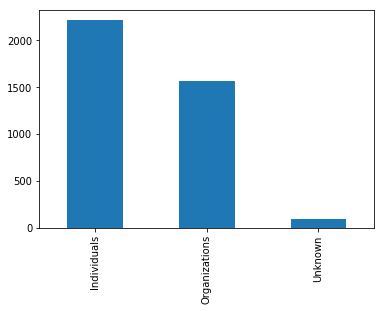

In [60]:
Contrib_type_plot_2018 = df_2018['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2018

In [61]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 

for name, amt in zip(
    df_2018.loc[df_2018['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2018.loc[df_2018['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2018.loc[df_2018.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2018.loc[df_2018.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [62]:
# Uncategorized
df_2018_unclass = df_2018[df_2018['Contributor_type']=='uncategorized'][['NAME']]
# df_2018_unclass.head(10)
uncategorized_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_unclass['NAME'])))
uncategorized_2018.to_csv('uncategorized_2018.csv')

uncategorized_2018

,0


In [63]:
for i in df_2018[df_2018['Contributor_type'] == 'uncategorized']:
    df_2018.loc[df_2018.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [64]:
# Resave
# Uncategorized
df_2018_unclass = df_2018[df_2018['Contributor_type']=='uncategorized'][['NAME']]
# df_2018_unclass.head(10)
uncategorized_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_unclass['NAME'])))
uncategorized_2018.to_csv('uncategorized_2018.csv')
# uncategorized_balance

# Individuals
df_2018_indiv = df_2018[df_2018['Contributor_type']=='Individuals'][['NAME']]
individuals_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_indiv['NAME'])))
individuals_2018.to_csv('individuals_2018.csv')
# individuals_2018

# Organizations
df_2018_orgs = df_2018[df_2018['Contributor_type']=='Organizations'][['NAME']]
orgs_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_orgs['NAME'])))
orgs_2018.to_csv('organizations_2018.csv')
# orgs_2018

# Unknown
df_2018_unknow = df_2018[df_2018['Contributor_type']=='Unknown'][['NAME']]
unknow_2018 = pd.DataFrame(pd.unique(pd.Series(df_2018_unknow['NAME'])))
unknow_2018.to_csv('unknown_2018.csv')
# unknow_2018

**Save the data file with categorization** 

In [65]:
df_2018['Year'] = 2018
df_2018.to_csv('data\\Final_categorization_2018.csv', index=False)

### 2017 Final Categorization


In [63]:
df_2017 = pd.read_csv('data\\2017_combined_reports.csv')
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
PCC                 178 non-null object
TRAN_AMT            178 non-null float64
NAME                178 non-null object
CITY                178 non-null object
STATE               178 non-null object
ZIP                 178 non-null object
INKIND              4 non-null object
INKIND_COMMENTS     4 non-null object
LOAN                0 non-null float64
COMMENT             10 non-null object
PSA                 0 non-null float64
Contributor_type    178 non-null object
dtypes: float64(3), object(9)
memory usage: 16.8+ KB


In [64]:
df_2017.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Christensen Allen,500.0,Orbital ATK,Minnetonka,MN,55343.0,NaN,NaN,NaN,NaN,NaN,Organizations
1,Christensen Allen,250.0,CENTURYLINK QC,Salt Lake City,UT,84111.0,NaN,NaN,NaN,NaN,NaN,Organizations
2,Christensen Allen,1000.0,Republican Senate Campaign Committee,Provo,UT,84604.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Christensen Allen,500.0,Cambia,Portland,OR,97207.0,NaN,NaN,NaN,NaN,NaN,Organizations
4,Christensen Allen,250.0,Express Scripts,St. Louis,MO,63121.0,NaN,NaN,NaN,NaN,NaN,Organizations


In [65]:
# Uncategorized
df_2017_unclass = df_2017[df_2017['Contributor_type']=='uncategorized'][['NAME']]
# df_2017_unclass.head(10)
uncategorized_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_unclass['NAME'])))
uncategorized_2017.to_csv('uncategorized_2017.csv')
# uncategorized_2017

# Individuals
df_2017_indiv = df_2017[df_2017['Contributor_type']=='Individuals'][['NAME']]
individuals_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_indiv['NAME'])))
individuals_2017.to_csv('individuals_2017.csv')
# individuals_2017

# Organizations
df_2017_orgs = df_2017[df_2017['Contributor_type']=='Organizations'][['NAME']]
orgs_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_orgs['NAME'])))
orgs_2017.to_csv('organizations_2017.csv')
# orgs_2017

# Unknown
df_2017_unknow = df_2017[df_2017['Contributor_type']=='Unknown'][['NAME']]
unknow_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_unknow['NAME'])))
unknow_2017.to_csv('unknown_2017.csv')
# unknow_2017

In [66]:
# uncategorized_2017

In [67]:
# individuals_2017

In [68]:
# orgs_2017

In [69]:
unknow_2017

,0


In [70]:
# Third pass Organizations for 2017

LafargeHolcin = re.compile(r"\s*(Lafarge\s*Holcin)\s*", re.IGNORECASE)
gmpac = re.compile(r"\s*(gmpac)\s*", re.IGNORECASE)

org_searches_3_2017 = [
    LafargeHolcin,
    gmpac
]

# Second, Third and Fouth Passes on Individuals for 2017
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
Hawkins = re.compile(r"\s?(Hawkins)\s?")


ind_searches_5_2017 = [
    middle_in_paren_or_quote,
    Hawkins
]

for name, cat in zip(
    df_2017.loc[df_2017['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2017.loc[df_2017['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2017:
        if org_search.search(name):
            df_2017.loc[df_2017.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2017.loc[df_2017.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2017.loc[df_2017.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2017.loc[df_2017.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2017:
        if ind_search.search(name):
            df_2017.loc[df_2017.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [71]:
# Uncategorized
df_2017_unclass = df_2017[df_2017['Contributor_type']=='uncategorized'][['NAME']]
# df_2017_unclass.head(10)
uncategorized_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_unclass['NAME'])))
uncategorized_2017.to_csv('uncategorized_2017.csv')
# uncategorized_2017

# Individuals
df_2017_indiv = df_2017[df_2017['Contributor_type']=='Individuals'][['NAME']]
individuals_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_indiv['NAME'])))
individuals_2017.to_csv('individuals_2017.csv')
# individuals_2017

# Organizations
df_2017_orgs = df_2017[df_2017['Contributor_type']=='Organizations'][['NAME']]
orgs_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_orgs['NAME'])))
orgs_2017.to_csv('organizations_2017.csv')
# orgs_2017

# Unknown
df_2017_unknow = df_2017[df_2017['Contributor_type']=='Unknown'][['NAME']]
unknow_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_unknow['NAME'])))
unknow_2017.to_csv('unknown_2017.csv')
# unknow_2017

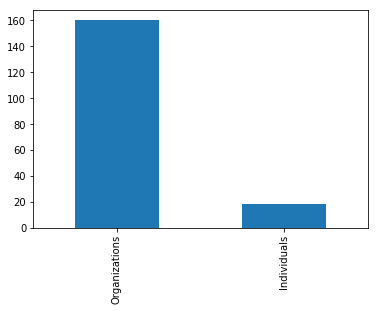

In [72]:
Contrib_type_plot_2017 = df_2017['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2017

In [73]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 

for name, amt in zip(
    df_2017.loc[df_2017['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2017.loc[df_2017['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2017.loc[df_2017.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2017.loc[df_2017.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [74]:
# Uncategorized
df_2017_unclass = df_2017[df_2017['Contributor_type']=='uncategorized'][['NAME']]
# df_2017_unclass.head(10)
uncategorized_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_unclass['NAME'])))
uncategorized_2017.to_csv('uncategorized_2017.csv')

uncategorized_2017

,0


In [75]:
for i in df_2017[df_2017['Contributor_type'] == 'uncategorized']:
    df_2017.loc[df_2017.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [76]:
# Resave
# Uncategorized
df_2017_unclass = df_2017[df_2017['Contributor_type']=='uncategorized'][['NAME']]
# df_2017_unclass.head(10)
uncategorized_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_unclass['NAME'])))
uncategorized_2017.to_csv('uncategorized_2017.csv')
# uncategorized_balance

# Individuals
df_2017_indiv = df_2017[df_2017['Contributor_type']=='Individuals'][['NAME']]
individuals_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_indiv['NAME'])))
individuals_2017.to_csv('individuals_2017.csv')
# individuals_2017

# Organizations
df_2017_orgs = df_2017[df_2017['Contributor_type']=='Organizations'][['NAME']]
orgs_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_orgs['NAME'])))
orgs_2017.to_csv('organizations_2017.csv')
# orgs_2017

# Unknown
df_2017_unknow = df_2017[df_2017['Contributor_type']=='Unknown'][['NAME']]
unknow_2017 = pd.DataFrame(pd.unique(pd.Series(df_2017_unknow['NAME'])))
unknow_2017.to_csv('unknown_2017.csv')
# unknow_2017

**Save the data file with categorization** 

In [77]:
df_2017['Year'] = 2017
df_2017.to_csv('data\\Final_categorization_2017.csv', index=False)

### 2020 Final Categorization


In [78]:
df_2020 = pd.read_csv('data\\2020_combined_reports.csv')
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 12 columns):
PCC                 19800 non-null object
TRAN_AMT            19800 non-null float64
NAME                19800 non-null object
CITY                19795 non-null object
STATE               19797 non-null object
ZIP                 19800 non-null object
INKIND              612 non-null object
INKIND_COMMENTS     623 non-null object
LOAN                0 non-null float64
COMMENT             376 non-null object
PSA                 84 non-null object
Contributor_type    19800 non-null object
dtypes: float64(2), object(10)
memory usage: 1.8+ MB


In [79]:
df_2020.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Abbott Nelson,250.0,Kurt London,North Salt Lake,UT,84054.0,NaN,NaN,NaN,NaN,NaN,uncategorized
1,Abbott Nelson,50.0,Anonymous,Orem,UT,84097.0,NaN,NaN,NaN,NaN,NaN,Unknown
2,Abbott Nelson,250.0,Lauren Scholnick,Salt Lake City,UT,84105.0,NaN,NaN,NaN,NaN,NaN,uncategorized
3,Abbott Nelson,100.0,Thomas W. Seiler,Provo,UT,84603.0,NaN,NaN,NaN,NaN,NaN,Individuals
4,Abbott Nelson,1000.0,Flickenger Sutterfield and Boulton,Provo,UT,84604.0,NaN,NaN,NaN,NaN,NaN,Organizations


In [80]:
# Uncategorized
df_2020_unclass = df_2020[df_2020['Contributor_type']=='uncategorized'][['NAME']]
# df_2020_unclass.head(10)
uncategorized_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_unclass['NAME'])))
uncategorized_2020.to_csv('uncategorized_2020.csv')
# uncategorized_2020

# Individuals
df_2020_indiv = df_2020[df_2020['Contributor_type']=='Individuals'][['NAME']]
individuals_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_indiv['NAME'])))
individuals_2020.to_csv('individuals_2020.csv')
# individuals_2020

# Organizations
df_2020_orgs = df_2020[df_2020['Contributor_type']=='Organizations'][['NAME']]
orgs_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_orgs['NAME'])))
orgs_2020.to_csv('organizations_2020.csv')
# orgs_2020

# Unknown
df_2020_unknow = df_2020[df_2020['Contributor_type']=='Unknown'][['NAME']]
unknow_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_unknow['NAME'])))
unknow_2020.to_csv('unknown_2020.csv')
# unknow_2020

In [81]:
# uncategorized_2020

In [82]:
# individuals_2020

In [83]:
# orgs_2020

In [84]:
# unknow_2020

In [85]:
# Third pass Organizations for 2020

# review files
# EllasBows = re.compile(r"(Ella\'s\sBows)", re.IGNORECASE)
# EmeryTelecom = re.compile(r"(Emery\sTelcom)", re.IGNORECASE)
# FightingFor = re.compile(r"(Fighting\sfor)", re.IGNORECASE)
# LitzasPizza = re.compile(r"(Litza\'s\sPizza)", re.IGNORECASE)
# CullimoreFor = re.compile(r"(Cullimore\sfor\sSenae)", re.IGNORECASE)
# moreFrieds_and_Jensen= re.compile(r"(Siegf?r?ied\s\&\sJensen)", re.IGNORECASE)
# more_mobile = re.compile(r"(T\-Mobile)")
# effectv = re.compile(r"(Effectv)")
# entrata = re.compile(r"(Entrata)")
# halland_and_hart = re.compile(r"(Halland\s\&\sHart)")
# pyrocrate = re.compile(r"(PyroCrate)")
# webasics = re.compile(r"(Webasics)")
# snowbird = re.compile(r"(Snowbird)")
# firstrule = re.compile(r"(FIRSTRULE)")
# tprma = re.compile(r"(TPRMA)")
# signflux = re.compile(r"(SignFlux)")
# smart_td = re.compile(r"(SMART\-TD)")
# jeff_for_mayor = re.compile(r"(Jeff\s4\sMayor)")
# impact = re.compile(r"(Impact)")
# orinpac = re.compile(r"(Orinpac)")
# Holland_Park = re.compile(r"(Holland\s\&\sPark)")
# CSG = re.compile(r"(CSG)")


org_searches_3_2020 = [
#     EllasBows,
#     EmeryTelecom,
#     FightingFor,
#     LitzasPizza,
#     CullimoreFor,
#     moreFrieds_and_Jensen,
#     more_mobile,
#     effectv,
#     entrata,
#     halland_and_hart,
#     pyrocrate,
#     webasics,
#     snowbird,
#     firstrule,
#     tprma,
#     signflux,
#     smart_td,
#     jeff_for_mayor,
#     impact,
#     orinpac,
#     Holland_Park,
#     CSG
]

# Second, Third and Fouth Passes on Individuals for 2020

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")

name_tab_name = re.compile(r"([a-zA-Z]+)\s*\t([a-zA-Z]+)")

ind_searches_5_2020 = [
    middle_in_paren_or_quote
]

ind_searches_6_2020 = [
    name_tab_name
]

Unidentified = re.compile(r"(Unidentified)", re.IGNORECASE)

unk_searches_7_2020 = [
    Unidentified
]

for name, cat in zip(
    df_2020.loc[df_2020['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2020.loc[df_2020['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2020:
        if org_search.search(name):
            df_2020.loc[df_2020.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2020.loc[df_2020.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2020.loc[df_2020.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2020.loc[df_2020.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2020:
        if ind_search.search(name):
            df_2020.loc[df_2020.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_6_2020:
        if ind_search.search(name):
            no_tab_name = name_tab_name.search(name).group(1) + " " + name_tab_name.search(name).group(2)
            df_2020.loc[df_2020.NAME == name, 'Contributor_type'] = 'Individuals'
            df_2020.loc[df_2020.NAME == name, 'NAME'] = str(no_tab_name)
            break
            
    for unk_search in unk_searches_7_2020:
        if unk_search.search(name):
            df_2020.loc[df_2020.NAME == name, 'Contributor_type'] = 'Unknown'
            break

**Rerun saving the categorization files**

In [86]:
# Uncategorized
df_2020_unclass = df_2020[df_2020['Contributor_type']=='uncategorized'][['NAME']]
# df_2020_unclass.head(10)
uncategorized_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_unclass['NAME'])))
uncategorized_2020.to_csv('uncategorized_2020.csv')
# uncategorized_2020

# Individuals
df_2020_indiv = df_2020[df_2020['Contributor_type']=='Individuals'][['NAME']]
individuals_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_indiv['NAME'])))
individuals_2020.to_csv('individuals_2020.csv')
# individuals_2020

# Organizations
df_2020_orgs = df_2020[df_2020['Contributor_type']=='Organizations'][['NAME']]
orgs_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_orgs['NAME'])))
orgs_2020.to_csv('organizations_2020.csv')
# orgs_2020

# Unknown
df_2020_unknow = df_2020[df_2020['Contributor_type']=='Unknown'][['NAME']]
unknow_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_unknow['NAME'])))
unknow_2020.to_csv('unknown_2020.csv')
# unknow_2020

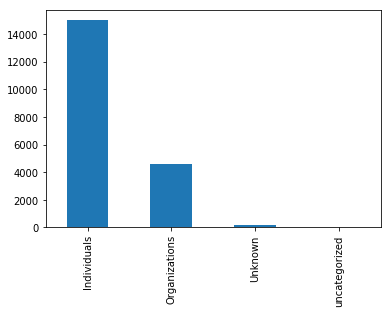

In [87]:
Contrib_type_plot_2020 = df_2020['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2020

In [88]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 

# In 2020 someone put the addresses of individuals in the name field. Strip this out to protect privacy. Good grief!
name_address = re.compile(r"([a-zA-Z]+)\s*(\d+\s\S+\s*\S*\s*\S*\s*\S*\s*\S*\s*\S*\s\d{5})",  re.IGNORECASE)


for name, amt in zip(
    df_2020.loc[df_2020['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2020.loc[df_2020['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2020.loc[df_2020.NAME == name, 'NAME'] = noActBlue_name
        
    if name_address.search(name):
        no_address_name = name_address.search(name).group(1)
        df_2020.loc[df_2020.NAME == name, 'NAME'] = no_address_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2020.loc[df_2020.NAME == name, 'NAME'] = short_name
        
        

Only use after examining the uncategorized group.

In [89]:
# Uncategorized
df_2020_unclass = df_2020[df_2020['Contributor_type']=='uncategorized'][['NAME']]
# df_2020_unclass.head(10)
uncategorized_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_unclass['NAME'])))
uncategorized_2020.to_csv('uncategorized_2020.csv')

uncategorized_2020

,0
0,Annonymous
1,Clyde
2,Jr. Bratsch
3,Actblue
4,FEAPAc
5,Virginia. Hylton
6,CWA - Cope
7,Norton
8,Slade
9,Esplin


In [90]:
## In 2020 all the final uncategorized contributions appear to be individuals
for i in df_2020[df_2020['Contributor_type'] == 'uncategorized']:
    df_2020.loc[df_2020.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Individuals'

In [91]:
# Resave
# Uncategorized
df_2020_unclass = df_2020[df_2020['Contributor_type']=='uncategorized'][['NAME']]
# df_2020_unclass.head(10)
uncategorized_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_unclass['NAME'])))
uncategorized_2020.to_csv('uncategorized_2020.csv')
# uncategorized_balance

# Individuals
df_2020_indiv = df_2020[df_2020['Contributor_type']=='Individuals'][['NAME']]
individuals_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_indiv['NAME'])))
individuals_2020.to_csv('individuals_2020.csv')
# individuals_2020

# Organizations
df_2020_orgs = df_2020[df_2020['Contributor_type']=='Organizations'][['NAME']]
orgs_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_orgs['NAME'])))
orgs_2020.to_csv('organizations_2020.csv')
# orgs_2020

# Unknown
df_2020_unknow = df_2020[df_2020['Contributor_type']=='Unknown'][['NAME']]
unknow_2020 = pd.DataFrame(pd.unique(pd.Series(df_2020_unknow['NAME'])))
unknow_2020.to_csv('unknown_2020.csv')
# unknow_2020

In [92]:
uncategorized_2020

,0


**Save the data file with categorization and add a year** 

In [93]:
df_2020['Year'] = 2020
df_2020.to_csv('data\\Final_categorization_2020.csv', index=False)

### 2016 Final Categorization 

In [94]:
df_2016 = pd.read_csv('data\\2016_combined_reports.csv')
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 12 columns):
PCC                 1843 non-null object
TRAN_AMT            1843 non-null float64
NAME                1843 non-null object
CITY                1838 non-null object
STATE               1842 non-null object
ZIP                 1843 non-null object
INKIND              101 non-null object
INKIND_COMMENTS     101 non-null object
LOAN                0 non-null float64
COMMENT             51 non-null object
PSA                 1 non-null object
Contributor_type    1843 non-null object
dtypes: float64(2), object(10)
memory usage: 172.9+ KB


In [95]:
df_2016.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Anderson Ash,22.02,Jacob Hanson,Salt Lake City,UT,84102.0,X,ashanderson.org and ashandersonutah.org domain...,NaN,NaN,NaN,uncategorized
1,Anderson Ash,15.00,Stephanie Gibson,New Playz,NY,12561.0,NaN,NaN,NaN,NaN,NaN,uncategorized
2,Anderson Ash,15.00,Kate Jensen,Salt Lake City,UT,84108.0,NaN,NaN,NaN,NaN,NaN,uncategorized
3,Anderson Ash,50.00,Jodi Wallace,Norwalk,CT,6855.0,NaN,NaN,NaN,NaN,NaN,uncategorized
4,Anderson Ash,10.00,Leslie Archambealut,Brooklyn,NY,11220.0,NaN,NaN,NaN,NaN,NaN,uncategorized


In [96]:
# Uncategorized
df_2016_unclass = df_2016[df_2016['Contributor_type']=='uncategorized'][['NAME']]
# df_2016_unclass.head(10)
uncategorized_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_unclass['NAME'])))
uncategorized_2016.to_csv('uncategorized_2016.csv')
# uncategorized_2016

# Individuals
df_2016_indiv = df_2016[df_2016['Contributor_type']=='Individuals'][['NAME']]
individuals_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_indiv['NAME'])))
individuals_2016.to_csv('individuals_2016.csv')
# individuals_2016

# Organizations
df_2016_orgs = df_2016[df_2016['Contributor_type']=='Organizations'][['NAME']]
orgs_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_orgs['NAME'])))
orgs_2016.to_csv('organizations_2016.csv')
# orgs_2016

# Unknown
df_2016_unknow = df_2016[df_2016['Contributor_type']=='Unknown'][['NAME']]
unknow_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_unknow['NAME'])))
unknow_2016.to_csv('unknown_2016.csv')
# unknow_2016

In [97]:
# uncategorized_2016

In [98]:
# individuals_2016

In [99]:
# orgs_2016

In [100]:
# unknow_2016

In [101]:
# Third pass Organizations for 2016

# RobertJ_Debray = re.compile(r"(Robert\sJ).*(Debray)")
# ATTandTmore = re.compile(r"(ATT\&T)")
# ATYK_Kaybcg = re.compile(r"(ATYK\sKaybcg)")
# CSG_more = re.compile(r"^\s*(CSG)\s*$")
# LKQ = re.compile(r"^\s*(LKQ)\s*$")
# MACU = re.compile(r"^\s*(MACU)\s*$")
# NACDS = re.compile(r"^\s*(NACDS)\s*$")
# ReaganAdt = re.compile(r"Reagan\sAdtervising") 
# Stirba = re.compile(r"^\s*(Stirba)\s*$")
# UMWA = re.compile(r"^\s*(UMWA)\s*$")
# UPMA = re.compile(r"^\s*(UPMA)\s*$")
# valeo = re.compile(r"^\s*(valeo)\s*$")
# wcf = re.compile(r"^\s*(wcf)\s*$")
# Allstate = re.compile(r"(Allstate)")
# Unisys = re.compile(r"(Unisys)")
# Norbest = re.compile(r"(Norbest)")
# Wadman = re.compile(r"(Wadman)")
# Anedot = re.compile(r"(Anedot)")
# nacds = re.compile(r"(nacds)")
# Yesco = re.compile(r"(Yesco)")



              

org_searches_3_2016 = [
#     RobertJ_Debray,
#     ATTandTmore,
#     ATYK_Kaybcg,
#     CSG_more,
#     LKQ,
#     MACU,
#     NACDS,
#     ReaganAdt,
#     Stirba,
#     UMWA,
#     UPMA,
#     valeo,
#     wcf,
#     Allstate,
#     Unisys,
#     Norbest, 
#     Wadman,
#     Anedot,
#     nacds,
#     Yesco
]

# Unknown for 2016
#= re.compile(r"^\s*()\s*$")
petty_cash_from_event = re.compile(r"(petty\scash\sfrom\sevent)")
Less_than_fifty = re.compile(r"(Less\sthan\s\$50)")
Under_fifty = re.compile(r"(Under\s\$50)")



unk_searches_7_2016 = [
    petty_cash_from_event,
    Less_than_fifty,
    Under_fifty
    
]

# Second, Third and Fouth Passes on Individuals for 2016
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
bRYANgLICK = re.compile(r"(bRYAN\sgLICK)")
Hawkins = re.compile(r"(Hawkins)")


ind_searches_5_2016 = [
    middle_in_paren_or_quote,
    bRYANgLICK,
    Hawkins
]

for name, cat in zip(
    df_2016.loc[df_2016['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2016.loc[df_2016['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2016:
        if org_search.search(name):
            df_2016.loc[df_2016.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            
    for unk_search in unk_searches_7_2016:
        if unk_search.search(name):
            df_2016.loc[df_2016.NAME == name, 'Contributor_type'] = 'Unknown'
            break
            
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2016.loc[df_2016.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2016.loc[df_2016.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2016.loc[df_2016.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2016:
        if ind_search.search(name):
            df_2016.loc[df_2016.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [102]:
# Uncategorized
df_2016_unclass = df_2016[df_2016['Contributor_type']=='uncategorized'][['NAME']]
# df_2016_unclass.head(10)
uncategorized_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_unclass['NAME'])))
uncategorized_2016.to_csv('uncategorized_2016.csv')
# uncategorized_2016

# Individuals
df_2016_indiv = df_2016[df_2016['Contributor_type']=='Individuals'][['NAME']]
individuals_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_indiv['NAME'])))
individuals_2016.to_csv('individuals_2016.csv')
# individuals_2016

# Organizations
df_2016_orgs = df_2016[df_2016['Contributor_type']=='Organizations'][['NAME']]
orgs_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_orgs['NAME'])))
orgs_2016.to_csv('organizations_2016.csv')
# orgs_2016

# Unknown
df_2016_unknow = df_2016[df_2016['Contributor_type']=='Unknown'][['NAME']]
unknow_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_unknow['NAME'])))
unknow_2016.to_csv('unknown_2016.csv')
# unknow_2016

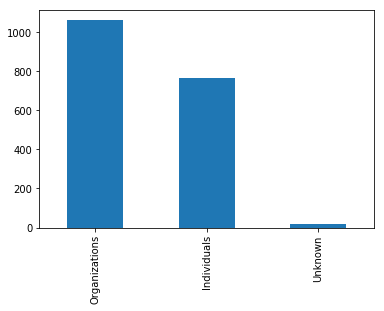

In [103]:
Contrib_type_plot_2016 = df_2016['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2016

In [104]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2016.loc[df_2016['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2016.loc[df_2016['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2016.loc[df_2016.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2016.loc[df_2016.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [105]:
# Uncategorized
df_2016_unclass = df_2016[df_2016['Contributor_type']=='uncategorized'][['NAME']]
# df_2016_unclass.head(10)
uncategorized_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_unclass['NAME'])))
uncategorized_2016.to_csv('uncategorized_2016.csv')

uncategorized_2016

,0


In [106]:
for i in df_2016[df_2016['Contributor_type'] == 'uncategorized']:
    df_2016.loc[df_2016.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [107]:
# Resave
# Uncategorized
df_2016_unclass = df_2016[df_2016['Contributor_type']=='uncategorized'][['NAME']]
# df_2016_unclass.head(10)
uncategorized_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_unclass['NAME'])))
uncategorized_2016.to_csv('uncategorized_2016.csv')
# uncategorized_balance

# Individuals
df_2016_indiv = df_2016[df_2016['Contributor_type']=='Individuals'][['NAME']]
individuals_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_indiv['NAME'])))
individuals_2016.to_csv('individuals_2016.csv')
# individuals_2016

# Organizations
df_2016_orgs = df_2016[df_2016['Contributor_type']=='Organizations'][['NAME']]
orgs_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_orgs['NAME'])))
orgs_2016.to_csv('organizations_2016.csv')
# orgs_2016

# Unknown
df_2016_unknow = df_2016[df_2016['Contributor_type']=='Unknown'][['NAME']]
unknow_2016 = pd.DataFrame(pd.unique(pd.Series(df_2016_unknow['NAME'])))
unknow_2016.to_csv('unknown_2016.csv')
# unknow_2016

**Save the data file with categorization** 

In [108]:
df_2016['Year'] = 2016
df_2016.to_csv('data\\Final_categorization_2016.csv', index=False)

### 2015 Final Categorization

In [109]:
df_2015 = pd.read_csv('data\\2015_combined_reports.csv')
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
PCC                 72 non-null object
TRAN_AMT            72 non-null float64
NAME                72 non-null object
CITY                72 non-null object
STATE               72 non-null object
ZIP                 72 non-null object
INKIND              0 non-null float64
INKIND_COMMENTS     0 non-null float64
LOAN                0 non-null float64
COMMENT             5 non-null object
PSA                 0 non-null float64
Contributor_type    72 non-null object
dtypes: float64(5), object(7)
memory usage: 6.8+ KB


In [110]:
df_2015.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Conder Phil,2361.72,Transfer from House-29 Account,Salt Lake City,UT,84109.0,NaN,NaN,NaN,NaN,NaN,Unknown
1,Dee Brad,1422.00,State of Utah,Salt Lake City,UT,84114,NaN,NaN,NaN,reimbursement wireless expenses,NaN,Organizations
2,Dee Brad,500.00,Premier Access Insurance Co.,Sacramento,CA,95826,NaN,NaN,NaN,NaN,NaN,Organizations
3,Dee Brad,250.00,Brian Shiozawa,Salt Lake City,UT,84121,NaN,NaN,NaN,NaN,NaN,uncategorized
4,Dee Brad,750.00,Utah Beverage PAC,Salt Lake City,UT,84101-4946,NaN,NaN,NaN,NaN,NaN,Organizations


In [111]:
# Uncategorized
df_2015_unclass = df_2015[df_2015['Contributor_type']=='uncategorized'][['NAME']]
# df_2015_unclass.head(10)
uncategorized_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_unclass['NAME'])))
uncategorized_2015.to_csv('uncategorized_2015.csv')
# uncategorized_2015

# Individuals
df_2015_indiv = df_2015[df_2015['Contributor_type']=='Individuals'][['NAME']]
individuals_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_indiv['NAME'])))
individuals_2015.to_csv('individuals_2015.csv')
# individuals_2015

# Organizations
df_2015_orgs = df_2015[df_2015['Contributor_type']=='Organizations'][['NAME']]
orgs_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_orgs['NAME'])))
orgs_2015.to_csv('organizations_2015.csv')
# orgs_2015

# Unknown
df_2015_unknow = df_2015[df_2015['Contributor_type']=='Unknown'][['NAME']]
unknow_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_unknow['NAME'])))
unknow_2015.to_csv('unknown_2015.csv')
# unknow_2015

In [112]:
# uncategorized_2015

In [113]:
# individuals_2015

In [114]:
# orgs_2015

In [115]:
unknow_2015

,0
0,Transfer from House-29 Account


In [116]:
# Third pass Organizations for 2015

#= re.compile(r"^\s*()\s*$")
# MACU = re.compile(r"^\s*(MACU)\s*$")
# SUNROC = re.compile(r"^\s*(SUNROC)\s*$")

org_searches_3_2015 = [
#     MACU,
#     SUNROC
]


# Second, Third and Fouth Passes on Individuals for 2015
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
# ZacharyThomas = re.compile(r"ZacharyThomas")


ind_searches_5_2015 = [
    middle_in_paren_or_quote
]

for name, cat in zip(
    df_2015.loc[df_2015['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2015.loc[df_2015['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2015:
        if org_search.search(name):
            df_2015.loc[df_2015.NAME == name, 'Contributor_type'] = 'Organizations'
            break
        
#     if df_2015.loc[df_2015.NAME == name, 'Contributor_type'] != 'uncategorized':
#         continue
            
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2015.loc[df_2015.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2015.loc[df_2015.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2015.loc[df_2015.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2015:
        if ind_search.search(name):
            df_2015.loc[df_2015.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [117]:
# Uncategorized
df_2015_unclass = df_2015[df_2015['Contributor_type']=='uncategorized'][['NAME']]
# df_2015_unclass.head(10)
uncategorized_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_unclass['NAME'])))
uncategorized_2015.to_csv('uncategorized_2015.csv')
# uncategorized_2015

# Individuals
df_2015_indiv = df_2015[df_2015['Contributor_type']=='Individuals'][['NAME']]
individuals_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_indiv['NAME'])))
individuals_2015.to_csv('individuals_2015.csv')
# individuals_2015

# Organizations
df_2015_orgs = df_2015[df_2015['Contributor_type']=='Organizations'][['NAME']]
orgs_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_orgs['NAME'])))
orgs_2015.to_csv('organizations_2015.csv')
# orgs_2015

# Unknown
df_2015_unknow = df_2015[df_2015['Contributor_type']=='Unknown'][['NAME']]
unknow_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_unknow['NAME'])))
unknow_2015.to_csv('unknown_2015.csv')
# unknow_2015

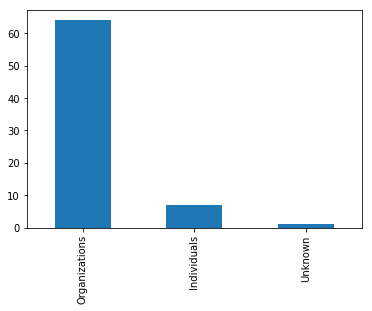

In [118]:
Contrib_type_plot_2015 = df_2015['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2015

In [119]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2015.loc[df_2015['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2015.loc[df_2015['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2015.loc[df_2015.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2015.loc[df_2015.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [120]:
# Uncategorized
df_2015_unclass = df_2015[df_2015['Contributor_type']=='uncategorized'][['NAME']]
# df_2015_unclass.head(10)
uncategorized_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_unclass['NAME'])))
uncategorized_2015.to_csv('uncategorized_2015.csv')

uncategorized_2015

,0


In [121]:
for i in df_2015[df_2015['Contributor_type'] == 'uncategorized']:
    df_2015.loc[df_2015.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [122]:
# Resave
# Uncategorized
df_2015_unclass = df_2015[df_2015['Contributor_type']=='uncategorized'][['NAME']]
# df_2015_unclass.head(10)
uncategorized_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_unclass['NAME'])))
uncategorized_2015.to_csv('uncategorized_2015.csv')
# uncategorized_balance

# Individuals
df_2015_indiv = df_2015[df_2015['Contributor_type']=='Individuals'][['NAME']]
individuals_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_indiv['NAME'])))
individuals_2015.to_csv('individuals_2015.csv')
# individuals_2015

# Organizations
df_2015_orgs = df_2015[df_2015['Contributor_type']=='Organizations'][['NAME']]
orgs_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_orgs['NAME'])))
orgs_2015.to_csv('organizations_2015.csv')
# orgs_2015

# Unknown
df_2015_unknow = df_2015[df_2015['Contributor_type']=='Unknown'][['NAME']]
unknow_2015 = pd.DataFrame(pd.unique(pd.Series(df_2015_unknow['NAME'])))
unknow_2015.to_csv('unknown_2015.csv')
# unknow_2015

**Save the data file with categorization** 

In [123]:
df_2015['Year'] = 2015
df_2015.to_csv('data\\Final_categorization_2015.csv', index=False)

### 2014 Final Categorization 

In [124]:
df_2014 = pd.read_csv('data\\2014_combined_reports.csv')
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 12 columns):
PCC                 830 non-null object
TRAN_AMT            830 non-null float64
NAME                830 non-null object
CITY                830 non-null object
STATE               830 non-null object
ZIP                 830 non-null object
INKIND              15 non-null object
INKIND_COMMENTS     15 non-null object
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    830 non-null object
dtypes: float64(4), object(8)
memory usage: 77.9+ KB


In [125]:
df_2014.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Birkeland Lars,250.0,Mountain Green Kids Club,Morgan,UT,84050.0,NaN,NaN,NaN,NaN,NaN,Organizations
1,Birkeland Lars,100.0,Jared Yates,Clovis,NM,88101.0,NaN,NaN,NaN,NaN,NaN,uncategorized
2,Birkeland Lars,100.0,Committee to Elect Mel Brown,Coalville,UT,84017.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Birkeland Lars,200.0,Robert Browning,Farmington,UT,84025.0,NaN,NaN,NaN,NaN,NaN,uncategorized
4,Birkeland Lars,250.0,John L and Kathy Haws,Mountain Green,UT,84050.0,NaN,NaN,NaN,NaN,NaN,Individuals


In [126]:
# Uncategorized
df_2014_unclass = df_2014[df_2014['Contributor_type']=='uncategorized'][['NAME']]
# df_2014_unclass.head(10)
uncategorized_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_unclass['NAME'])))
uncategorized_2014.to_csv('uncategorized_2014.csv')
# uncategorized_2014

# Individuals
df_2014_indiv = df_2014[df_2014['Contributor_type']=='Individuals'][['NAME']]
individuals_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_indiv['NAME'])))
individuals_2014.to_csv('individuals_2014.csv')
# individuals_2014

# Organizations
df_2014_orgs = df_2014[df_2014['Contributor_type']=='Organizations'][['NAME']]
orgs_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_orgs['NAME'])))
orgs_2014.to_csv('organizations_2014.csv')
# orgs_2014

# Unknown
df_2014_unknow = df_2014[df_2014['Contributor_type']=='Unknown'][['NAME']]
unknow_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_unknow['NAME'])))
unknow_2014.to_csv('unknown_2014.csv')
# unknow_2014

In [127]:
# uncategorized_2014

In [128]:
# individuals_2014

In [129]:
# orgs_2014

In [130]:
unknow_2014

,0
0,Contributors less than $50
1,Dee Brad - 2012 House-11 - Balance Transfer
2,Greenwood Richard A - 2012 House-12 - Balance ...
3,Knudson Peter C. - 2010 Senate-17 - Balance Tr...
4,Layton Dana - 2012 House-60 - Balance Transfer
5,Stephenson Howard - 2010 Senate-11 - Balance T...
6,Tatton Sherri - 2012 House-15 - Balance Transfer
7,VanTassell Kevin T. - 2010 Senate-26 - Balance...


In [131]:
# # Third pass Organizations for 2014

# AvenueParkway = re.compile(r"(Avenue\sParkway)", re.IGNORECASE)
# ArtCityNursing = re.compile(r"(Art\sCity\sNursing)", re.IGNORECASE)
# AstraZeneca = re.compile(r"(AstraZeneca)", re.IGNORECASE)
# BomanKemp = re.compile(r"(Boman\s\&\sKemp)", re.IGNORECASE)
# CCNursingHome = re.compile(r"(CC\sNursing\sHome)", re.IGNORECASE)
# CDM = re.compile(r"^\s*(CDM)\s*$", re.IGNORECASE)
# CleanHarbors = re.compile(r"(Clean\sHarbors)", re.IGNORECASE)
# ComfortSuitesofOgden = re.compile(r"(Comfort\sSuites)", re.IGNORECASE)
# ErniesTruckPlaza = re.compile(r"(Ernie\'s\sTruck)", re.IGNORECASE)
# LaytonHillsChryslerJeepDodge = re.compile(r"(Layton\sHills\sChrysler)", re.IGNORECASE)
# MacCoolsJams = re.compile(r"(MacCools\sJams\-District)", re.IGNORECASE)
# MACU = re.compile(r"^\s*(MACU)\s*$", re.IGNORECASE)
# MedallionManor = re.compile(r"(Medallion\sManor)", re.IGNORECASE)
# MercedesBenzofLindon = re.compile(r"(Mercedes\sBenz)", re.IGNORECASE)
# MolinaHeathcare = re.compile(r"(Molina\sHeathcare)", re.IGNORECASE)
# NACDS = re.compile(r"^\s*(NACDS)\s*$", re.IGNORECASE)
# NatomasMeadows = re.compile(r"(Natomas\sMeadows)", re.IGNORECASE)
# NeighborsforKevenStratton = re.compile(r"(Neighbors\sfor)", re.IGNORECASE)
# OremCity = re.compile(r"(Orem\sCity)", re.IGNORECASE)
# ParsonsBehleandLatimer = re.compile(r"(ParsonsBehle)", re.IGNORECASE)
# RedLeafResources = re.compile(r"(Red\sLeaf\sResources)", re.IGNORECASE)
# RioTinto = re.compile(r"(Rio\sTinto)", re.IGNORECASE)
# SchoolImprovementNetwork = re.compile(r"(School\sImprovement\sNetwork)", re.IGNORECASE)
# Sprint = re.compile(r"(Sprint)", re.IGNORECASE)
# StakerParson = re.compile(r"(Staker\/ Parson)", re.IGNORECASE)
# StonehengeCare = re.compile(r"(Stonehenge\sCare)", re.IGNORECASE)
# Strata = re.compile(r"^\s*(Strata)\s*$", re.IGNORECASE)
# # Takeda = re.compile(r"(Takeda)", re.IGNORECASE)
# TooeleGOP = re.compile(r"(Tooele\sGOP)", re.IGNORECASE)
# USMag = re.compile(r"^\s*(USMag)\s*$", re.IGNORECASE)	
# VailResorts = re.compile(r"(Vail\sResorts)", re.IGNORECASE)
# WasatchFrontSuzuki = re.compile(r"(Wasatch\sFront)", re.IGNORECASE)
# WashakieRenewableEnergy = re.compile(r"(Washakie\sRenewable)", re.IGNORECASE)
# WellsFargo = re.compile(r"(Wells\sFargo)", re.IGNORECASE)
# #= re.compile(r"^\s*()\s*$")

 org_searches_3_2014 = [
#     AvenueParkway,
#     ArtCityNursing,
#     AstraZeneca,
#     BomanKemp,
#     CCNursingHome,
#     CDM,
#     CleanHarbors,
#     ComfortSuitesofOgden,
#     ErniesTruckPlaza,
#     LaytonHillsChryslerJeepDodge,
#     MacCoolsJams,
#     MACU,
#     MedallionManor,
#     MercedesBenzofLindon,
#     MolinaHeathcare,
#     NACDS,
#     NatomasMeadows,
#     NeighborsforKevenStratton,
#     OremCity,
#     ParsonsBehleandLatimer,
#     RedLeafResources,
#     RioTinto,
#     SchoolImprovementNetwork,
#     Sprint,
#     StakerParson,
#     StonehengeCare,
#     Strata,
#     # Takeda,
#     TooeleGOP,
#     USMag,
#     VailResorts,
#     WasatchFrontSuzuki,
#     WashakieRenewableEnergy,
#     WellsFargo
]


for name, cat in zip(
    df_2014.loc[df_2014['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2014.loc[df_2014['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2014:
        if org_search.search(name):
            df_2014.loc[df_2014.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            


IndentationError: unexpected indent (<ipython-input-131-72f9346a1926>, line 39)

In [132]:
# Second, Third and Fouth Passes on Individuals for 2014
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
self = re.compile(r"(self\-)", re.IGNORECASE)
Newfield = re.compile(r"(Newfield)")


ind_searches_5_2014 = [
    middle_in_paren_or_quote,
    self,
    Newfield
]

for name, cat in zip(
    df_2014.loc[df_2014['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2014.loc[df_2014['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2014.loc[df_2014.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2014.loc[df_2014.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2014.loc[df_2014.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2014:
        if ind_search.search(name):
            df_2014.loc[df_2014.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [133]:
# Uncategorized
df_2014_unclass = df_2014[df_2014['Contributor_type']=='uncategorized'][['NAME']]
# df_2014_unclass.head(10)
uncategorized_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_unclass['NAME'])))
uncategorized_2014.to_csv('uncategorized_2014.csv')
# uncategorized_2014

# Individuals
df_2014_indiv = df_2014[df_2014['Contributor_type']=='Individuals'][['NAME']]
individuals_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_indiv['NAME'])))
individuals_2014.to_csv('individuals_2014.csv')
# individuals_2014

# Organizations
df_2014_orgs = df_2014[df_2014['Contributor_type']=='Organizations'][['NAME']]
orgs_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_orgs['NAME'])))
orgs_2014.to_csv('organizations_2014.csv')
# orgs_2014

# Unknown
df_2014_unknow = df_2014[df_2014['Contributor_type']=='Unknown'][['NAME']]
unknow_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_unknow['NAME'])))
unknow_2014.to_csv('unknown_2014.csv')
# unknow_2014

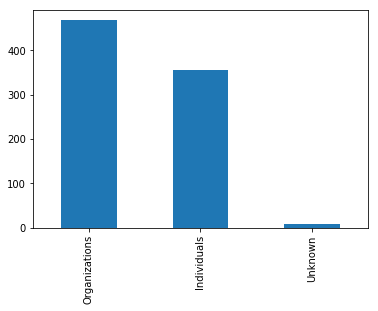

In [134]:
Contrib_type_plot_2014 = df_2014['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2014

In [135]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2014.loc[df_2014['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2014.loc[df_2014['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2014.loc[df_2014.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2014.loc[df_2014.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [136]:
# Uncategorized
df_2014_unclass = df_2014[df_2014['Contributor_type']=='uncategorized'][['NAME']]
# df_2014_unclass.head(10)
uncategorized_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_unclass['NAME'])))
uncategorized_2014.to_csv('uncategorized_2014.csv')

uncategorized_2014

,0


In [137]:
for i in df_2014[df_2014['Contributor_type'] == 'uncategorized']:
    df_2014.loc[df_2014.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [138]:
# Resave
# Uncategorized
df_2014_unclass = df_2014[df_2014['Contributor_type']=='uncategorized'][['NAME']]
# df_2014_unclass.head(10)
uncategorized_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_unclass['NAME'])))
uncategorized_2014.to_csv('uncategorized_2014.csv')
# uncategorized_balance

# Individuals
df_2014_indiv = df_2014[df_2014['Contributor_type']=='Individuals'][['NAME']]
individuals_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_indiv['NAME'])))
individuals_2014.to_csv('individuals_2014.csv')
# individuals_2014

# Organizations
df_2014_orgs = df_2014[df_2014['Contributor_type']=='Organizations'][['NAME']]
orgs_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_orgs['NAME'])))
orgs_2014.to_csv('organizations_2014.csv')
# orgs_2014

# Unknown
df_2014_unknow = df_2014[df_2014['Contributor_type']=='Unknown'][['NAME']]
unknow_2014 = pd.DataFrame(pd.unique(pd.Series(df_2014_unknow['NAME'])))
unknow_2014.to_csv('unknown_2014.csv')
# unknow_2014

**Save the data file with categorization** 

In [139]:
df_2014['Year'] = 2014
df_2014.to_csv('data\\Final_categorization_2014.csv', index=False)

### 2013 Final Categorization

In [140]:
df_2013 = pd.read_csv('data\\2013_combined_reports.csv')
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
PCC                 44 non-null object
TRAN_AMT            44 non-null float64
NAME                44 non-null object
CITY                44 non-null object
STATE               44 non-null object
ZIP                 44 non-null object
INKIND              0 non-null float64
INKIND_COMMENTS     0 non-null float64
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    44 non-null object
dtypes: float64(6), object(6)
memory usage: 4.2+ KB


In [141]:
df_2013.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Ferry Ben C,34.94,Interest 2013 / Capital One 360,St. Cloud,MN,56302.0,NaN,NaN,NaN,NaN,NaN,uncategorized
1,Reid Stuart,2000.00,Senate Campaign Committee,Provo,UT,84604.0,NaN,NaN,NaN,NaN,NaN,Organizations
2,Reid Stuart,500.00,Molina Healthcare Inc,Long Beach,CA,90802.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Tavake Sione,2500.00,Sam and Tammi Tavake,Tracey,CA,95304.0,NaN,NaN,NaN,NaN,NaN,Individuals
4,Tavake Sione,450.00,Pita Kanongtaa,Sacramento,CA,95822.0,NaN,NaN,NaN,NaN,NaN,uncategorized


In [142]:
# Uncategorized
df_2013_unclass = df_2013[df_2013['Contributor_type']=='uncategorized'][['NAME']]
# df_2013_unclass.head(10)
uncategorized_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_unclass['NAME'])))
uncategorized_2013.to_csv('uncategorized_2013.csv')
# uncategorized_2013

# Individuals
df_2013_indiv = df_2013[df_2013['Contributor_type']=='Individuals'][['NAME']]
individuals_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_indiv['NAME'])))
individuals_2013.to_csv('individuals_2013.csv')
# individuals_2013

# Organizations
df_2013_orgs = df_2013[df_2013['Contributor_type']=='Organizations'][['NAME']]
orgs_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_orgs['NAME'])))
orgs_2013.to_csv('organizations_2013.csv')
# orgs_2013

# Unknown
df_2013_unknow = df_2013[df_2013['Contributor_type']=='Unknown'][['NAME']]
unknow_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_unknow['NAME'])))
unknow_2013.to_csv('unknown_2013.csv')
# unknow_2013

In [143]:
# uncategorized_2013

In [144]:
# individuals_2013

In [145]:
# orgs_2013

In [146]:
unknow_2013

,0


In [147]:
# Third pass Organizations for 2013

#= re.compile(r"^\s*()\s*$")

# org_searches_3_2013 = [
    

# ]

# for name, cat in zip(
#     df_2013.loc[df_2013['Contributor_type'] == 'uncategorized', 'NAME'], 
#     df_2013.loc[df_2013['Contributor_type'] == 'uncategorized', 'Contributor_type']
# ):
    
#     for org_search in org_searches_3_2013:
#         if org_search.search(name):
#             df_2013.loc[df_2013.NAME == name, 'Contributor_type'] = 'Organizations'
#             break
            

In [148]:
# Unknown for 2013
Interest = re.compile(r"(Interest\s)")
#= re.compile(r"()", re.IGNORECASE)

unk_searches_7_2013 = [
    Interest
]

for name, cat in zip(
    df_2013.loc[df_2013['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2013.loc[df_2013['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for unk_search in unk_searches_7_2013:
        if unk_search.search(name):
            df_2013.loc[df_2013.NAME == name, 'Contributor_type'] = 'Unknown'
            break
            

In [149]:
# Second, Third and Fouth Passes on Individuals for 2013
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
# ZacharyThomas = re.compile(r"ZacharyThomas")


ind_searches_5_2013 = [
    middle_in_paren_or_quote
]

for name, cat in zip(
    df_2013.loc[df_2013['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2013.loc[df_2013['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2013.loc[df_2013.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2013.loc[df_2013.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2013.loc[df_2013.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2013:
        if ind_search.search(name):
            df_2013.loc[df_2013.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            

**Rerun saving the categorization files**

In [150]:
# Uncategorized
df_2013_unclass = df_2013[df_2013['Contributor_type']=='uncategorized'][['NAME']]
# df_2013_unclass.head(10)
uncategorized_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_unclass['NAME'])))
uncategorized_2013.to_csv('uncategorized_2013.csv')
# uncategorized_2013

# Individuals
df_2013_indiv = df_2013[df_2013['Contributor_type']=='Individuals'][['NAME']]
individuals_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_indiv['NAME'])))
individuals_2013.to_csv('individuals_2013.csv')
# individuals_2013

# Organizations
df_2013_orgs = df_2013[df_2013['Contributor_type']=='Organizations'][['NAME']]
orgs_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_orgs['NAME'])))
orgs_2013.to_csv('organizations_2013.csv')
# orgs_2013

# Unknown
df_2013_unknow = df_2013[df_2013['Contributor_type']=='Unknown'][['NAME']]
unknow_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_unknow['NAME'])))
unknow_2013.to_csv('unknown_2013.csv')
# unknow_2013

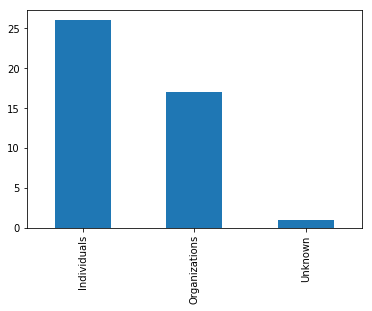

In [151]:
Contrib_type_plot_2013 = df_2013['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2013

In [152]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2013.loc[df_2013['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2013.loc[df_2013['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2013.loc[df_2013.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2013.loc[df_2013.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [153]:
# Uncategorized
df_2013_unclass = df_2013[df_2013['Contributor_type']=='uncategorized'][['NAME']]
# df_2013_unclass.head(10)
uncategorized_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_unclass['NAME'])))
uncategorized_2013.to_csv('uncategorized_2013.csv')

uncategorized_2013

,0


In [154]:
for i in df_2013[df_2013['Contributor_type'] == 'uncategorized']:
    df_2013.loc[df_2013.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [155]:
# Resave
# Uncategorized
df_2013_unclass = df_2013[df_2013['Contributor_type']=='uncategorized'][['NAME']]
# df_2013_unclass.head(10)
uncategorized_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_unclass['NAME'])))
uncategorized_2013.to_csv('uncategorized_2013.csv')
# uncategorized_balance

# Individuals
df_2013_indiv = df_2013[df_2013['Contributor_type']=='Individuals'][['NAME']]
individuals_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_indiv['NAME'])))
individuals_2013.to_csv('individuals_2013.csv')
# individuals_2013

# Organizations
df_2013_orgs = df_2013[df_2013['Contributor_type']=='Organizations'][['NAME']]
orgs_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_orgs['NAME'])))
orgs_2013.to_csv('organizations_2013.csv')
# orgs_2013

# Unknown
df_2013_unknow = df_2013[df_2013['Contributor_type']=='Unknown'][['NAME']]
unknow_2013 = pd.DataFrame(pd.unique(pd.Series(df_2013_unknow['NAME'])))
unknow_2013.to_csv('unknown_2013.csv')
# unknow_2013

**Save the data file with categorization** 

In [156]:
df_2013['Year'] = 2013
df_2013.to_csv('data\\Final_categorization_2013.csv', index=False)

### 2012 Final Categorization

In [157]:
df_2012 = pd.read_csv('data\\2012_combined_reports.csv')
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 12 columns):
PCC                 213 non-null object
TRAN_AMT            213 non-null float64
NAME                213 non-null object
CITY                213 non-null object
STATE               213 non-null object
ZIP                 212 non-null object
INKIND              3 non-null object
INKIND_COMMENTS     2 non-null object
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    213 non-null object
dtypes: float64(4), object(8)
memory usage: 20.0+ KB


In [158]:
df_2012.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Chesnut Geoffrey,125.0,Geoffrey Chesnut,Enoch,UT,84721,NaN,NaN,NaN,NaN,NaN,uncategorized
1,Chesnut Geoffrey,20.0,unknown na,Unknown,UT,88888,NaN,NaN,NaN,NaN,NaN,uncategorized
2,Chesnut Geoffrey,200.0,Peter Corroon,Salt Lake City,UT,84103,NaN,NaN,NaN,NaN,NaN,uncategorized
3,Chesnut Geoffrey,50.0,Aaron & Chelsea Wolfley,TwentyNine Palms,CA,92277,NaN,NaN,NaN,NaN,NaN,uncategorized
4,Chesnut Geoffrey,25.0,John & Basila Graham,Washington,UT,84780,NaN,NaN,NaN,NaN,NaN,uncategorized


In [159]:
# Uncategorized
df_2012_unclass = df_2012[df_2012['Contributor_type']=='uncategorized'][['NAME']]
# df_2012_unclass.head(10)
uncategorized_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_unclass['NAME'])))
uncategorized_2012.to_csv('uncategorized_2012.csv')
# uncategorized_2012

# Individuals
df_2012_indiv = df_2012[df_2012['Contributor_type']=='Individuals'][['NAME']]
individuals_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_indiv['NAME'])))
individuals_2012.to_csv('individuals_2012.csv')
# individuals_2012

# Organizations
df_2012_orgs = df_2012[df_2012['Contributor_type']=='Organizations'][['NAME']]
orgs_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_orgs['NAME'])))
orgs_2012.to_csv('organizations_2012.csv')
# orgs_2012

# Unknown
df_2012_unknow = df_2012[df_2012['Contributor_type']=='Unknown'][['NAME']]
unknow_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_unknow['NAME'])))
unknow_2012.to_csv('unknown_2012.csv')
# unknow_2012

In [160]:
# uncategorized_2012

In [161]:
# individuals_2012

In [162]:
# orgs_2012

In [163]:
# unknow_2012

In [165]:
# Third pass Organizations for 2012

# Anheuser = re.compile(r"(Anheuser)", re.IGNORECASE)
# Consumer = re.compile(r"(Consumer)", re.IGNORECASE)
# Crown = re.compile(r"(Crown)", re.IGNORECASE)
# Fidelity = re.compile(r"(Fidelity)", re.IGNORECASE)
# FirstWind = re.compile(r"(First Wind)", re.IGNORECASE)
# G_E = re.compile(r"(G\sE)", re.IGNORECASE)
# LKQ = re.compile(r"(LKQ)", re.IGNORECASE)
# Lorillard = re.compile(r"(Lorillard)", re.IGNORECASE)
# SprintNextel = re.compile(r"(Sprint\sNextel)", re.IGNORECASE)
# USMagnesium = re.compile(r"(US\sMagnesium)", re.IGNORECASE)
# #= re.compile(r"^\s*()\s*$")

org_searches_3_2012 = [
#     Anheuser,
#     Consumer,
#     Crown,
#     Fidelity,
#     FirstWind,
#     G_E,
#     LKQ,
#     Lorillard,
#     SprintNextel,
#     USMagnesium

]


for name, cat in zip(
    df_2012.loc[df_2012['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2012.loc[df_2012['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2012:
        if org_search.search(name):
            df_2012.loc[df_2012.NAME == name, 'Contributor_type'] = 'Organizations'
            break


In [166]:
# Unknown for 2012
aggregate = re.compile(r"(aggregate)", re.IGNORECASE)
unknown = re.compile(r"(unknown)", re.IGNORECASE)

#= re.compile(r"^\s*()\s*$")
#= re.compile(r"()", re.IGNORECASE)


unk_searches_7_2012 = [
    aggregate,
    unknown
]

for name, cat in zip(
    df_2012.loc[df_2012['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2012.loc[df_2012['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for unk_search in unk_searches_7_2012:
        if unk_search.search(name):
            df_2012.loc[df_2012.NAME == name, 'Contributor_type'] = 'Unknown'
            break

In [167]:
# Second, Third and Fouth Passes on Individuals for 2012
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
# ZacharyThomas = re.compile(r"ZacharyThomas")


ind_searches_5_2012 = [
    middle_in_paren_or_quote
]


for name, cat in zip(
    df_2012.loc[df_2012['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2012.loc[df_2012['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2012.loc[df_2012.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2012.loc[df_2012.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2012.loc[df_2012.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2012:
        if ind_search.search(name):
            df_2012.loc[df_2012.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [168]:
# Uncategorized
df_2012_unclass = df_2012[df_2012['Contributor_type']=='uncategorized'][['NAME']]
# df_2012_unclass.head(10)
uncategorized_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_unclass['NAME'])))
uncategorized_2012.to_csv('uncategorized_2012.csv')
# uncategorized_2012

# Individuals
df_2012_indiv = df_2012[df_2012['Contributor_type']=='Individuals'][['NAME']]
individuals_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_indiv['NAME'])))
individuals_2012.to_csv('individuals_2012.csv')
# individuals_2012

# Organizations
df_2012_orgs = df_2012[df_2012['Contributor_type']=='Organizations'][['NAME']]
orgs_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_orgs['NAME'])))
orgs_2012.to_csv('organizations_2012.csv')
# orgs_2012

# Unknown
df_2012_unknow = df_2012[df_2012['Contributor_type']=='Unknown'][['NAME']]
unknow_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_unknow['NAME'])))
unknow_2012.to_csv('unknown_2012.csv')
# unknow_2012

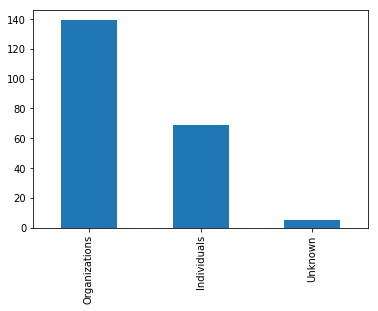

In [169]:
Contrib_type_plot_2012 = df_2012['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2012

In [170]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2012.loc[df_2012['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2012.loc[df_2012['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2012.loc[df_2012.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2012.loc[df_2012.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [171]:
# Uncategorized
df_2012_unclass = df_2012[df_2012['Contributor_type']=='uncategorized'][['NAME']]
# df_2012_unclass.head(10)
uncategorized_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_unclass['NAME'])))
uncategorized_2012.to_csv('uncategorized_2012.csv')

uncategorized_2012

,0


In [172]:
for i in df_2012[df_2012['Contributor_type'] == 'uncategorized']:
    df_2012.loc[df_2012.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [173]:
# Resave
# Uncategorized
df_2012_unclass = df_2012[df_2012['Contributor_type']=='uncategorized'][['NAME']]
# df_2012_unclass.head(10)
uncategorized_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_unclass['NAME'])))
uncategorized_2012.to_csv('uncategorized_2012.csv')
# uncategorized_balance

# Individuals
df_2012_indiv = df_2012[df_2012['Contributor_type']=='Individuals'][['NAME']]
individuals_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_indiv['NAME'])))
individuals_2012.to_csv('individuals_2012.csv')
# individuals_2012

# Organizations
df_2012_orgs = df_2012[df_2012['Contributor_type']=='Organizations'][['NAME']]
orgs_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_orgs['NAME'])))
orgs_2012.to_csv('organizations_2012.csv')
# orgs_2012

# Unknown
df_2012_unknow = df_2012[df_2012['Contributor_type']=='Unknown'][['NAME']]
unknow_2012 = pd.DataFrame(pd.unique(pd.Series(df_2012_unknow['NAME'])))
unknow_2012.to_csv('unknown_2012.csv')
# unknow_2012

**Save the data file with categorization** 

In [174]:
df_2012['Year'] = 2012
df_2012.to_csv('data\\Final_categorization_2012.csv', index=False)

### 2011 Final Categorization


In [175]:
df_2011 = pd.read_csv('data\\2011_combined_reports.csv')
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
PCC                 40 non-null object
TRAN_AMT            40 non-null float64
NAME                40 non-null object
CITY                39 non-null object
STATE               40 non-null object
ZIP                 39 non-null object
INKIND              0 non-null float64
INKIND_COMMENTS     0 non-null float64
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    40 non-null object
dtypes: float64(6), object(6)
memory usage: 3.8+ KB


In [176]:
df_2011.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Ferry Ben C,18.24,Ing Direct - Internet Bank,USA,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
1,Ferry Ben C,16.34,Ing Direct - Internet Bank,USA,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
2,Ferry Ben C,16.57,Ing Direct - Internet Bank,USA,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Ferry Ben C,14.25,Ing Direct - Internet Bank,USA,UT,84101.0,NaN,NaN,NaN,NaN,NaN,Organizations
4,Fisher Julie,435.10,Reimbursement NCSL,Denver,CO,80230.0,NaN,NaN,NaN,NaN,NaN,Organizations


In [177]:
# Uncategorized
df_2011_unclass = df_2011[df_2011['Contributor_type']=='uncategorized'][['NAME']]
# df_2011_unclass.head(10)
uncategorized_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_unclass['NAME'])))
uncategorized_2011.to_csv('uncategorized_2011.csv')
# uncategorized_2011

# Individuals
df_2011_indiv = df_2011[df_2011['Contributor_type']=='Individuals'][['NAME']]
individuals_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_indiv['NAME'])))
individuals_2011.to_csv('individuals_2011.csv')
# individuals_2011

# Organizations
df_2011_orgs = df_2011[df_2011['Contributor_type']=='Organizations'][['NAME']]
orgs_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_orgs['NAME'])))
orgs_2011.to_csv('organizations_2011.csv')
# orgs_2011

# Unknown
df_2011_unknow = df_2011[df_2011['Contributor_type']=='Unknown'][['NAME']]
unknow_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_unknow['NAME'])))
unknow_2011.to_csv('unknown_2011.csv')
# unknow_2011

In [178]:
# uncategorized_2011

In [179]:
# individuals_2011

In [180]:
# orgs_2011

In [181]:
unknow_2011

,0


In [182]:
# Third pass Organizations for 2011

# Convergys = re.compile(r"(Convergys)", re.IGNORECASE)
# Altius = re.compile(r"(Altius)", re.IGNORECASE)
# SenatePresidentsForum = re.compile(r"(Senate\sPresidents\sForum)", re.IGNORECASE)

#= re.compile(r"^\s*()\s*$")

org_searches_3_2011 = [
     FirstWind,
#     Convergys,
#     Altius,
#     SenatePresidentsForum
]


for name, cat in zip(
    df_2011.loc[df_2011['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2011.loc[df_2011['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2011:
        if org_search.search(name):
            df_2011.loc[df_2011.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            

In [183]:
# Unknown for 2011
#= re.compile(r"^\s*()\s*$")
#= re.compile(r"()", re.IGNORECASE)


# unk_searches_7_2011 = [
    
# ]


In [184]:
# Second, Third and Fouth Passes on Individuals for 2011
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
# ZacharyThomas = re.compile(r"ZacharyThomas")


ind_searches_5_2011 = [
    middle_in_paren_or_quote
]

for name, cat in zip(
    df_2011.loc[df_2011['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2011.loc[df_2011['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2011.loc[df_2011.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2011.loc[df_2011.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2011.loc[df_2011.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2011:
        if ind_search.search(name):
            df_2011.loc[df_2011.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [185]:
# Uncategorized
df_2011_unclass = df_2011[df_2011['Contributor_type']=='uncategorized'][['NAME']]
# df_2011_unclass.head(10)
uncategorized_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_unclass['NAME'])))
uncategorized_2011.to_csv('uncategorized_2011.csv')
# uncategorized_2011

# Individuals
df_2011_indiv = df_2011[df_2011['Contributor_type']=='Individuals'][['NAME']]
individuals_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_indiv['NAME'])))
individuals_2011.to_csv('individuals_2011.csv')
# individuals_2011

# Organizations
df_2011_orgs = df_2011[df_2011['Contributor_type']=='Organizations'][['NAME']]
orgs_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_orgs['NAME'])))
orgs_2011.to_csv('organizations_2011.csv')
# orgs_2011

# Unknown
df_2011_unknow = df_2011[df_2011['Contributor_type']=='Unknown'][['NAME']]
unknow_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_unknow['NAME'])))
unknow_2011.to_csv('unknown_2011.csv')
# unknow_2011

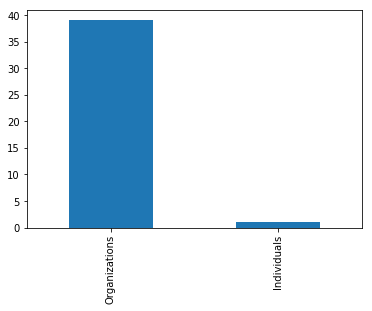

In [186]:
Contrib_type_plot_2011 = df_2011['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2011

In [187]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2011.loc[df_2011['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2011.loc[df_2011['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2011.loc[df_2011.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2011.loc[df_2011.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [188]:
# Uncategorized
df_2011_unclass = df_2011[df_2011['Contributor_type']=='uncategorized'][['NAME']]
# df_2011_unclass.head(10)
uncategorized_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_unclass['NAME'])))
uncategorized_2011.to_csv('uncategorized_2011.csv')

uncategorized_2011

,0


In [189]:
for i in df_2011[df_2011['Contributor_type'] == 'uncategorized']:
    df_2011.loc[df_2011.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [190]:
# Resave
# Uncategorized
df_2011_unclass = df_2011[df_2011['Contributor_type']=='uncategorized'][['NAME']]
# df_2011_unclass.head(10)
uncategorized_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_unclass['NAME'])))
uncategorized_2011.to_csv('uncategorized_2011.csv')
# uncategorized_balance

# Individuals
df_2011_indiv = df_2011[df_2011['Contributor_type']=='Individuals'][['NAME']]
individuals_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_indiv['NAME'])))
individuals_2011.to_csv('individuals_2011.csv')
# individuals_2011

# Organizations
df_2011_orgs = df_2011[df_2011['Contributor_type']=='Organizations'][['NAME']]
orgs_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_orgs['NAME'])))
orgs_2011.to_csv('organizations_2011.csv')
# orgs_2011

# Unknown
df_2011_unknow = df_2011[df_2011['Contributor_type']=='Unknown'][['NAME']]
unknow_2011 = pd.DataFrame(pd.unique(pd.Series(df_2011_unknow['NAME'])))
unknow_2011.to_csv('unknown_2011.csv')
# unknow_2011

**Save the data file with categorization** 

In [191]:
df_2011['Year'] = 2011
df_2011.to_csv('data\\Final_categorization_2011.csv', index=False)

### 2010 Final Categorization

In [192]:
df_2010 = pd.read_csv('data\\2010_combined_reports.csv')
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 12 columns):
PCC                 439 non-null object
TRAN_AMT            439 non-null float64
NAME                439 non-null object
CITY                437 non-null object
STATE               439 non-null object
ZIP                 439 non-null object
INKIND              14 non-null object
INKIND_COMMENTS     14 non-null object
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    439 non-null object
dtypes: float64(4), object(8)
memory usage: 41.2+ KB


In [193]:
df_2010.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Black Laura,12456.48,2008 Black Candidate Account,Salt Lake City,UT,84114.0,NaN,NaN,NaN,NaN,NaN,Organizations
1,Black Laura,25.00,Cathy Spuck,Sandy,UT,84070.0,NaN,NaN,NaN,NaN,NaN,uncategorized
2,Black Laura,25.00,Jennifer Newman,Sandy,UT,84094.0,NaN,NaN,NaN,NaN,NaN,uncategorized
3,Black Laura,100.00,Morris Matthews,Salt Lake City,UT,84093.0,NaN,NaN,NaN,NaN,NaN,uncategorized
4,Black Laura,500.00,AT & T Services,San Antonio,TX,78205.0,NaN,NaN,NaN,NaN,NaN,Organizations


In [194]:
# Uncategorized
df_2010_unclass = df_2010[df_2010['Contributor_type']=='uncategorized'][['NAME']]
# df_2010_unclass.head(10)
uncategorized_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_unclass['NAME'])))
uncategorized_2010.to_csv('uncategorized_2010.csv')
# uncategorized_2010

# Individuals
df_2010_indiv = df_2010[df_2010['Contributor_type']=='Individuals'][['NAME']]
individuals_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_indiv['NAME'])))
individuals_2010.to_csv('individuals_2010.csv')
# individuals_2010

# Organizations
df_2010_orgs = df_2010[df_2010['Contributor_type']=='Organizations'][['NAME']]
orgs_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_orgs['NAME'])))
orgs_2010.to_csv('organizations_2010.csv')
# orgs_2010

# Unknown
df_2010_unknow = df_2010[df_2010['Contributor_type']=='Unknown'][['NAME']]
unknow_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_unknow['NAME'])))
unknow_2010.to_csv('unknown_2010.csv')
# unknow_2010

In [195]:
# uncategorized_2010

In [196]:
# individuals_2010

In [197]:
# orgs_2010

In [198]:
unknow_2010

,0


In [200]:
# Third pass Organizations for 2010

# Allergan = re.compile(r"(Allergan\sUSA)", re.IGNORECASE)
# AndersonGeneva = re.compile(r"(Anderson\sGeneva)", re.IGNORECASE)
# Anheuser_Busch = re.compile(r"(Anheuser\s\-\sBusch)", re.IGNORECASE)
# AstraZenec = re.compile(r"(Astra\sZenec)", re.IGNORECASE)
# BoyerBDO = re.compile(r"(Boyer\sBDO\sII)", re.IGNORECASE)
# CityCyberCafe = re.compile(r"(City\sCyber\sCafe)", re.IGNORECASE)
# EliLilly = re.compile(r"(Eli\sLilly)", re.IGNORECASE)
# Fidelity = re.compile(r"(Fidelity)", re.IGNORECASE)
# Insurite = re.compile(r"(Insurite)", re.IGNORECASE)
# Qwest = re.compile(r"(Qwest)", re.IGNORECASE)
# SchquetaMorning = re.compile(r"(Schqueta\sMorning)", re.IGNORECASE)
# StandardOptical = re.compile(r"(Standard\sOptical)", re.IGNORECASE)
# USMagnesium = re.compile(r"(US\sMagnesium)", re.IGNORECASE)
# ForSheriff = re.compile(r"(For\sSheriff)", re.IGNORECASE)


org_searches_3_2010 = [
#     Allergan,
#     AndersonGeneva,
#     Anheuser_Busch,
#     AstraZenec,
#     BoyerBDO,
#     CityCyberCafe,
#     EliLilly,
#     Fidelity,
#     Insurite,
#     Qwest,
#     SchquetaMorning,
#     StandardOptical,
#     USMagnesium,
#     ForSheriff

]


for name, cat in zip(
    df_2010.loc[df_2010['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2010.loc[df_2010['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2010:
        if org_search.search(name):
            df_2010.loc[df_2010.NAME == name, 'Contributor_type'] = 'Organizations'
            break


In [201]:
# Unknown for 2010
#= re.compile(r"^\s*()\s*$")
#= re.compile(r"()", re.IGNORECASE)
ActBlue = re.compile(r"^\s*(ActBlue)", re.IGNORECASE)
Junetenth = re.compile(r"(Junetenth)", re.IGNORECASE) 



unk_searches_7_2010 = [
    aggregate,
    ActBlue,
    Junetenth   
]

for name, cat in zip(
    df_2010.loc[df_2010['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2010.loc[df_2010['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
            
    for unk_search in unk_searches_7_2010:
        if unk_search.search(name):
            df_2010.loc[df_2010.NAME == name, 'Contributor_type'] = 'Unknown'
            break


In [202]:
# Second, Third and Fouth Passes on Individuals for 2010
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
SolomonOberg = re.compile(r"Solomon\sOberg")


ind_searches_5_2010 = [
    middle_in_paren_or_quote,
    SolomonOberg
]

for name, cat in zip(
    df_2010.loc[df_2010['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2010.loc[df_2010['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
                  
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2010.loc[df_2010.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2010.loc[df_2010.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2010.loc[df_2010.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2010:
        if ind_search.search(name):
            df_2010.loc[df_2010.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [203]:
# Uncategorized
df_2010_unclass = df_2010[df_2010['Contributor_type']=='uncategorized'][['NAME']]
# df_2010_unclass.head(10)
uncategorized_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_unclass['NAME'])))
uncategorized_2010.to_csv('uncategorized_2010.csv')
# uncategorized_2010

# Individuals
df_2010_indiv = df_2010[df_2010['Contributor_type']=='Individuals'][['NAME']]
individuals_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_indiv['NAME'])))
individuals_2010.to_csv('individuals_2010.csv')
# individuals_2010

# Organizations
df_2010_orgs = df_2010[df_2010['Contributor_type']=='Organizations'][['NAME']]
orgs_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_orgs['NAME'])))
orgs_2010.to_csv('organizations_2010.csv')
# orgs_2010

# Unknown
df_2010_unknow = df_2010[df_2010['Contributor_type']=='Unknown'][['NAME']]
unknow_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_unknow['NAME'])))
unknow_2010.to_csv('unknown_2010.csv')
# unknow_2010

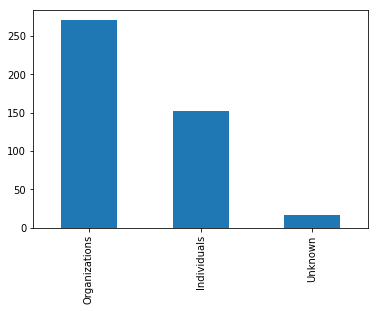

In [204]:
Contrib_type_plot_2010 = df_2010['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2010

In [205]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2010.loc[df_2010['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2010.loc[df_2010['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2010.loc[df_2010.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2010.loc[df_2010.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [206]:
# Uncategorized
df_2010_unclass = df_2010[df_2010['Contributor_type']=='uncategorized'][['NAME']]
# df_2010_unclass.head(10)
uncategorized_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_unclass['NAME'])))
uncategorized_2010.to_csv('uncategorized_2010.csv')

uncategorized_2010

,0


In [207]:
for i in df_2010[df_2010['Contributor_type'] == 'uncategorized']:
    df_2010.loc[df_2010.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [208]:
# Resave
# Uncategorized
df_2010_unclass = df_2010[df_2010['Contributor_type']=='uncategorized'][['NAME']]
# df_2010_unclass.head(10)
uncategorized_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_unclass['NAME'])))
uncategorized_2010.to_csv('uncategorized_2010.csv')
# uncategorized_balance

# Individuals
df_2010_indiv = df_2010[df_2010['Contributor_type']=='Individuals'][['NAME']]
individuals_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_indiv['NAME'])))
individuals_2010.to_csv('individuals_2010.csv')
# individuals_2010

# Organizations
df_2010_orgs = df_2010[df_2010['Contributor_type']=='Organizations'][['NAME']]
orgs_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_orgs['NAME'])))
orgs_2010.to_csv('organizations_2010.csv')
# orgs_2010

# Unknown
df_2010_unknow = df_2010[df_2010['Contributor_type']=='Unknown'][['NAME']]
unknow_2010 = pd.DataFrame(pd.unique(pd.Series(df_2010_unknow['NAME'])))
unknow_2010.to_csv('unknown_2010.csv')
# unknow_2010

**Save the data file with categorization** 

In [209]:
df_2010['Year'] = 2010
df_2010.to_csv('data\\Final_categorization_2010.csv', index=False)

### 2009 Final Categorization

In [210]:
df_2009 = pd.read_csv('data\\2009_combined_reports.csv')
df_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
PCC                 75 non-null object
TRAN_AMT            75 non-null float64
NAME                75 non-null object
CITY                75 non-null object
STATE               75 non-null object
ZIP                 75 non-null object
INKIND              0 non-null float64
INKIND_COMMENTS     0 non-null float64
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    75 non-null object
dtypes: float64(6), object(6)
memory usage: 7.1+ KB


In [211]:
df_2009.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Shurtleff Mark Leonard,90000.0,PAC for Utah's Future,Draper,UT,84020.0,NaN,NaN,NaN,NaN,NaN,Organizations
1,Shurtleff Mark Leonard,20000.0,PAC for Utah's Future,Draper,UT,84020.0,NaN,NaN,NaN,NaN,NaN,Organizations
2,Shurtleff Mark Leonard,15000.0,PAC for Utah's Future,Draper,UT,84020.0,NaN,NaN,NaN,NaN,NaN,Organizations
3,Shurtleff Mark Leonard,5000.0,1-800 Contacts Inc.,Draper,UT,84020.0,NaN,NaN,NaN,NaN,NaN,Organizations
4,Shurtleff Mark Leonard,1500.0,Comcast Financial Agency Corporation,Englewood,CO,80112.0,NaN,NaN,NaN,NaN,NaN,Organizations


In [212]:
# Uncategorized
df_2009_unclass = df_2009[df_2009['Contributor_type']=='uncategorized'][['NAME']]
# df_2009_unclass.head(10)
uncategorized_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_unclass['NAME'])))
uncategorized_2009.to_csv('uncategorized_2009.csv')
# uncategorized_2009

# Individuals
df_2009_indiv = df_2009[df_2009['Contributor_type']=='Individuals'][['NAME']]
individuals_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_indiv['NAME'])))
individuals_2009.to_csv('individuals_2009.csv')
# individuals_2009

# Organizations
df_2009_orgs = df_2009[df_2009['Contributor_type']=='Organizations'][['NAME']]
orgs_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_orgs['NAME'])))
orgs_2009.to_csv('organizations_2009.csv')
# orgs_2009

# Unknown
df_2009_unknow = df_2009[df_2009['Contributor_type']=='Unknown'][['NAME']]
unknow_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_unknow['NAME'])))
unknow_2009.to_csv('unknown_2009.csv')
# unknow_2009

In [213]:
# uncategorized_2009

In [214]:
# individuals_2009

In [215]:
# orgs_2009

In [216]:
unknow_2009

,0


In [217]:
# Third pass Organizations for 2009

# AOL = re.compile(r"^\s*(AOL)\s*$", re.IGNORECASE)
# ExxonMobil = re.compile(r"(Exxon\sMobil)", re.IGNORECASE)
# SenatePresidentsForum = re.compile(r"(Senate\sPresidents\sForum)", re.IGNORECASE)


org_searches_3_2009 = [
     ForSheriff,
#     AOL,
#     ExxonMobil,
#     SenatePresidentsForum
]

for name, cat in zip(
    df_2009.loc[df_2009['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2009.loc[df_2009['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2009:
        if org_search.search(name):
            df_2009.loc[df_2009.NAME == name, 'Contributor_type'] = 'Organizations'
            break
 

In [218]:
# Second, Third and Fouth Passes on Individuals for 2009
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")

ind_searches_5_2009 = [
    middle_in_paren_or_quote
]

for name, cat in zip(
    df_2009.loc[df_2009['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2009.loc[df_2009['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2009.loc[df_2009.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2009.loc[df_2009.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2009.loc[df_2009.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2009:
        if ind_search.search(name):
            df_2009.loc[df_2009.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [219]:
# Uncategorized
df_2009_unclass = df_2009[df_2009['Contributor_type']=='uncategorized'][['NAME']]
# df_2009_unclass.head(10)
uncategorized_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_unclass['NAME'])))
uncategorized_2009.to_csv('uncategorized_2009.csv')
# uncategorized_2009

# Individuals
df_2009_indiv = df_2009[df_2009['Contributor_type']=='Individuals'][['NAME']]
individuals_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_indiv['NAME'])))
individuals_2009.to_csv('individuals_2009.csv')
# individuals_2009

# Organizations
df_2009_orgs = df_2009[df_2009['Contributor_type']=='Organizations'][['NAME']]
orgs_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_orgs['NAME'])))
orgs_2009.to_csv('organizations_2009.csv')
# orgs_2009

# Unknown
df_2009_unknow = df_2009[df_2009['Contributor_type']=='Unknown'][['NAME']]
unknow_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_unknow['NAME'])))
unknow_2009.to_csv('unknown_2009.csv')
# unknow_2009

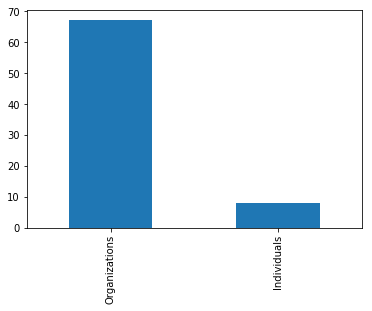

In [220]:
Contrib_type_plot_2009 = df_2009['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2009

In [221]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2009.loc[df_2009['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2009.loc[df_2009['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2009.loc[df_2009.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2009.loc[df_2009.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [222]:
# Uncategorized
df_2009_unclass = df_2009[df_2009['Contributor_type']=='uncategorized'][['NAME']]
# df_2009_unclass.head(10)
uncategorized_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_unclass['NAME'])))
uncategorized_2009.to_csv('uncategorized_2009.csv')

uncategorized_2009

,0


In [223]:
for i in df_2009[df_2009['Contributor_type'] == 'uncategorized']:
    df_2009.loc[df_2009.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [224]:
# Resave
# Uncategorized
df_2009_unclass = df_2009[df_2009['Contributor_type']=='uncategorized'][['NAME']]
# df_2009_unclass.head(10)
uncategorized_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_unclass['NAME'])))
uncategorized_2009.to_csv('uncategorized_2009.csv')
# uncategorized_balance

# Individuals
df_2009_indiv = df_2009[df_2009['Contributor_type']=='Individuals'][['NAME']]
individuals_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_indiv['NAME'])))
individuals_2009.to_csv('individuals_2009.csv')
# individuals_2009

# Organizations
df_2009_orgs = df_2009[df_2009['Contributor_type']=='Organizations'][['NAME']]
orgs_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_orgs['NAME'])))
orgs_2009.to_csv('organizations_2009.csv')
# orgs_2009

# Unknown
df_2009_unknow = df_2009[df_2009['Contributor_type']=='Unknown'][['NAME']]
unknow_2009 = pd.DataFrame(pd.unique(pd.Series(df_2009_unknow['NAME'])))
unknow_2009.to_csv('unknown_2009.csv')
# unknow_2009

**Save the data file with categorization** 

In [225]:
df_2009['Year'] = 2009
df_2009.to_csv('data\\Final_categorization_2009.csv', index=False)

### 2008 Final Categorization

In [226]:
df_2008 = pd.read_csv('data\\2008_combined_reports.csv')
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
PCC                 388 non-null object
TRAN_AMT            388 non-null float64
NAME                388 non-null object
CITY                385 non-null object
STATE               384 non-null object
ZIP                 386 non-null object
INKIND              25 non-null object
INKIND_COMMENTS     0 non-null float64
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    388 non-null object
dtypes: float64(5), object(7)
memory usage: 36.5+ KB


In [227]:
df_2008.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Ray Daniel,60.00,Aggregate Contributions,Various,UT,84111.0,NaN,NaN,NaN,NaN,NaN,Unknown
1,Ray Daniel,215.00,Constitution Party Of Uintah County,Vernal,UT,84078.0,X,NaN,NaN,NaN,NaN,Organizations
2,Ray Daniel,200.00,Bingham Debra Lee,Vernal,UT,84078.0,NaN,NaN,NaN,NaN,NaN,uncategorized
3,Ray Daniel,20.00,Aggregate Contributions,Various,UT,84111.0,NaN,NaN,NaN,NaN,NaN,Unknown
4,Ray Daniel,2.99,Aggregate Contributions,Various,UT,84111.0,NaN,NaN,NaN,NaN,NaN,Unknown


In [228]:
# Uncategorized
df_2008_unclass = df_2008[df_2008['Contributor_type']=='uncategorized'][['NAME']]
# df_2008_unclass.head(10)
uncategorized_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_unclass['NAME'])))
uncategorized_2008.to_csv('uncategorized_2008.csv')
# uncategorized_2008

# Individuals
df_2008_indiv = df_2008[df_2008['Contributor_type']=='Individuals'][['NAME']]
individuals_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_indiv['NAME'])))
individuals_2008.to_csv('individuals_2008.csv')
# individuals_2008

# Organizations
df_2008_orgs = df_2008[df_2008['Contributor_type']=='Organizations'][['NAME']]
orgs_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_orgs['NAME'])))
orgs_2008.to_csv('organizations_2008.csv')
# orgs_2008

# Unknown
df_2008_unknow = df_2008[df_2008['Contributor_type']=='Unknown'][['NAME']]
unknow_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_unknow['NAME'])))
unknow_2008.to_csv('unknown_2008.csv')
# unknow_2008

In [229]:
uncategorized_2008

,0
0,Bingham Debra Lee
1,Walker Charles
2,Dale Laub
3,Lubsen Keith A.
4,McKenna Robert M
5,Suthers John W
6,Masto Catherine Cortez
7,Baker Thurbert E
8,Cooper Jr. Robert E.
9,Cooper Roy


In [230]:
individuals_2008

,0
0,Packard J. Brent
1,Joy M. Erickson
2,Jack D. Solomon


In [231]:
orgs_2008

,0
0,Constitution Party Of Uintah County
1,Bloosky Llc.
2,1-800 Contacts Inc.
3,Dollar Financial Group Inc
4,Check$mart Financial Company
5,First Cash Financial Services Inc.
6,QC Holdings Inc.
7,Cash America
8,CW Management Corp
9,Online Lenders Alliance PAC


In [232]:
unknow_2008

,0
0,Aggregate Contributions


In [233]:

        
# Third pass Organizations for 2008

#= re.compile(r"^\s*()\s*$")
# bglast = re.compile(r"(bg\slast)", re.IGNORECASE)
# BillBarrettCorp = re.compile(r"(Bill\sBarrett\sCorp)", re.IGNORECASE)
# BlooskyLlc = re.compile(r"(Bloosky\s*Llc)", re.IGNORECASE)
# CallisterNebekerMcCullough = re.compile(r"(Callister\sNebeker)", re.IGNORECASE)
# cevron = re.compile(r"(cevron)", re.IGNORECASE)
# ChristiansenJackson = re.compile(r"(Christiansen\s\&\sJackson\sPC)", re.IGNORECASE)
# DenisonMines = re.compile(r"(Denison\sMines)", re.IGNORECASE)
# Digitalbridge = re.compile(r"(Digitalbridge)", re.IGNORECASE)
# EnterpriseRent = re.compile(r"(Enterprise\sRent)", re.IGNORECASE)
# FabianClendenin = re.compile(r"(Fabian\s\&\sClendenin)", re.IGNORECASE)
# FARMPoliceSupply = re.compile(r"(FARM\sPolice\sSupply)", re.IGNORECASE)
# FraternalOrder = re.compile(r"(Fraternal\sOrder)", re.IGNORECASE)
# HeritageArms = re.compile(r"(Heritage\sArms)", re.IGNORECASE)
# InfusionMedia = re.compile(r"(Infusion\sMedia)", re.IGNORECASE)
# IWORKS = re.compile(r"(I\-WORKS)", re.IGNORECASE)
# McCleanChiropractic = re.compile(r"(McClean\sChiropractic)", re.IGNORECASE)
# Monavie = re.compile(r"(Monavie)", re.IGNORECASE)
# NMRMyeBiz = re.compile(r"(NMR\-My)", re.IGNORECASE)
# PersonalInjury = re.compile(r"(Personal\sInjury)", re.IGNORECASE)
# qwest = re.compile(r"(qwest)", re.IGNORECASE)
# RayQuinney = re.compile(r"(Ray\sQuinney)", re.IGNORECASE)
# RECAF = re.compile(r"(RECAF)", re.IGNORECASE)
# Segway = re.compile(r"(Segway)", re.IGNORECASE)
# Selectheatlh = re.compile(r"(Selectheatlh)", re.IGNORECASE)
# speakerspac_again = re.compile(r"(speakers\s*pac)", re.IGNORECASE)
# SportsmansWarehouse = re.compile(r"(Sportsmans\sWarehouse)", re.IGNORECASE)
# StakerParsons_again = re.compile(r"(Staker\/Parsons)", re.IGNORECASE)
# StoresOnline = re.compile(r"(Stores\s*Online)", re.IGNORECASE)
# SymbolArts = re.compile(r"(Symbol\sArts)", re.IGNORECASE)
# TheTaxClub = re.compile(r"(The\sTax\sClub)", re.IGNORECASE)
# ThriveLearning = re.compile(r"(Thrive\sLearning)", re.IGNORECASE)
# VanwagenenFinance = re.compile(r"(Vanwagenen\sFinance)", re.IGNORECASE)
# DiamondRobinson = re.compile(r"(Diamond\s\&\sRobinson)", re.IGNORECASE)



org_searches_3_2008 = [
#     bglast,
#     BillBarrettCorp,
#     BlooskyLlc,
#     CallisterNebekerMcCullough,
#     cevron,
#     ChristiansenJackson,
#     DenisonMines,
#     Digitalbridge,
#     EnterpriseRent,
#     FabianClendenin,
#     FARMPoliceSupply,
#     FraternalOrder,
#     HeritageArms,
#     InfusionMedia,
#     IWORKS,
#     McCleanChiropractic,
#     Monavie,
#     NMRMyeBiz,
#     PersonalInjury,
#     qwest,
#     RayQuinney,
#     RECAF,
#     Segway,
#     Selectheatlh,
#     speakerspac_again,
#     SportsmansWarehouse,
#     StakerParsons_again,
#     StoresOnline,
#     SymbolArts,
#     TheTaxClub,
#     ThriveLearning,
#     VanwagenenFinance,
#     DiamondRobinson,
    USMagnesium
]

# Unknown for 2008
# none


# Second, Third and Fouth Passes on Individuals for 2008
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")


ind_searches_5_2008 = [
    middle_in_paren_or_quote
]

for name, cat in zip(
    df_2008.loc[df_2008['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2008.loc[df_2008['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2008:
        if org_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Organizations'
            cat = 'Organizations'
            break
            
    if cat != 'uncategorized':
        continue 
        
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            cat = 'Individuals'
            break
     
    if cat != 'uncategorized':
        continue      

            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            cat = 'Individuals'
            break
            
    if cat != 'uncategorized':
        continue
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            cat = 'Individuals'
            break
            
    if cat != 'uncategorized':
        continue

    for ind_search in ind_searches_5_2008:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            


In [234]:
# Third pass Organizations for 2008

#= re.compile(r"^\s*()\s*$")
# bglast = re.compile(r"(bg\slast)", re.IGNORECASE)
# BillBarrettCorp = re.compile(r"(Bill\sBarrett\sCorp)", re.IGNORECASE)
# BlooskyLlc = re.compile(r"(Bloosky\s*Llc)", re.IGNORECASE)
# CallisterNebekerMcCullough = re.compile(r"(Callister\sNebeker)", re.IGNORECASE)
# cevron = re.compile(r"(cevron)", re.IGNORECASE)
# ChristiansenJackson = re.compile(r"(Christiansen\s\&\sJackson\sPC)", re.IGNORECASE)
# DenisonMines = re.compile(r"(Denison\sMines)", re.IGNORECASE)
# Digitalbridge = re.compile(r"(Digitalbridge)", re.IGNORECASE)
# EnterpriseRent = re.compile(r"(Enterprise\sRent)", re.IGNORECASE)
# FabianClendenin = re.compile(r"(Fabian\s\&\sClendenin)", re.IGNORECASE)
# FARMPoliceSupply = re.compile(r"(FARM\sPolice\sSupply)", re.IGNORECASE)
# FraternalOrder = re.compile(r"(Fraternal\sOrder)", re.IGNORECASE)
# HeritageArms = re.compile(r"(Heritage\sArms)", re.IGNORECASE)
# InfusionMedia = re.compile(r"(Infusion\sMedia)", re.IGNORECASE)
# IWORKS = re.compile(r"(I\-WORKS)", re.IGNORECASE)
# McCleanChiropractic = re.compile(r"(McClean\sChiropractic)", re.IGNORECASE)
# Monavie = re.compile(r"(Monavie)", re.IGNORECASE)
# NMRMyeBiz = re.compile(r"(NMR\-My)", re.IGNORECASE)
# PersonalInjury = re.compile(r"(Personal\sInjury)", re.IGNORECASE)
# qwest = re.compile(r"(qwest)", re.IGNORECASE)
# RayQuinney = re.compile(r"(Ray\sQuinney)", re.IGNORECASE)
# RECAF = re.compile(r"(RECAF)", re.IGNORECASE)
# Segway = re.compile(r"(Segway)", re.IGNORECASE)
# Selectheatlh = re.compile(r"(Selectheatlh)", re.IGNORECASE)
# speakerspac_again = re.compile(r"(speakers\s*pac)", re.IGNORECASE)
# SportsmansWarehouse = re.compile(r"(Sportsmans\sWarehouse)", re.IGNORECASE)
# StakerParsons_again = re.compile(r"(Staker\/Parsons)", re.IGNORECASE)
# StoresOnline = re.compile(r"(Stores\s*Online)", re.IGNORECASE)
# SymbolArts = re.compile(r"(Symbol\sArts)", re.IGNORECASE)
# TheTaxClub = re.compile(r"(The\sTax\sClub)", re.IGNORECASE)
# ThriveLearning = re.compile(r"(Thrive\sLearning)", re.IGNORECASE)
# VanwagenenFinance = re.compile(r"(Vanwagenen\sFinance)", re.IGNORECASE)
# DiamondRobinson = re.compile(r"(Diamond\s\&\sRobinson)", re.IGNORECASE)



org_searches_3_2008 = [
#     bglast,
#     BillBarrettCorp,
#     BlooskyLlc,
#     CallisterNebekerMcCullough,
#     cevron,
#     ChristiansenJackson,
#     DenisonMines,
#     Digitalbridge,
#     EnterpriseRent,
#     FabianClendenin,
#     FARMPoliceSupply,
#     FraternalOrder,
#     HeritageArms,
#     InfusionMedia,
#     IWORKS,
#     McCleanChiropractic,
#     Monavie,
#     NMRMyeBiz,
#     PersonalInjury,
#     qwest,
#     RayQuinney,
#     RECAF,
#     Segway,
#     Selectheatlh,
#     speakerspac_again,
#     SportsmansWarehouse,
#     StakerParsons_again,
#     StoresOnline,
#     SymbolArts,
#     TheTaxClub,
#     ThriveLearning,
#     VanwagenenFinance,
#     DiamondRobinson,
#     USMagnesium
]

# Unknown for 2008
# none


# Second, Third and Fouth Passes on Individuals for 2008
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")


ind_searches_5_2008 = [
    middle_in_paren_or_quote
]

for name, cat in zip(
    df_2008.loc[df_2008['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2008.loc[df_2008['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2008:
        if org_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            


In [235]:
for name, cat in zip(
    df_2008.loc[df_2008['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2008.loc[df_2008['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2008:
        if ind_search.search(name):
            df_2008.loc[df_2008.NAME == name, 'Contributor_type'] = 'Individuals'
            break

**Rerun saving the categorization files**

In [236]:
# Uncategorized
df_2008_unclass = df_2008[df_2008['Contributor_type']=='uncategorized'][['NAME']]
# df_2008_unclass.head(10)
uncategorized_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_unclass['NAME'])))
uncategorized_2008.to_csv('uncategorized_2008.csv')
# uncategorized_2008

# Individuals
df_2008_indiv = df_2008[df_2008['Contributor_type']=='Individuals'][['NAME']]
individuals_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_indiv['NAME'])))
individuals_2008.to_csv('individuals_2008.csv')
# individuals_2008

# Organizations
df_2008_orgs = df_2008[df_2008['Contributor_type']=='Organizations'][['NAME']]
orgs_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_orgs['NAME'])))
orgs_2008.to_csv('organizations_2008.csv')
# orgs_2008

# Unknown
df_2008_unknow = df_2008[df_2008['Contributor_type']=='Unknown'][['NAME']]
unknow_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_unknow['NAME'])))
unknow_2008.to_csv('unknown_2008.csv')
# unknow_2008

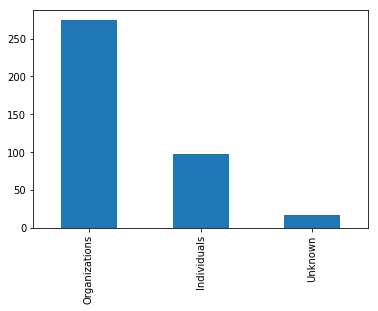

In [237]:
Contrib_type_plot_2008 = df_2008['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2008

In [238]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2008.loc[df_2008['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2008.loc[df_2008['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2008.loc[df_2008.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2008.loc[df_2008.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [239]:
# Uncategorized
df_2008_unclass = df_2008[df_2008['Contributor_type']=='uncategorized'][['NAME']]
# df_2008_unclass.head(10)
uncategorized_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_unclass['NAME'])))
uncategorized_2008.to_csv('uncategorized_2008.csv')

uncategorized_2008

,0


In [240]:
for i in df_2008[df_2008['Contributor_type'] == 'uncategorized']:
    df_2008.loc[df_2008.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [241]:
# Resave
# Uncategorized
df_2008_unclass = df_2008[df_2008['Contributor_type']=='uncategorized'][['NAME']]
# df_2008_unclass.head(10)
uncategorized_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_unclass['NAME'])))
uncategorized_2008.to_csv('uncategorized_2008.csv')
# uncategorized_balance

# Individuals
df_2008_indiv = df_2008[df_2008['Contributor_type']=='Individuals'][['NAME']]
individuals_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_indiv['NAME'])))
individuals_2008.to_csv('individuals_2008.csv')
# individuals_2008

# Organizations
df_2008_orgs = df_2008[df_2008['Contributor_type']=='Organizations'][['NAME']]
orgs_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_orgs['NAME'])))
orgs_2008.to_csv('organizations_2008.csv')
# orgs_2008

# Unknown
df_2008_unknow = df_2008[df_2008['Contributor_type']=='Unknown'][['NAME']]
unknow_2008 = pd.DataFrame(pd.unique(pd.Series(df_2008_unknow['NAME'])))
unknow_2008.to_csv('unknown_2008.csv')
# unknow_2008

**Save the data file with categorization** 

In [242]:
df_2008['Year'] = 2008
df_2008.to_csv('data\\Final_categorization_2008.csv', index=False)

### 2006 Final Categorization
Work in progress

In [243]:
df_2006 = pd.read_csv('data\\2006_combined_reports.csv')
df_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
PCC                 43 non-null object
TRAN_AMT            43 non-null float64
NAME                43 non-null object
CITY                43 non-null object
STATE               43 non-null object
ZIP                 43 non-null object
INKIND              0 non-null float64
INKIND_COMMENTS     0 non-null float64
LOAN                0 non-null float64
COMMENT             0 non-null float64
PSA                 0 non-null float64
Contributor_type    43 non-null object
dtypes: float64(6), object(6)
memory usage: 4.1+ KB


In [244]:
df_2006.head(5)

,PCC,TRAN_AMT,NAME,CITY,STATE,ZIP,INKIND,INKIND_COMMENTS,LOAN,COMMENT,PSA,Contributor_type
0,Alexander Jeff,250.0,U-Car Pac Utah Auto Dealer Association,Salt Lake City,UT,84115,NaN,NaN,NaN,NaN,NaN,Organizations
1,Alexander Jeff,1000.0,Merit Medical Systems Inc.,Provo,UT,84095,NaN,NaN,NaN,NaN,NaN,Organizations
2,Alexander Jeff,750.0,Zions Bancorporation Political Action Committee,Salt Lake City,UT,84111,NaN,NaN,NaN,NaN,NaN,Organizations
3,Alexander Jeff,500.0,Central Utah Clinic,Provo,UT,84604,NaN,NaN,NaN,NaN,NaN,Organizations
4,Alexander Jeff,500.0,Fidelity Investments,Boston,MA,02109,NaN,NaN,NaN,NaN,NaN,Organizations


In [245]:
# Uncategorized
df_2006_unclass = df_2006[df_2006['Contributor_type']=='uncategorized'][['NAME']]
# df_2006_unclass.head(10)
uncategorized_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_unclass['NAME'])))
uncategorized_2006.to_csv('uncategorized_2006.csv')
# uncategorized_2006

# Individuals
df_2006_indiv = df_2006[df_2006['Contributor_type']=='Individuals'][['NAME']]
individuals_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_indiv['NAME'])))
individuals_2006.to_csv('individuals_2006.csv')
# individuals_2006

# Organizations
df_2006_orgs = df_2006[df_2006['Contributor_type']=='Organizations'][['NAME']]
orgs_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_orgs['NAME'])))
orgs_2006.to_csv('organizations_2006.csv')
# orgs_2006

# Unknown
df_2006_unknow = df_2006[df_2006['Contributor_type']=='Unknown'][['NAME']]
unknow_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_unknow['NAME'])))
unknow_2006.to_csv('unknown_2006.csv')
# unknow_2006

In [246]:
uncategorized_2006

,0
0,Merick


In [247]:
individuals_2006

,0


In [248]:
orgs_2006

,0
0,U-Car Pac Utah Auto Dealer Association
1,Merit Medical Systems Inc.
2,Zions Bancorporation Political Action Committee
3,Central Utah Clinic
4,Fidelity Investments
5,UMPAC - Utah Medical
6,Merit Medical
7,Utah Association Of Realtors
8,Sinclair Oil Corporation
9,Convergys


In [249]:
unknow_2006

,0


In [250]:
# Third pass Organizations for 2006

Merick = re.compile(r"(Merick)", re.IGNORECASE)
# Convergys = re.compile(r"(Convergys)", re.IGNORECASE)

org_searches_3_2006 = [
    Merick#,
#     Convergys
]

# Unknown for 2006

# Second, Third and Fouth Passes on Individuals for 2006
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")


ind_searches_5_2006 = [
    middle_in_paren_or_quote
]

for name, cat in zip(
    df_2006.loc[df_2006['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_2006.loc[df_2006['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_2006:
        if org_search.search(name):
            df_2006.loc[df_2006.NAME == name, 'Contributor_type'] = 'Organizations'
            break
            
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_2006.loc[df_2006.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_2006.loc[df_2006.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_2006.loc[df_2006.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_2006:
        if ind_search.search(name):
            df_2006.loc[df_2006.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [251]:
# Uncategorized
df_2006_unclass = df_2006[df_2006['Contributor_type']=='uncategorized'][['NAME']]
# df_2006_unclass.head(10)
uncategorized_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_unclass['NAME'])))
uncategorized_2006.to_csv('uncategorized_2006.csv')
# uncategorized_2006

# Individuals
df_2006_indiv = df_2006[df_2006['Contributor_type']=='Individuals'][['NAME']]
individuals_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_indiv['NAME'])))
individuals_2006.to_csv('individuals_2006.csv')
# individuals_2006

# Organizations
df_2006_orgs = df_2006[df_2006['Contributor_type']=='Organizations'][['NAME']]
orgs_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_orgs['NAME'])))
orgs_2006.to_csv('organizations_2006.csv')
# orgs_2006

# Unknown
df_2006_unknow = df_2006[df_2006['Contributor_type']=='Unknown'][['NAME']]
unknow_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_unknow['NAME'])))
unknow_2006.to_csv('unknown_2006.csv')
# unknow_2006

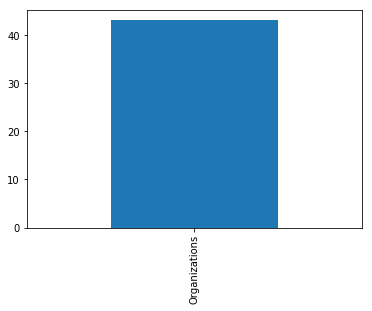

In [252]:
Contrib_type_plot_2006 = df_2006['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_2006

In [253]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_2006.loc[df_2006['Contributor_type'] == 'Individuals', 'NAME'], 
    df_2006.loc[df_2006['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_2006.loc[df_2006.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_2006.loc[df_2006.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [254]:
# Uncategorized
df_2006_unclass = df_2006[df_2006['Contributor_type']=='uncategorized'][['NAME']]
# df_2006_unclass.head(10)
uncategorized_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_unclass['NAME'])))
uncategorized_2006.to_csv('uncategorized_2006.csv')

uncategorized_2006

,0


In [255]:
for i in df_2006[df_2006['Contributor_type'] == 'uncategorized']:
    df_2006.loc[df_2006.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [256]:
# Resave
# Uncategorized
df_2006_unclass = df_2006[df_2006['Contributor_type']=='uncategorized'][['NAME']]
# df_2006_unclass.head(10)
uncategorized_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_unclass['NAME'])))
uncategorized_2006.to_csv('uncategorized_2006.csv')
# uncategorized_balance

# Individuals
df_2006_indiv = df_2006[df_2006['Contributor_type']=='Individuals'][['NAME']]
individuals_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_indiv['NAME'])))
individuals_2006.to_csv('individuals_2006.csv')
# individuals_2006

# Organizations
df_2006_orgs = df_2006[df_2006['Contributor_type']=='Organizations'][['NAME']]
orgs_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_orgs['NAME'])))
orgs_2006.to_csv('organizations_2006.csv')
# orgs_2006

# Unknown
df_2006_unknow = df_2006[df_2006['Contributor_type']=='Unknown'][['NAME']]
unknow_2006 = pd.DataFrame(pd.unique(pd.Series(df_2006_unknow['NAME'])))
unknow_2006.to_csv('unknown_2006.csv')
# unknow_2006

**Save the data file with categorization** 

In [257]:
df_2006['Year'] = 2006
df_2006.to_csv('data\\Final_categorization_2006.csv', index=False)

### 20YY Final Categorization - TEMPLATE

Work in progress

In [ ]:
df_20YY = pd.read_csv('data\\20YY_combined_reports.csv')
df_20YY.info()

In [ ]:
df_20YY.head(5)

In [ ]:
# Uncategorized
df_20YY_unclass = df_20YY[df_20YY['Contributor_type']=='uncategorized'][['NAME']]
# df_20YY_unclass.head(10)
uncategorized_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_unclass['NAME'])))
uncategorized_20YY.to_csv('uncategorized_20YY.csv')
# uncategorized_20YY

# Individuals
df_20YY_indiv = df_20YY[df_20YY['Contributor_type']=='Individuals'][['NAME']]
individuals_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_indiv['NAME'])))
individuals_20YY.to_csv('individuals_20YY.csv')
# individuals_20YY

# Organizations
df_20YY_orgs = df_20YY[df_20YY['Contributor_type']=='Organizations'][['NAME']]
orgs_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_orgs['NAME'])))
orgs_20YY.to_csv('organizations_20YY.csv')
# orgs_20YY

# Unknown
df_20YY_unknow = df_20YY[df_20YY['Contributor_type']=='Unknown'][['NAME']]
unknow_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_unknow['NAME'])))
unknow_20YY.to_csv('unknown_20YY.csv')
# unknow_20YY

In [ ]:
uncategorized_20YY

In [ ]:
individuals_20YY

In [ ]:
orgs_20YY

In [ ]:
unknow_20YY

In [ ]:
# Third pass Organizations for 20YY

exampleexampleFlickinger_Sutterfield = re.compile(r"^\s*(Flickinger\s\&\sSutterfield)\s*$", re.IGNORECASE)
#= re.compile(r"^\s*()\s*$")

org_searches_3_20YY = [
    Flickinger_Sutterfield,

]


for name, cat in zip(
    df_20YY.loc[df_20YY['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_20YY.loc[df_20YY['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    
    for org_search in org_searches_3_20YY:
        if org_search.search(name):
            df_20YY.loc[df_20YY.NAME == name, 'Contributor_type'] = 'Organizations'
            break
 

In [ ]:
# Unknown for 20YY
#= re.compile(r"^\s*()\s*$")
#= re.compile(r"()", re.IGNORECASE)


unk_searches_7_20YY = [
    
]

for name, cat in zip(
    df_20YY.loc[df_20YY['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_20YY.loc[df_20YY['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for unk_search in unk_searches_7_20YY:
        if unk_search.search(name):
            df_20YY.loc[df_20YY.NAME == name, 'Contributor_type'] = 'Unknown'
            break



In [ ]:
# Second, Third and Fouth Passes on Individuals for 20YY
# no recompile necessary

middle_in_paren_or_quote = re.compile(r"[A-Z][a-z]+\s\'?\(?[A-Z][a-z]+\'?\)?\s[A-Z][a-z]+")
# ZacharyThomas = re.compile(r"ZacharyThomas")


ind_searches_5_20YY = [
    middle_in_paren_or_quote
]            
  
for name, cat in zip(
    df_20YY.loc[df_20YY['Contributor_type'] == 'uncategorized', 'NAME'], 
    df_20YY.loc[df_20YY['Contributor_type'] == 'uncategorized', 'Contributor_type']
):
    for ind_search in ind_searches_2:
        if ind_search.search(name):
            df_20YY.loc[df_20YY.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_3:
        if ind_search.search(name):
            df_20YY.loc[df_20YY.NAME == name, 'Contributor_type'] = 'Individuals'
            break
            
    for ind_search in ind_searches_4:
        if ind_search.search(name):
            df_20YY.loc[df_20YY.NAME == name, 'Contributor_type'] = 'Individuals'
            break

    for ind_search in ind_searches_5_20YY:
        if ind_search.search(name):
            df_20YY.loc[df_20YY.NAME == name, 'Contributor_type'] = 'Individuals'
            break


**Rerun saving the categorization files**

In [ ]:
# Uncategorized
df_20YY_unclass = df_20YY[df_20YY['Contributor_type']=='uncategorized'][['NAME']]
# df_20YY_unclass.head(10)
uncategorized_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_unclass['NAME'])))
uncategorized_20YY.to_csv('uncategorized_20YY.csv')
# uncategorized_20YY

# Individuals
df_20YY_indiv = df_20YY[df_20YY['Contributor_type']=='Individuals'][['NAME']]
individuals_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_indiv['NAME'])))
individuals_20YY.to_csv('individuals_20YY.csv')
# individuals_20YY

# Organizations
df_20YY_orgs = df_20YY[df_20YY['Contributor_type']=='Organizations'][['NAME']]
orgs_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_orgs['NAME'])))
orgs_20YY.to_csv('organizations_20YY.csv')
# orgs_20YY

# Unknown
df_20YY_unknow = df_20YY[df_20YY['Contributor_type']=='Unknown'][['NAME']]
unknow_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_unknow['NAME'])))
unknow_20YY.to_csv('unknown_20YY.csv')
# unknow_20YY

In [ ]:
Contrib_type_plot_20YY = df_20YY['Contributor_type'].value_counts().plot(kind='bar')
Contrib_type_plot_20YY

In [ ]:
# First trim those contributing through ActBlue to remove that from the name field
# Then trim name field for those contributing 500 USD or less to last name only 


for name, amt in zip(
    df_20YY.loc[df_20YY['Contributor_type'] == 'Individuals', 'NAME'], 
    df_20YY.loc[df_20YY['Contributor_type'] == 'Individuals', 'TRAN_AMT']
):
    
    if via_ActBlue.search(name):
        noActBlue_name = no_via_ActBlue.search(name).group(1)
        df_20YY.loc[df_20YY.NAME == name, 'NAME'] = noActBlue_name
    
    if amt <= 500:
        short_name = name.rsplit(None, 1)[-1]
        df_20YY.loc[df_20YY.NAME == name, 'NAME'] = short_name

Only use after examining the uncategorized group.

In [ ]:
# Uncategorized
df_20YY_unclass = df_20YY[df_20YY['Contributor_type']=='uncategorized'][['NAME']]
# df_20YY_unclass.head(10)
uncategorized_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_unclass['NAME'])))
uncategorized_20YY.to_csv('uncategorized_20YY.csv')

uncategorized_20YY

In [ ]:
for i in df_20YY[df_20YY['Contributor_type'] == 'uncategorized']:
    df_20YY.loc[df_20YY.Contributor_type == 'uncategorized', 'Contributor_type'] = 'Unknown'

In [ ]:
# Resave
# Uncategorized
df_20YY_unclass = df_20YY[df_20YY['Contributor_type']=='uncategorized'][['NAME']]
# df_20YY_unclass.head(10)
uncategorized_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_unclass['NAME'])))
uncategorized_20YY.to_csv('uncategorized_20YY.csv')
# uncategorized_balance

# Individuals
df_20YY_indiv = df_20YY[df_20YY['Contributor_type']=='Individuals'][['NAME']]
individuals_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_indiv['NAME'])))
individuals_20YY.to_csv('individuals_20YY.csv')
# individuals_20YY

# Organizations
df_20YY_orgs = df_20YY[df_20YY['Contributor_type']=='Organizations'][['NAME']]
orgs_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_orgs['NAME'])))
orgs_20YY.to_csv('organizations_20YY.csv')
# orgs_20YY

# Unknown
df_20YY_unknow = df_20YY[df_20YY['Contributor_type']=='Unknown'][['NAME']]
unknow_20YY = pd.DataFrame(pd.unique(pd.Series(df_20YY_unknow['NAME'])))
unknow_20YY.to_csv('unknown_20YY.csv')
# unknow_20YY

**Save the data file with categorization** 

In [ ]:
df_20YY['Year'] = 20YY
df_20YY.to_csv('data\\Final_categorization_20YY.csv', index=False)